<!--TABLE OF CONTENTS-->
Contents:
- [Table de matières<a name="toc"></a>](#Table-de-matières<a-name="toc"></a>)
- [1. Idée d'application : Proposer des alternatifs pour éviter les additifs 'mauvais' pour la santé<a name="idee-application"></a>](#1.-Idée-d'application-:-Proposer-des-alternatifs-pour-éviter-les-additifs-'mauvais'-pour-la-santé<a-name="idee-application"></a>)
  - [1.1 Pourquoi cette application](#1.1-Pourquoi-cette-application)
    - [Trop complex et chronophage](#Trop-complex-et-chronophage)
    - [Simplifier le choix](#Simplifier-le-choix)
  - [1.2 Fonctionnement de l'application (proposé) :](#1.2-Fonctionnement-de-l'application-(proposé)-:)
  - [1.3 Étapes de traitement de données pour l'application](#1.3-Étapes-de-traitement-de-données-pour-l'application)
    - [Pour identifier si un produit contient des additifs nocifs :](#Pour-identifier-si-un-produit-contient-des-additifs-nocifs-:)
    - [Pour identifier si un produit contient des additifs associés à huile de palme :](#Pour-identifier-si-un-produit-contient-des-additifs-associés-à-huile-de-palme-:)
    - [Pour proposer les produits similaires](#Pour-proposer-les-produits-similaires)
    - [Pour proposer les produits avec valeurs nutritionnels similaires](#Pour-proposer-les-produits-avec-valeurs-nutritionnels-similaires)
  - [1.4 Procès itératif de traitement de données](#1.4-Procès-itératif-de-traitement-de-données)
- [2. Importation des données <a name="importation"></a>](#2.-Importation-des-données-<a-name="importation"></a>)
  - [2.1 Configuration de l'environnement de travail](#2.1-Configuration-de-l'environnement-de-travail)
    - [2.1.1 Installation des bibliothèques nécessaires pour manipuler les données](#2.1.1-Installation-des-bibliothèques-nécessaires-pour-manipuler-les-données)
    - [2.1.2 Import des bibliothèques utilisées par ce notebook](#2.1.2-Import-des-bibliothèques-utilisées-par-ce-notebook)
    - [2.1.3 Liste des versions des bibliothèques utilisées](#2.1.3-Liste-des-versions-des-bibliothèques-utilisées)
    - [2.1.4 Configuration défauts d'affichage](#2.1.4-Configuration-défauts-d'affichage)
    - [2.1.5 Definition de l'environnement](#2.1.5-Definition-de-l'environnement)
      - [Noms des fichiers de données (identique pour nettoyage et l'analyse exploratoire)](#Noms-des-fichiers-de-données-(identique-pour-nettoyage-et-l'analyse-exploratoire))
  - [2.2 Configuration de l'importation des données](#2.2-Configuration-de-l'importation-des-données)
    - [2.2.1 Choix de fichier à analyser](#2.2.1-Choix-de-fichier-à-analyser)
    - [2.2.2 Information sur le fichier (taille, type, nb. registres, champs)](#2.2.2-Information-sur-le-fichier-(taille,-type,-nb.-registres,-champs))
      - [Combien de lignes de données](#Combien-de-lignes-de-données)
      - [Quelle est le format des données ?](#Quelle-est-le-format-des-données-?)
      - [Format des données :](#Format-des-données-:)
    - [2.2.3 Pertinence des colonnes :](#2.2.3-Pertinence-des-colonnes-:)
    - [2.2.4 Import un échantillon pour tester l'identification de data type](#2.2.4-Import-un-échantillon-pour-tester-l'identification-de-data-type)
    - [2.2.5 Conclusion](#2.2.5-Conclusion)
  - [2.3 Import des données](#2.3-Import-des-données)
    - [2.3.1 Choix manuel des colonnes à importer](#2.3.1-Choix-manuel-des-colonnes-à-importer)
      - [Quel sont les colonnes les plus volumineux](#Quel-sont-les-colonnes-les-plus-volumineux)
      - [Ne pas importer les colonnes des urls des images](#Ne-pas-importer-les-colonnes-des-urls-des-images)
    - [2.3.2 Créer un dictionnaire de types pour éviter erreurs d'inférence de type et accélérer l'import](#2.3.2-Créer-un-dictionnaire-de-types-pour-éviter-erreurs-d'inférence-de-type-et-accélérer-l'import)
    - [2.3.3 Convertisseurs des dates pendant l'import](#2.3.3-Convertisseurs-des-dates-pendant-l'import)
  - [2.4 Import des données (colonnes sélectionnées)](#2.4-Import-des-données-(colonnes-sélectionnées))
  - [2.4 Vérification et correction du typage des colonnes](#2.4-Vérification-et-correction-du-typage-des-colonnes)
    - [2.4.1 Converter _t en datetime](#2.4.1-Converter-_t-en-datetime)
    - [2.4.1 Converter (_n, nova_group) en Int64](#2.4.1-Converter-(_n,-nova_group)-en-Int64)
    - [2.4.2 Trouver les variables catégoriques](#2.4.2-Trouver-les-variables-catégoriques)
    - [Convertir les variables `nutriscore_grade`, `pnns_groups`, `nova_group`, etc en catégorique](#Convertir-les-variables-`nutriscore_grade`,-`pnns_groups`,-`nova_group`,-etc-en-catégorique)
      - [Corriger le type de nova_group (catégorie, pas une valeur numérique)](#Corriger-le-type-de-nova_group-(catégorie,-pas-une-valeur-numérique))
  - [2.5 Pipeline pour corriger les types après import](#2.5-Pipeline-pour-corriger-les-types-après-import)
- [3. Élimination des lignes dupliquées<a name="drop_dupliquees"></a>](#3.-Élimination-des-lignes-dupliquées<a-name="drop_dupliquees"></a>)
  - [3.1 Colonnes candidates pour la clé primaire :](#3.1-Colonnes-candidates-pour-la-clé-primaire-:)
  - [3.2 Choix de clé pour éliminer les registres dupliqués](#3.2-Choix-de-clé-pour-éliminer-les-registres-dupliqués)
  - [3.3 Supprimer des duplicates basées sur leur état de remplissage](#3.3-Supprimer-des-duplicates-basées-sur-leur-état-de-remplissage)
    - [3.3.1 Trier la base par état de remplissage](#3.3.1-Trier-la-base-par-état-de-remplissage)
      - [Trier dupliquées - Option 1](#Trier-dupliquées---Option-1)
      - [Trier dupliquées - Option 2](#Trier-dupliquées---Option-2)
    - [3.3.2 Visualiser l'état de remplissage de la base après triage](#3.3.2-Visualiser-l'état-de-remplissage-de-la-base-après-triage)
- [3.3.3 Élimine les lignes dupliquées après triage par état de remplissage](#3.3.3-Élimine-les-lignes-dupliquées-après-triage-par-état-de-remplissage)
- [3.4 Pipeline pour éliminer lignes dupliquées](#3.4-Pipeline-pour-éliminer-lignes-dupliquées)
- [4. Étude des valeurs manquantes<a name="valeurs-manquants"></a>](#4.-Étude-des-valeurs-manquantes<a-name="valeurs-manquants"></a>)
  - [4.1 Suppression de colonnes vides](#4.1-Suppression-de-colonnes-vides)
  - [4.2 Remplissage des colonnes](#4.2-Remplissage-des-colonnes)
    - [4.2.1 Taux de remplissage des colonnes des 'additifs'](#4.2.1-Taux-de-remplissage-des-colonnes-des-'additifs')
    - [4.2.2 Taux de remplissage des autres colonnes](#4.2.2-Taux-de-remplissage-des-autres-colonnes)
      - [4.2.2.1 Remplissage comme bars](#4.2.2.1-Remplissage-comme-bars)
      - [4.2.2.2 Remplissage comme colonnes](#4.2.2.2-Remplissage-comme-colonnes)
  - [4.3 Drop colonnes avec moins de 20% remplissage](#4.3-Drop-colonnes-avec-moins-de-20%-remplissage)
  - [4.4 Pipeline pour traiter les valeurs manquantes](#4.4-Pipeline-pour-traiter-les-valeurs-manquantes)
  - [4.5 Analyse de la distribution des valeurs manquantes](#4.5-Analyse-de-la-distribution-des-valeurs-manquantes)
    - [4.5.1 Analyse des données manquantes par contributeur](#4.5.1-Analyse-des-données-manquantes-par-contributeur)
    - [4.5.2 Analyse des données manquantes par pays](#4.5.2-Analyse-des-données-manquantes-par-pays)
      - [Unique values from a tags column](#Unique-values-from-a-tags-column)
    - [Conclusion de l'analyse de données manquantes](#Conclusion-de-l'analyse-de-données-manquantes)
- [5. Nettoyage des valeurs aberrantes<a name="valeurs-aberrants"></a>](#5.-Nettoyage-des-valeurs-aberrantes<a-name="valeurs-aberrants"></a>)
  - [5.1 Produits qui ne sont pas de nourriture / sans nom](#5.1-Produits-qui-ne-sont-pas-de-nourriture-/-sans-nom)
    - [5.1.1 Supprimer les produits sans nom](#5.1.1-Supprimer-les-produits-sans-nom)
    - [5.1.2 Trouver produits aberrantes](#5.1.2-Trouver-produits-aberrantes)
    - [5.1.3 Supprimer les produits aberrants](#5.1.3-Supprimer-les-produits-aberrants)
  - [5.2 Valeurs nutritionnelles aberrantes (<0 ou > 100 pour 100 g)](#5.2-Valeurs-nutritionnelles-aberrantes-(<0-ou->-100-pour-100-g))
  - [5.2.1 Liste les colonnes nutritionnelles](#5.2.1-Liste-les-colonnes-nutritionnelles)
    - [5.2.2 Souligne les colonnes avec des valeurs < 0 ou valeurs > 100 per 100 g](#5.2.2-Souligne-les-colonnes-avec-des-valeurs-<-0-ou-valeurs->-100-per-100-g)
    - [5.2.2 Drop lignes avec valeurs nutritionnelles < 0 ou valeurs nutritionnelles > 100 per 100 g](#5.2.2-Drop-lignes-avec-valeurs-nutritionnelles-<-0-ou-valeurs-nutritionnelles->-100-per-100-g)
  - [5.3 Somme des valeurs nutritionnelles > 105 g per serving de 100 g](#5.3-Somme-des-valeurs-nutritionnelles->-105-g-per-serving-de-100-g)
  - [5.4 energy_kJ 100g > 3800](#5.4-energy_kJ-100g->-3800)
  - [5.5 Whitespace](#5.5-Whitespace)
  - [5.6 Pipeline pour traiter les valeurs aberrantes](#5.6-Pipeline-pour-traiter-les-valeurs-aberrantes)
- [6. Etude des valeurs atypiques](#6.-Etude-des-valeurs-atypiques)
  - [6.1 Produits avec zero valeur nutritionnelle](#6.1-Produits-avec-zero-valeur-nutritionnelle)
  - [6.2 Variables numériques : Identification des outliers via box_plots](#6.2-Variables-numériques-:-Identification-des-outliers-via-box_plots)
  - [6.3 Variables numériques : distributions (Histograms)](#6.3-Variables-numériques-:-distributions-(Histograms))
  - [6.4 Variables numériques : description avec skew et kurtosis](#6.4-Variables-numériques-:-description-avec-skew-et-kurtosis)
  - [6.5 Variables catégoriques : description](#6.5-Variables-catégoriques-:-description)
- [7. Imputation de valeurs manquantes](#7.-Imputation-de-valeurs-manquantes)
  - [7.1 Objectifs :](#7.1-Objectifs-:)
    - [7.1.1 Ordre de remplissage des valeurs manquantes](#7.1.1-Ordre-de-remplissage-des-valeurs-manquantes)
    - [Ordre d'imputation des valeurs manquantes](#Ordre-d'imputation-des-valeurs-manquantes)
  - [7.2 Tests de normalité des distributions](#7.2-Tests-de-normalité-des-distributions)
    - [7.2.2 Tests de normalité - distribution plots (histograms / kde), boxplots, quantile-quantile plots](#7.2.2-Tests-de-normalité---distribution-plots-(histograms-/-kde),-boxplots,-quantile-quantile-plots)
    - [7.2.2 Tests de normalité - statistiques et p-values](#7.2.2-Tests-de-normalité---statistiques-et-p-values)
  - [7.3 Evaluation des techniques d'imputation de valeurs manquantes](#7.3-Evaluation-des-techniques-d'imputation-de-valeurs-manquantes)
    - [7.3.1 Techniques d'imputation différentes :](#7.3.1-Techniques-d'imputation-différentes-:)
      - [Étapes pour évaluer la performance d'une méthode d'imputation](#Étapes-pour-évaluer-la-performance-d'une-méthode-d'imputation)
    - [7.3.2 Création de jeu de données X(features) et y(target)](#7.3.2-Création-de-jeu-de-données-X(features)-et-y(target))
    - [7.3.2 Étape 1 : Création des jeux de données train et test](#7.3.2-Étape-1-:-Création-des-jeux-de-données-train-et-test)
    - [7.3.3 Model 1 : régression linéaire sur les variables X, sans normalisation](#7.3.3-Model-1-:-régression-linéaire-sur-les-variables-X,-sans-normalisation)
      - [Autres mesures de performance](#Autres-mesures-de-performance)
    - [7.3.4 Model 2 : KNeighbors estimation de Nutriscore, sans normalisation](#7.3.4-Model-2-:-KNeighbors-estimation-de-Nutriscore,-sans-normalisation)
    - [7.3.5 Model 3 : Essaie avec plusieurs valeurs de k voisins](#7.3.5-Model-3-:-Essaie-avec-plusieurs-valeurs-de-k-voisins)
    - [7.3.6 Model 4: Avec normalisation (Standard Scaler) des valeurs nutritionnels (via pipelines)](#7.3.6-Model-4:-Avec-normalisation-(Standard-Scaler)-des-valeurs-nutritionnels-(via-pipelines))
      - [7.3.6.1 Regression linéaire](#7.3.6.1-Regression-linéaire)
      - [7.3.6.2 KNN avec standard scalar](#7.3.6.2-KNN-avec-standard-scalar)
    - [7.3.7 Améliorer le score en prenant compte de PNNS_group_1 et 2](#7.3.7-Améliorer-le-score-en-prenant-compte-de-PNNS_group_1-et-2)
    - [7.3.8 Imputation avec des Imputers](#7.3.8-Imputation-avec-des-Imputers)
  - [7.4 Imputation des valeurs nutritionnelles](#7.4-Imputation-des-valeurs-nutritionnelles)
  - [7.5 Pipeline pour imputer ou traiter les valeurs manquantes](#7.5-Pipeline-pour-imputer-ou-traiter-les-valeurs-manquantes)
- [8. Élimination des colonnes inutiles<a name="colonnes-inutiles"></a>](#8.-Élimination-des-colonnes-inutiles<a-name="colonnes-inutiles"></a>)
  - [8.1 Colonnes identiques](#8.1-Colonnes-identiques)
    - [8.1.1 Les colonnes datetime et epoch_time](#8.1.1-Les-colonnes-datetime-et-epoch_time)
    - [8.1.2 Colonnes `nutriscore_score` et `nutrition-score-fr_100g`](#8.1.2-Colonnes-`nutriscore_score`-et-`nutrition-score-fr_100g`)
- [8.1.3 Drop colonnes_nutritionnelles en double](#8.1.3-Drop-colonnes_nutritionnelles-en-double)
    - [8.1.4 drop url colonne](#8.1.4-drop-url-colonne)
    - [8.2 Elimination des colonnes en double, composées de listes de chaines, tags etc](#8.2-Elimination-des-colonnes-en-double,-composées-de-listes-de-chaines,-tags-etc)
  - [8.4 Pipeline pour éliminer les colonnes inutiles](#8.4-Pipeline-pour-éliminer-les-colonnes-inutiles)
- [9. Enregistrement du dataframe nettoyé<a name="enregistrement"></a>](#9.-Enregistrement-du-dataframe-nettoyé<a-name="enregistrement"></a>)
- [10. Enregistre les données et un dictionnaire de données](#10.-Enregistre-les-données-et-un-dictionnaire-de-données)
- [10. Conversion des données supplémentaires des additives (du site Open Food Facts)](#10.-Conversion-des-données-supplémentaires-des-additives-(du-site-Open-Food-Facts))
  - [10.1 Télécharge le fichier json du site `openfoodfacts.org`](#10.1-Télécharge-le-fichier-json-du-site-`openfoodfacts.org`)
  - [10.2 Convertir additives json vers dataframe](#10.2-Convertir-additives-json-vers-dataframe)
  - [10.3 Enregistre le fichier 'additive_details.csv' pour l'analyse exploratoire](#10.3-Enregistre-le-fichier-'additive_details.csv'-pour-l'analyse-exploratoire)

# Table de matières<a name="toc"></a>

1. [Idée d'application](#idee-application)
   - Fonctionnement proposé
   - Étapes de traitement de données
2. [Importation des données](#importation)
3. [Élimination des lignes dupliquées](#drop_dupliquees)
4. [Étude des valeurs manquantes](#valeurs-manquants)
   - Suppression des colonnes trop vides
   - type de valeurs manquantes ('unknown','other')
5. [Nettoyage des valeurs aberrantes](#valeurs-aberrantes) 
   - valeur = 'unknown' (pnns_groups_1, pnns_groups_2)
   - valeurs < 0
   - valeurs > 100%
6. [Étude des valeurs atypiques](#valeurs-atypiques)
   - correlation Nutrigrade vs Nutriscore (verification)
   - correlation Nutrigrade vs NOVA (niveau de transformation)
   - Nutrigrade par catégorie de product
   - Outliers nutriscore par catégorie de product
   - outliers de niveau de sucre, gras, sel, ...
7. [Élimination des colonnes inutiles](#drop_colonnes)
   - colonnes qui dupliquent les données
   - colonnes sans utilité pour l'analyse des données
8. [Enregistrement du dataframe nettoyé](#enregistrement)


# 1. Idée d'application : Proposer des alternatifs pour éviter les additifs 'mauvais' pour la santé<a name="idee-application"></a>

> Consuming small amounts of additives may be safe, but the health risks add up if you rely heavily on processed foods.

> A diet rich in processed foods is linked to chronic diseases such as obesity, high blood pressure, heart disease and cancer.

> _(Source : https://ec.europa.eu/food/safety/food-improvement-agents/additives_en)_


Sur le site d'OpenFoodFacts, on note une quantité significative de produits qui contient des additifs qui peuvent pose un risque à notre santé :
- https://world.openfoodfacts.org/additives


Beaucoup des presque 600 additifs sont naturels, pas nocifs pour la santé, et très util : acide citrique, les pectines, agar, carbonate de soda, oxygen, par exemple.


## 1.1 Pourquoi cette application

### Trop complex et chronophage

Les gens n'ont pas le temps pour lire tous les ingredients,

### Simplifier le choix

Les applications ne permettent pas de sélectionner entre les 650 additifs, lesquels sont 'acceptables'


## 1.2 Fonctionnement de l'application (proposé) :

1. identifier si un produit contient un ou plus d'additifs nocifs
2. proposer des produits le plus similaires (catégorie, nutriscore) qui
     - ne contenez pas des additifs nocifs (inclusif ceux qui viennent d'huile de palme)
     - ont le meilleur ecoscore (emballage, ...)
3. s'il n'y a pas des produits similaires (avec liste d'ingrédients) :
    - proposer des produits de la même catégorie, mais plus proche en valeurs nutritionnelles


## 1.3 Étapes de traitement de données pour l'application


### Pour identifier si un produit contient des additifs nocifs :
- verifier que les ingredients sont présents (`state == en:ingredients-completed`)
- obtenir une liste d'additifs nocifs (`https://world.openfoodfacts.org/data/taxonomies/additives.json`)
- identifier les produits qui contiennent des additifs nocifs (`additives_tags` contient 1 ou plus additif nocif)
- marquer les produits en quatre catégories d'additifs nocifs : `High`, `Moderate`, `None`, `unknown`

### Pour identifier si un produit contient des additifs associés à huile de palme :
- même procédure que pour les additifs nocifs, mais avec les additifs qui peuvent être d'huile de palme
- marquer les produits en quatre catégories : `Palm-oil`, `Maybe`, `None`, `unknown`

### Pour proposer les produits similaires
- sélectionner une colonne de catégories pour associer le produit
- avoir accès au nutriscore, nutrigrade, groupe nova et ecoscore
- avoir la liste des additives, pour choisir ce qui à moins d'additives

### Pour proposer les produits avec valeurs nutritionnels similaires
- avoir les colonnes utilisées pour calculer le nutriscore


## 1.4 Procès itératif de traitement de données

- Iteration 1 : Un premier nettoyage et analyse exploratoire avec les données filtrés (aucune donnée imputée)
- Itération 2 : Imputation/prédiction des nutriscores / nutrigrades manquantes
- Itération 3 : Imputation/prédiction des groupes 'nova' manquants
- Itération 4 : Imputation/prédiction des additifs potentiels dans des produits sans ingredients, basé sur product name, categories, pays d'origine ?


# 2. Importation des données <a name="importation"></a>

## 2.1 Configuration de l'environnement de travail

### 2.1.1 Installation des bibliothèques nécessaires pour manipuler les données

Pour plusieurs notebooks dans un dossier, enregistre une liste des bibliothèques dans un fichier `requirements.txt`


In [1]:
def install_libraries(required=None) -> None:
    """
    Installer les bibliothèques nécessaires pour ce notebook
    - https://stackoverflow.com/questions/44210656/how-to-check-if-a-module-is-installed-in-python-and-if-not-install-it
    """
    if required is None:
        required = {'numpy', 'pandas', 'matplotlib', 'seaborn'}
    import sys, subprocess, pkg_resources
    installed = {pkg.key for pkg in pkg_resources.working_set}
    missing = set(required) - set(installed)
    print(f'required modules: {list(required)}')
    print(f'missing modules: {list(missing)}')
    if missing:
        python = sys.executable
        subprocess.check_call([python, '-m', 'pip', 'install', *missing],
                              stdout=subprocess.DEVNULL)


install_libraries({'numpy', 'pandas', 'matplotlib', 'seaborn', 'plotly', 'requests'})

required modules: ['seaborn', 'requests', 'plotly', 'pandas', 'matplotlib', 'numpy']
missing modules: []


### 2.1.2 Import des bibliothèques utilisées par ce notebook

In [2]:
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import requests
import json

### 2.1.3 Liste des versions des bibliothèques utilisées


In [3]:
!python --version
print('versions des bibliothèques utilisées:')
print('; '.join(f'{m.__name__}=={m.__version__}' for m in globals().values() if getattr(m, '__version__', None)))


Python 3.9.7
versions des bibliothèques utilisées:
numpy==1.21.2; pandas==1.3.4; seaborn==0.11.2; requests==2.26.0; json==2.0.9


Copie des versions :

        Python 3.9.7
        versions des bibliothèques utilisées:
        numpy==1.21.2; pandas==1.3.4; seaborn==0.11.2; requests==2.26.0; json==2.0.9

### 2.1.4 Configuration défauts d'affichage

In [4]:
pd.set_option('display.max_columns', 200)  # pour afficher toutes les colonnes
pd.set_option('display.max_rows', 10)  # pour afficher max 10 lignes
pd.set_option('display.max_colwidth', 100)

%matplotlib inline
sns.set_theme(style="white", context="notebook")
sns.set_color_codes("pastel")
sns.set_palette("tab20")

### 2.1.5 Definition de l'environnement

- Kaggle Kernel
- Google Colab
- Développement local (avec échantillon de 200 Mo de données)

#### Noms des fichiers de données (identique pour nettoyage et l'analyse exploratoire)

- Le grand fichier des données de OpenFoodFacts est placé dans `DATA_FOLDER` au préalable 
- Tous les autres fichiers de données sont téléchargés ou crées pendant le nettoyage, puis enregistrés dans `OUT_FOLDER`

In [5]:
# Données
ZIPPED_DATA_FILENAME='en.openfoodfacts.org.products.zip'
RAW_DATA_FILENAME='en.openfoodfacts.org.products.csv'
RAW_DATA_DICT='raw_data_dict.csv'
SAMPLE_DATA_FILENAME='data_sample100k.csv' # 100,000 registres
CLEAN_DATA_FILENAME='openfoodfacts_cleaned.csv'
CLEAN_DATA_DICT='clean_data_dict.csv'
# Données supplémentaires
ADDITIVES_DETAIL='additives_detail.csv'
ADDITIVES_COUNT='additives_count.csv'

DEBUG = False       # If True, print debug information dans
SAVE_PNG = False    # If True, fig.savefig('IMAGE_FOLDER/my_image.png') 
ENV = 'local'

if ENV == 'kaggle':
    DATA_FOLDER = '/kaggle/input/openfoodfacts'
    OUT_FOLDER = '/kaggle/working/'

elif ENV == 'colab':
    # Colaboratory - uncomment les 2 lignes suivant pour connecter à votre drive
    # from google.colab import drive
    # drive.mount('/content/drive')
    DATA_FOLDER = '/content/drive/MyDrive/data'
    OUT_FOLDER = '/content/drive/MyDrive/data'

else:
    # if ENV=='local':
    # local development
    DATA_FOLDER = 'data/raw'
    OUT_FOLDER = 'data/out'

IMAGE_FOLDER = 'images/nettoyage'

In [6]:
def os_make_dir(folder):
    if not os.path.exists(folder):
        os.makedirs(folder)

def os_path_join(folder, file):
    """remplacement pour `os.path.join(folder, file)` sur windows"""
    return f'{folder}/{file}'

os_make_dir(DATA_FOLDER)
os_make_dir(OUT_FOLDER)
os_make_dir(IMAGE_FOLDER)

SAVE_PNG=True
def to_png(fig_name):
    if SAVE_PNG:
        """Enregistre l'image"""
        plt.gcf().savefig(os_path_join(IMAGE_FOLDER,f'{fig_name}.png'), bbox_inches="tight")

## 2.2 Configuration de l'importation des données

### 2.2.1 Choix de fichier à analyser

In [7]:
DATA_FILENAME = SAMPLE_DATA_FILENAME if ENV=='local' else RAW_DATA_FILENAME
RAW_DATA = os_path_join(DATA_FOLDER, DATA_FILENAME)
DATA_ZIPPED = os_path_join(DATA_FOLDER,ZIPPED_DATA_FILENAME)
print(f'data file: {RAW_DATA}')

data file: data/raw/data_sample100k.csv


In [8]:
def unzip_data_si_besoin(env=ENV):
    """procedure pour unzip sur Google Drive via Google Colab"""
    if os.path.exists(RAW_DATA):
        print(f'data CSV file exists ({RAW_DATA})')
    else:
        print(f'data CSV file does not exist ({RAW_DATA})')
        if env=='colab' and os.path.exists(DATA_ZIPPED):
            # uncomment les 3 lignes suivants
            # print (f'unzipping {DATA_ZIPPED}')
            # !unzip {DATA_ZIPPED} -d {DATA_FOLDER}
            # print (f'{DATA_ZIPPED} has been unzipped')
            if os.path.exists(RAW_DATA):
                print(f'data CSV file now exists ({RAW_DATA})')
        else:
            print(f'zipped data does not exist ({DATA_ZIPPED})')

unzip_data_si_besoin(ENV)

data CSV file exists (data/raw/data_sample100k.csv)


### 2.2.2 Information sur le fichier (taille, type, nb. registres, champs)

In [9]:
def get_filesize(file_path=RAW_DATA):
    """Taille du fichier"""
    octets = os.stat(file_path).st_size
    gb = round(octets / 2 ** 30, 2)
    mb = round(octets / 2 ** 20, 2)
    kb = round(octets / 2 ** 10, 2)
    if gb > 1:
        ret = f'{gb} Go'
    elif mb > 1:
        ret = f'{mb} Mo'
    elif kb > 1:
        ret = f'{kb} ko'
    else:
        ret = f'{octets} octets'
    return ret

get_filesize(RAW_DATA)

'219.4 Mo'

#### Combien de lignes de données

In [10]:
def count_rows(file_path=RAW_DATA):
    fp = open(file_path, encoding='UTF-8')
    i = -1
    # return sum(1 for row in fp)
    for i, row in enumerate(fp): pass
    return i + 1


lignes = count_rows(RAW_DATA)
print(f'nb registres (incl en-têtes) : {lignes}')
# returns 1995321 after 1 minute

nb registres (incl en-têtes) : 100001


#### Quelle est le format des données ?
- lecture de premier 2 lignes pour determiner le format

In [11]:
def read_file_rows(file_path=RAW_DATA, nb_rows=1):
    fp = open(file_path, encoding='UTF-8')
    for i in range(nb_rows + 1):
        row = fp.readline()
        print(f'Line {i} :\n{row}')


read_file_rows(RAW_DATA, nb_rows=1)



Line 0 :
	code	url	creator	created_t	created_datetime	last_modified_t	last_modified_datetime	product_name	abbreviated_product_name	generic_name	quantity	packaging	packaging_tags	packaging_text	brands	brands_tags	categories	categories_tags	categories_en	origins	origins_tags	origins_en	manufacturing_places	manufacturing_places_tags	labels	labels_tags	labels_en	emb_codes	emb_codes_tags	first_packaging_code_geo	cities	cities_tags	purchase_places	stores	countries	countries_tags	countries_en	ingredients_text	allergens	allergens_en	traces	traces_tags	traces_en	serving_size	serving_quantity	no_nutriments	additives_n	additives	additives_tags	additives_en	ingredients_from_palm_oil_n	ingredients_from_palm_oil	ingredients_from_palm_oil_tags	ingredients_that_may_be_from_palm_oil_n	ingredients_that_may_be_from_palm_oil	ingredients_that_may_be_from_palm_oil_tags	nutriscore_score	nutriscore_grade	nova_group	pnns_groups_1	pnns_groups_2	states	states_tags	states_en	brand_owner	ecoscore_score_fr	ecoscore

#### Format des données :

- La premiere ligne contient les en-têtes (column names)
- Les données semblent séparées par tab (`\t`)
- Les accents {à, é, è ...} sont reconnus si on passe le paramètre `encoding = UTF-8`

### 2.2.3 Pertinence des colonnes :

Il semble que les colonnes des urls et des 'states' vont prendre beaucoup d'espace, mais sont probablement inutiles pour l'analyse exploratoire.

### 2.2.4 Import un échantillon pour tester l'identification de data type

In [12]:
df_sample = pd.read_csv(RAW_DATA, sep='\t',header=0, encoding='UTF-8', nrows=1000)
df_sample.head(5)

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,image_url,image_small_url,image_ingredients_url,image_ingredients_small_url,image_nutrition_url,image_nutrition_small_url,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,583593,2113802006403,http://world-en.openfoodfacts.org/product/2113802006403/viande-de-boeuf-hache,kiliweb,1596399700,2020-08-02T20:21:40Z,1596399701,2020-08-02T20:21:41Z,Viande de boeuf haché,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:ch,en:switzerland,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to b...",NaN,NaN,NaN,NaN,NaN,https://images.openfoodfacts.org/images/products/211/380/200/6403/front_fr.3.400.jpg,https://images.o

In [13]:
df_sample.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 187 entries, Unnamed: 0 to carnitine_100g
dtypes: float64(124), int64(3), object(60)
memory usage: 1.4+ MB


### 2.2.5 Conclusion
- Le fichier à analyser est très grand (4.3 Go)
- Il contient plus de 2 millions de registres
- Chaque row est composé de presque 190 colonnes en format UTF-8, séparés par tabulations
- Beaucoup de colonnes textuelles
- L'import d'un échantillon semble marcher bien

On va essayer d'importer le fichier entier.


## 2.3 Import des données

In [14]:
# raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8', low_memory=True) # Crashes
raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8', low_memory=False) # Warning: dtypes


Les premières tentatives d'importation de la base de données complète ont produit des erreurs d'import :
```
DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
```

Peut-être en réduisant la nombre de colonnes à importer on peut éviter ce message.

### 2.3.1 Choix manuel des colonnes à importer

1000 registres prend 1.4Mo.

La base contienne 2000 fois de registres, soit 3 Go de memoire.

- Est-ce qu'il faut importer des gros colonnes dont on n'a pas besoin
- si la base est trop grande, élimine ces colonnes

#### Quel sont les colonnes les plus volumineux

In [15]:
df_sample.memory_usage(deep=True).to_frame('freq').sort_values(by='freq',ascending =False).head(10)

,freq
states,486440
states_tags,472443
states_en,427452
ingredients_text,151503
url,139329
image_small_url,114278
image_url,114278
image_nutrition_small_url,90809
image_nutrition_url,90809
categories,88520


#### Ne pas importer les colonnes des urls des images
- les colonnes des urls pour les images des produits sont très volumineuses
- ils ne seront pas utils pour l'analyse actuelle
- on peut utiliser deep learning (analyse d'images) plus tard pour inférer la catégorie, les ingredients, la nutrition...

On garde les autres colonnes volumineuses
- les states (possibilité de filtrer les données validées et données manquantes)
- les ingredients (possibilité d'associer aux additifs),
- les categories (peut être utile pour prédire nutriscore)


In [16]:
url_cols=df_sample.columns[df_sample.columns.str.endswith('_url')].tolist()
print(url_cols)

colonnes_a_importer = df_sample.columns[~df_sample.columns.str.endswith('_url')]

['image_url', 'image_small_url', 'image_ingredients_url', 'image_ingredients_small_url', 'image_nutrition_url', 'image_nutrition_small_url']


In [17]:
raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8',
                          usecols=colonnes_a_importer,
                          low_memory=False
                          ) # Warning: dtypes

Même après enlever les colonnes _url, le warning persiste, donc il faut specifier le dtype

Une [réponse sur stackoverflow](https://stackoverflow.com/questions/24251219/pandas-read-csv-low-memory-and-dtype-options) explique pourquoi il faut spécifier le dtype (les types des données) pendant import, et ajout des convertisseurs si besoin.



### 2.3.2 Créer un dictionnaire de types pour éviter erreurs d'inférence de type et accélérer l'import
- crée le dictionnaire à partir d'un échantillon de données
- modifié le dictionnaire avec les descriptions fournies par
    - <https://world.openfoodfacts.org/data/data-fields.txt>

In [18]:
dict_dtypes = dict(df_sample.dtypes.astype(str))
dict_dtypes

{'Unnamed: 0': 'int64',
 'code': 'object',
 'url': 'object',
 'creator': 'object',
 'created_t': 'int64',
 'created_datetime': 'object',
 'last_modified_t': 'int64',
 'last_modified_datetime': 'object',
 'product_name': 'object',
 'abbreviated_product_name': 'object',
 'generic_name': 'object',
 'quantity': 'object',
 'packaging': 'object',
 'packaging_tags': 'object',
 'packaging_text': 'object',
 'brands': 'object',
 'brands_tags': 'object',
 'categories': 'object',
 'categories_tags': 'object',
 'categories_en': 'object',
 'origins': 'object',
 'origins_tags': 'object',
 'origins_en': 'object',
 'manufacturing_places': 'object',
 'manufacturing_places_tags': 'object',
 'labels': 'object',
 'labels_tags': 'object',
 'labels_en': 'object',
 'emb_codes': 'object',
 'emb_codes_tags': 'object',
 'first_packaging_code_geo': 'object',
 'cities': 'float64',
 'cities_tags': 'object',
 'purchase_places': 'object',
 'stores': 'object',
 'countries': 'object',
 'countries_tags': 'object',
 'cou

on note:
- les champs qui terminent avec _n doivent être 'integer', pas float
- le champ 'nova_group' est traité com float, mais c'est un entier
- les champs qui terminent par `_t` sont de type unix timestamp ('epoch time') et doivent être converti manuellement,
  soit pendant l'import ou après import

In [19]:
def correct_dtypes(dtypes:dict)->dict:
    ret= dtypes.copy()
    for col in dtypes:
        if col.endswith(('_n','nova_group')):
            ret[col] = 'Int64'  
        elif col.endswith(('_datetime', '_t')):
            # on va convertir les dates et epoch time en datetime pendant import
            ret.pop(col, None)
        else:
           continue
    return ret

correct_dict_dtypes = correct_dtypes(dict_dtypes)

### 2.3.3 Convertisseurs des dates pendant l'import
Utilise les descriptions fournies par
- https://world.openfoodfacts.org/data/data-fields.txt
- l'échantillon de df_sample

In [20]:
# Si besoin de conversion de dates, independent du timezone
from dateutil import parser
convert_from_iso8601 = lambda x: parser.parse(x, ignoretz=True) # utilise utc
converters_datetime = {col: convert_from_iso8601 for col in ['created_datetime', 'last_modified_datetime']}

# Besoin de conversion de epoch times
from datetime import datetime
convert_from_epoch_time = lambda x: datetime.utcfromtimestamp(int(x))
converters_epoch_time = {col: convert_from_epoch_time for col in ['created_t', 'last_modified_t']}

# convertisseurs = dict(**converters_epoch_time,**converters_datetime, **converter_nova_group)
convertisseurs = dict(**converters_epoch_time)

## 2.4 Import des données (colonnes sélectionnées)

In [21]:
# raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header='infer', encoding='utf-8', low_memory=True, nrows=200000)
# raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8', low_memory=False) # Crashes
# raw_data_df = pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8', low_memory=True) # Warning: dtypes
raw_data_df = (pd.read_csv(RAW_DATA, sep='\t', header=0, encoding='utf-8',
 low_memory=True,
                           # dtype=correct_dict_dtypes,
                           usecols=colonnes_a_importer,
                           # parse_dates=[col for (col) in colonnes_a_importer if col.endswith('_datetime')],
                           # infer_datetime_format=True,
                        #    converters=dict(**converters_epoch_time)
                           ))

raw_data_df.info(verbose=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 181 entries, Unnamed: 0 to carnitine_100g
dtypes: float64(124), int64(3), object(54)
memory usage: 138.1+ MB


C:\Users\mc\anaconda3\envs\OC_2\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


## 2.4 Vérification et correction du typage des colonnes

In [22]:
raw_data_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 181 entries, Unnamed: 0 to carnitine_100g
dtypes: float64(124), int64(3), object(54)
memory usage: 138.1+ MB


### 2.4.1 Converter _t en datetime

In [23]:
def convertir_to_datetime(df:pd.DataFrame):
    df=df.copy()
    date_cols=df.select_dtypes('datetime').columns
    epoch_time_cols=df.columns[df.columns.str.endswith('_t')]
    datetime_cols=df.columns[df.columns.str.endswith('_datetime')]
    for col in epoch_time_cols:
        if not col in date_cols:
            print(f'convertir to datetime [{col}]')
            df[col]=pd.to_datetime(df[col],utc=False,unit='s')
    for col in datetime_cols:
        if not col in date_cols:
            print(f'convertir to datetime [{col}]')
            df[col]=pd.to_datetime(df[col],utc=False,infer_datetime_format=True)
    return df

net_data_df=convertir_to_datetime(raw_data_df)
net_data_df.select_dtypes('datetime').columns

convertir to datetime [created_t]
convertir to datetime [last_modified_t]
convertir to datetime [created_datetime]
convertir to datetime [last_modified_datetime]


Index(['created_t', 'created_datetime', 'last_modified_t',
       'last_modified_datetime'],
      dtype='object')

### 2.4.1 Converter (_n, nova_group) en Int64

In [24]:
def convertir_to_int(df:pd.DataFrame):
    df=df.copy()
    int_cols=df.columns[df.columns.str.endswith(('_n','nova_group'))]
    for col in int_cols:
        if col not in df.select_dtypes('Int64').columns:
            print(f'convertir_to_int : [{col}]')
            df[col]=df[col].astype('Int64')
    return df

net_data_df=raw_data_df.pipe(convertir_to_int)

convertir_to_int : [additives_n]
convertir_to_int : [ingredients_from_palm_oil_n]
convertir_to_int : [ingredients_that_may_be_from_palm_oil_n]
convertir_to_int : [nova_group]


### 2.4.2 Trouver les variables catégoriques

In [25]:
net_data_df.select_dtypes('object').nunique().sort_values()[:7]

ecoscore_grade_fr                               5
nutriscore_grade                                5
ingredients_from_palm_oil_tags                  6
pnns_groups_1                                  11
pnns_groups_2                                  40
ingredients_that_may_be_from_palm_oil_tags     87
packaging_text                                288
dtype: int64

In [26]:
raw_data_df.select_dtypes('category').nunique().sort_values()[:7]

Series([], dtype: float64)

### Convertir les variables `nutriscore_grade`, `pnns_groups`, `nova_group`, etc en catégorique
nova_group est considéré comme un variable quantitative
Pour être traité comme variable catégorique il faut changer son type
En mettant nutriscore_grade et nova_group comme catégorie, pandas est capable d'accélérer certaines analyses

In [27]:
vars_categoriques = list(raw_data_df.columns[raw_data_df.columns.str.contains('_grade|_group',regex=True)])
print(vars_categoriques)
raw_data_df[vars_categoriques].info()


['nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'ecoscore_grade_fr']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   nutriscore_grade   35868 non-null  object 
 1   nova_group         31324 non-null  float64
 2   pnns_groups_1      99992 non-null  object 
 3   pnns_groups_2      99992 non-null  object 
 4   ecoscore_grade_fr  23827 non-null  object 
dtypes: float64(1), object(4)
memory usage: 3.8+ MB


In [28]:
def convertir_to_category(df, categ_cols=[], contient=['_group','_grade'], max_categs=50):
    pattern='|'.join(contient)
    df=df.copy()
    filtre_match=df.columns.str.contains(pattern,regex=True)
    filtre_unique=df[df.columns[filtre_match]].nunique() < max_categs
    # colonnes_categoriques = list(df.columns[filtre_match])
    colonnes_categoriques = list(df.columns[filtre_match][filtre_unique])
    for col in (categ_cols + colonnes_categoriques):
        if col in df.columns:
            print(f'convertir_to_category, colonne [{col}]')
            df[col]=df[col].astype('category')
    return df

net_data_df=(raw_data_df
    .pipe(convertir_to_datetime)
    .pipe(convertir_to_int)
    .pipe(convertir_to_category))
net_data_df[vars_categoriques].info()

convertir to datetime [created_t]
convertir to datetime [last_modified_t]
convertir to datetime [created_datetime]
convertir to datetime [last_modified_datetime]
convertir_to_int : [additives_n]
convertir_to_int : [ingredients_from_palm_oil_n]
convertir_to_int : [ingredients_that_may_be_from_palm_oil_n]
convertir_to_int : [nova_group]
convertir_to_category, colonne [nutriscore_grade]
convertir_to_category, colonne [nova_group]
convertir_to_category, colonne [pnns_groups_1]
convertir_to_category, colonne [pnns_groups_2]
convertir_to_category, colonne [ecoscore_grade_fr]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   nutriscore_grade   35868 non-null  category
 1   nova_group         31324 non-null  category
 2   pnns_groups_1      99992 non-null  category
 3   pnns_groups_2      99992 non-null  category
 4   ecoscore_grade_f

In [29]:
net_data_df['pnns_groups_1'].cat.categories

Index(['Alcoholic beverages', 'Beverages', 'Cereals and potatoes',
       'Composite foods', 'Fat and sauces', 'Fish Meat Eggs',
       'Fruits and vegetables', 'Milk and dairy products', 'Salty snacks',
       'Sugary snacks', 'unknown'],
      dtype='object')

In [30]:
pnns=(raw_data_df[['pnns_groups_1','pnns_groups_2']].
value_counts(normalize=True).to_frame(name='fréquence').reset_index())
pnns.head()

,pnns_groups_1,pnns_groups_2,fréquence
0,unknown,unknown,0.622340
1,Sugary snacks,Sweets,0.034393
2,Sugary snacks,Biscuits and cakes,0.031963
3,Fat and sauces,Dressings and sauces,0.025072
4,Milk and dairy products,Cheese,0.023512


In [31]:
def remplacer_categories_unknown(df:pd.DataFrame, categ_cols:list=None):
    df=df.copy()
    if categ_cols is None:
        categ_cols=df.select_dtypes('category')
    for col in categ_cols:
        if 'unknown' in df[col].cat.categories:
            print(f"remplace valeurs de categorie 'unknown' par NaN dans colonne [{col}]")
            df[col]=df[col].replace('unknown', np.NaN)
    return df

net_data_df.pipe(remplacer_categories_unknown);

remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_1]
remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_2]


#### Corriger le type de nova_group (catégorie, pas une valeur numérique)

In [32]:
print(net_data_df['nova_group'].dtype)
print(net_data_df['nova_group'].count())
net_data_df['nova_group'].value_counts()


category
31324


4    20833
3     6476
1     3397
2      618
Name: nova_group, dtype: int64

In [33]:
# raw_data_df['nova_group']=raw_data_df['nova_group'].astype('category')
print(raw_data_df['nova_group'].dtype)
print(raw_data_df['nova_group'].count())
raw_data_df['nova_group'].value_counts()

float64
31324


4.0    20833
3.0     6476
1.0     3397
2.0      618
Name: nova_group, dtype: int64

In [34]:
net_data_df['nova_group'].cat.categories

Index([1, 2, 3, 4], dtype='object')

In [35]:
net_data_df['nova_group'].isna().sum()

68676

In [36]:
raw_data_dict=raw_data_df.dtypes.to_csv(os_path_join(OUT_FOLDER, RAW_DATA_DICT))

In [37]:
pd.set_option('display.max_columns', 200)  # pour afficher toutes les colonnes
pd.set_option('display.max_rows', 10)  # pour afficher max 10 lignes
pd.set_option('display.max_colwidth', 100)
raw_data_df.head(5)


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
0,583593,2113802006403,http://world-en.openfoodfacts.org/product/2113802006403/viande-de-boeuf-hache,kiliweb,1596399700,2020-08-02T20:21:40Z,1596399701,2020-08-02T20:21:41Z,Viande de boeuf haché,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:ch,en:switzerland,Switzerland,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,unknown,unknown,"en:to-be-completed, en:nutrition-facts-to-be-completed, en:ingredients-to-be-completed, en:expir...","en:to-be-completed,en:nutrition-facts-to-be-completed,en:ingredients-to-be-completed,en:expirati...","To be completed,Nutrition facts to be completed,Ingredients to be completed,Expiration date to b...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

## 2.5 Pipeline pour corriger les types après import

In [38]:
def pipeline_corriger_types(df):
    return (df
        .pipe(convertir_to_datetime)
        .pipe(convertir_to_int)
        .pipe(convertir_to_category,contient=['_group','_grade'])
        .pipe(remplacer_categories_unknown)
    )

net_data_df=raw_data_df.pipe(pipeline_corriger_types)
net_data_df.info()

convertir to datetime [created_t]
convertir to datetime [last_modified_t]
convertir to datetime [created_datetime]
convertir to datetime [last_modified_datetime]
convertir_to_int : [additives_n]
convertir_to_int : [ingredients_from_palm_oil_n]
convertir_to_int : [ingredients_that_may_be_from_palm_oil_n]
convertir_to_int : [nova_group]
convertir_to_category, colonne [nutriscore_grade]
convertir_to_category, colonne [nova_group]
convertir_to_category, colonne [pnns_groups_1]
convertir_to_category, colonne [pnns_groups_2]
convertir_to_category, colonne [ecoscore_grade_fr]
remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_1]
remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_2]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Columns: 181 entries, Unnamed: 0 to carnitine_100g
dtypes: Int64(3), category(5), datetime64[ns](4), float64(120), int64(1), object(48)
memory usage: 135.0+ MB


# 3. Élimination des lignes dupliquées<a name="drop_dupliquees"></a>

L'élimination des lignes dupliquées dépend du problématique :
   - Candidats et choix de la clé primaire
   - Triage des dupliqués
   - Visualisation du triage
   - Pipeline pour éliminer les lignes dupliquées

## 3.1 Colonnes candidates pour la clé primaire :

La problématique est, donnée un produit, recommender des produits alternatifs.

Donc candidats pour l'identité d'un produit sont :
- code, url, product_name, abbreviated_product_name, generic_name

In [39]:
def count_duplicates(df: pd.DataFrame, subset='code'):
    nb_dup=sum(df[subset].dropna().duplicated())
    print(f'count_duplicates ({subset}) = {nb_dup}')
    return df

_=(net_data_df
 .pipe(count_duplicates, 'code')
 .pipe(count_duplicates, 'url')
 .pipe(count_duplicates, 'product_name')
 .pipe(count_duplicates, ['product_name','brands'])
 .pipe(count_duplicates, 'abbreviated_product_name')
 .pipe(count_duplicates, 'generic_name')
 )

count_duplicates (code) = 4
count_duplicates (url) = 0
count_duplicates (product_name) = 13233
count_duplicates (['product_name', 'brands']) = 698
count_duplicates (abbreviated_product_name) = 0
count_duplicates (generic_name) = 393


In [40]:
def list_duplicates(df: pd.DataFrame, subset='product_name'):
    ret = df[df.duplicated(subset=subset, keep=False)].value_counts(subset=subset).to_frame(name='count')
    return ret

list_duplicates(net_data_df, subset=['product_name']).head(5)

,count
product_name,
Miel,78
Aceite de oliva virgen extra,74
Filet de poulet,55
Comté,49
Spaghetti,43


In [41]:
duplicate_brand_products = list_duplicates(raw_data_df, subset=['product_name', 'brands'])
print(len(duplicate_brand_products))
list_duplicates(net_data_df, subset=['product_name', 'brands']).head(5)

476


,,count
product_name,brands,
Burger vegana,Bonarea,14
Filet de poulet,La Nouvelle Agriculture,12
Aiguillettes de poulet,La Nouvelle Agriculture,11
Queso semicurado,Entrepinares,10
Jamón serrano familiar,Bonarea,8


## 3.2 Choix de clé pour éliminer les registres dupliqués
13% des noms des produits sont des registres dupliqués.

- Par exemple, "burger vegana" (283 résultats) :
  - <https://world.openfoodfacts.org/cgi/search.pl?search_terms=burger+vegana+bonarea&search_simple=1&action=process>

In [42]:
burger = net_data_df.query("product_name == 'Burger vegana'")
burger[['creator','code', 'product_name', 'brands', 'stores', 'quantity', 'categories_en', 'serving_quantity']].head()
print(len(burger))
burger[burger['states_en'].str.contains('Nutrition facts completed') & burger['states_en'].str.contains(
    'Categories completed')].head()

15


,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
2704,174048,613215400320001244,http://world-en.openfoodfacts.org/product/00613215400320001244/burger-vegana-bonarea,kiliweb,2020-06-07 20:53:35,2020-06-07 20:53:35,2020-08-05 21:37:39,2020-08-05 21:37:39,Burger vegana,NaN,NaN,NaN,NaN,NaN,NaN,Bonarea,bonarea,"Sándwiches, Hamburguesas vegetales","en:sandwiches,en:veggie-burgers","Sandwiches,Veggie burgers",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bonÀrea,España,en:spain,Spain,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,<NA>,NaN,NaN,NaN,<NA>,NaN,NaN,<NA>,NaN,NaN,11.0,d,NaN,Composite foods,Sandwiches,"en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-...","en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-dat...","To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date completed,...",NaN,NaN,NaN,en:veggie-burgers,Veggie burgers,NaN,177.0,741.0,NaN,7.0,0.8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Na

## 3.3 Supprimer des duplicates basées sur leur état de remplissage

Pour notre application, nos priorités pour remplissage des champs sont :
 - nom de produit (Product name completed)
 - données des additifs (Ingredients completed)
 - valeurs nutritionnels / nutriscore (Nutrition facts completed)
 - catégorie de produit / groupe PNNS (Categories completed)

### 3.3.1 Trier la base par état de remplissage

#### Trier dupliquées - Option 1
- Fait le tri de notre base de données en créant un système de points de completion

In [43]:
def sort_by_points(df):
    def points_complete(row):
        pts = 0
        # pts +=10000 if 'Product name completed' in states else 0
        pts += 1000 if 'Ingredients completed' in row['states_en'] else 0
        pts += 100 if 'Nutrition facts completed' in row['states_en'] else 0
        pts += 10 if 'Categories completed' in row['states_en'] else 0
        # pts += 1 if not ('unknown' in str(row['pnns_groups_1'])) else 0
        return pts

    df['points'] = df.apply(lambda row: points_complete(row), axis=1)
    df = (df.dropna(subset=['product_name'])
          .sort_values(by='points', ascending=False)
          .drop(columns='points')
          )
    return df

# sort_by_points(raw_data_df).head()


#### Trier dupliquées - Option 2
L'alternative plus rapide :
- supprime les produits sans nom, puis trier par additifs_n, nutriscore_score, fat_100g, main_category

In [44]:
def sort_by_priority(df:pd.DataFrame):
    return (df.dropna(subset=['product_name'])
            .sort_values(by=['additives_n',
                            'nutriscore_score',
                            'main_category_en',
                             'fat_100g'],
                         ascending = (False, False,False,False)))

sort_by_priority(net_data_df).head()

,Unnamed: 0,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,abbreviated_product_name,generic_name,quantity,packaging,packaging_tags,packaging_text,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,origins_en,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,serving_quantity,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutriscore_score,nutriscore_grade,nova_group,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,brand_owner,ecoscore_score_fr,ecoscore_grade_fr,main_category,main_category_en,energy-kj_100g,energy-kcal_100g,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,-soluble-fiber_100g,-insoluble-fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-dried_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,carbon-footprint-from-meat-or-fish_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g,choline_100g,phylloquinone_100g,beta-glucan_100g,inositol_100g,carnitine_100g
63987,440367,0783025050068,http://world-en.openfoodfacts.org/product/0783025050068/premium-ice-cream-cake,org-database-usda,2020-04-23 11:58:35,2020-04-23 11:58:35,2020-04-23 11:58:36,2020-04-23 11:58:36,Premium ice cream cake,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Desserts, Frozen foods, Frozen desserts","en:desserts,en:frozen-foods,en:frozen-desserts","Desserts,Frozen foods,Frozen desserts",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States,en:united-states,United States,"Ice cream (cream, skim milk, whey powder, sucrose, corn syrup, stabilizer & emulsifier [mono & d...","en:eggs,en:milk",NaN,NaN,en:soybeans,Soybeans,0.042 CAKE (72 g),72.0,NaN,30,NaN,"en:e102,en:e110,en:e120,en:e127,en:e129,en:e132,en:e133,en:e150c,en:e171,en:e202,en:e211,en:e322...","E102 - Tartrazine,E110 - Sunset yellow FCF,E120 - Cochineal,E127 - Erythrosine,E129 - Allura red...",0,NaN,NaN,1,NaN,e433-monooleate-de-polyoxyethylene-de-sorbitane,17.0,d,4,NaN,NaN,"en:to-be-completed, e

### 3.3.2 Visualiser l'état de remplissage de la base après triage

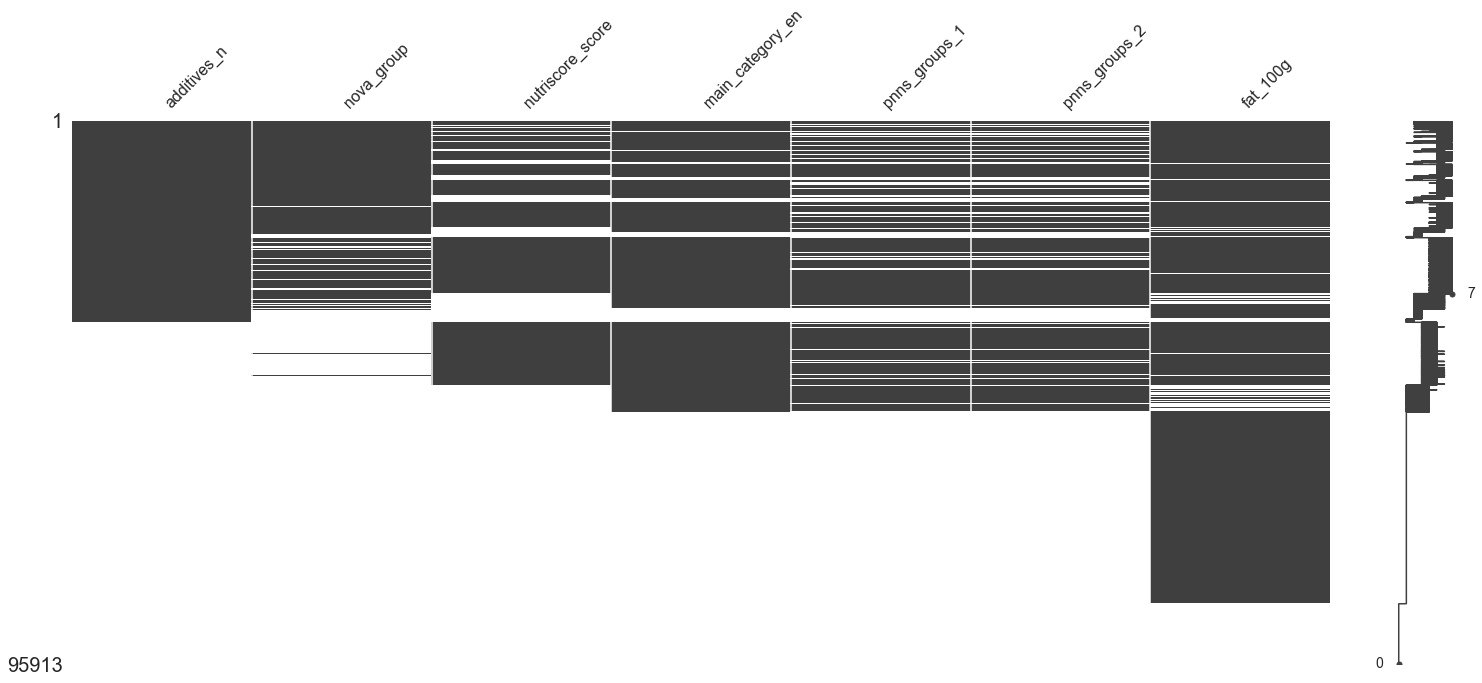

In [45]:
import missingno as msno
def show_missing_matrix(df, cols=[
    'additives_n','nova_group',
    'nutriscore_score',
    'main_category_en', 'pnns_groups_1', 'pnns_groups_2',
    'fat_100g']):
    msno.matrix(df[cols])

# raw_data_df.pipe(sort_by_points).pipe(show_missing_matrix)
net_data_df.pipe(sort_by_priority).pipe(show_missing_matrix)
to_png('3.3.2_etat_remplissage_apres_triage')

# 3.3.3 Élimine les lignes dupliquées après triage par état de remplissage

In [46]:
def drop_lignes_dupliquees(df:pd.DataFrame, subset=['code']):
    """drop duplicates, en indiquant le clé (subset) et le nombre de lignes supprimés"""
    ret = df.drop_duplicates(subset=subset,keep='first')
    print(f'drop_lignes_dupliquées[{subset}], nb. lignes supprimés = {(df.shape[0] - ret.shape[0])}')
    return ret

net_data_df.pipe(drop_lignes_dupliquees);

drop_lignes_dupliquées[['code']], nb. lignes supprimés = 4


# 3.4 Pipeline pour éliminer lignes dupliquées

In [47]:
def pipeline_eliminer_lignes_dupliquees(df):
    return(df
        .pipe(sort_by_priority)
        .pipe(drop_lignes_dupliquees,subset=['code'])
        .pipe(drop_lignes_dupliquees,subset=['product_name','brands'])
    )

net_data_df=net_data_df.pipe(pipeline_eliminer_lignes_dupliquees)

drop_lignes_dupliquées[['code']], nb. lignes supprimés = 4
drop_lignes_dupliquées[['product_name', 'brands']], nb. lignes supprimés = 6168


# 4. Étude des valeurs manquantes<a name="valeurs-manquants"></a>

Les valeurs manquantes peuvent être imputés si on a assez de données dans la colonne,
et que les valeurs aberrantes ont étés traités. Sinon, la colonne n'est pas utilisable.

Dans cette premiere partie :
   - Suppression de colonnes vides
   - Remplissage des colonnes
   - Valeur 'unknown' est une valeur manquante : le remplace avec la valeur 'null' / NaN
   - Suppression de colonnes trop vides
   - Analyse de la distribution des valeurs manquantes (corrélation entre colonnes)
   - Pipeline pour traiter valeurs manquantes (partie 1)

Après traitement de valeurs aberrantes, on traitera les valeurs manquantes par imputation (partie 2)

## 4.1 Suppression de colonnes vides

In [48]:
def drop_unnamed_colonnes(df):
    """Colonnes qui commence par Unnamed sont en général des colonnes sans intérêt, produit par export pd.to_csv"""
    unnamed_cols=list(df.columns[df.columns.str.startswith('Unnamed')])
    print (f'drop unnamed colonnes : drop {unnamed_cols}')
    return df.drop(columns=unnamed_cols)

net_data_df=net_data_df.pipe(drop_unnamed_colonnes)

def drop_colonnes_vides(df):
    # return df.dropna(how='all', axis=1)
    colonnes_vides = [col for col in df.columns if df[col].isnull().all()]
    print (f'drop colonnes vides: drop {colonnes_vides}')
    return df.drop(columns=colonnes_vides)

net_data_df=net_data_df.pipe(drop_colonnes_vides)

drop unnamed colonnes : drop ['Unnamed: 0']
drop colonnes vides: drop ['cities', 'allergens_en', 'no_nutriments', 'additives', 'ingredients_from_palm_oil', 'ingredients_that_may_be_from_palm_oil', '-lignoceric-acid_100g', '-elaidic-acid_100g', '-erucic-acid_100g', '-nervonic-acid_100g', 'casein_100g', 'chlorophyl_100g', 'nutrition-score-uk_100g', 'glycemic-index_100g', 'water-hardness_100g']


## 4.2 Remplissage des colonnes

### 4.2.1 Taux de remplissage des colonnes des 'additifs'

Notre colonne d'intérêt est le nombre d'additifs : Quel est sont taux de remplissage ?

In [49]:
def taux_remplissage(df,col):
    total=len(df)
    cpt=df[col].count()
    print (f'"{col}": {cpt} ({round(100* cpt / total)}%)')
    return df

(net_data_df
    .pipe(taux_remplissage,'additives_n')
    .pipe(taux_remplissage,'additives_tags'));

"additives_n": 34780 (39%)
"additives_tags": 20217 (23%)


### 4.2.2 Taux de remplissage des autres colonnes

On cherche des colonnes avec un taux de remplissage similaire ou plus que nos colonnes des additifs.
On define le niveau minimum de remplissage à 20%

#### 4.2.2.1 Remplissage comme bars

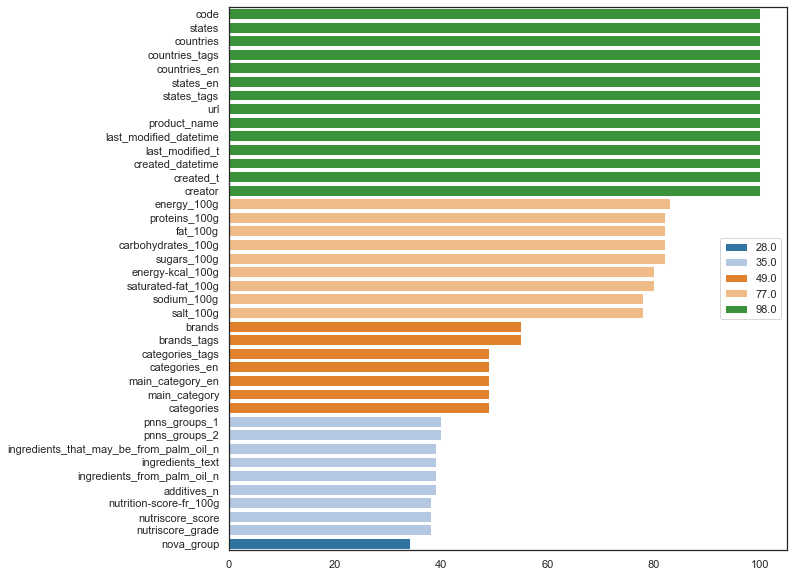

In [50]:
def show_bar_count(df:pd.DataFrame, nb=40):
    ret= round((1-df.isna().mean())*100).sort_values(ascending=False)[:nb]
    plt.figure(figsize=(10,10))
    sns.barplot(y=ret.index, x=ret.values, hue=(ret.values//7*7), dodge=False)

show_bar_count(net_data_df)
to_png('4.2.2.1_taux_remplissage_colonnes_bar')
# show_bar_count(net_data_df)[10:50].plot(kind='bar')
# net_data_df.notnull()

#### 4.2.2.2 Remplissage comme colonnes

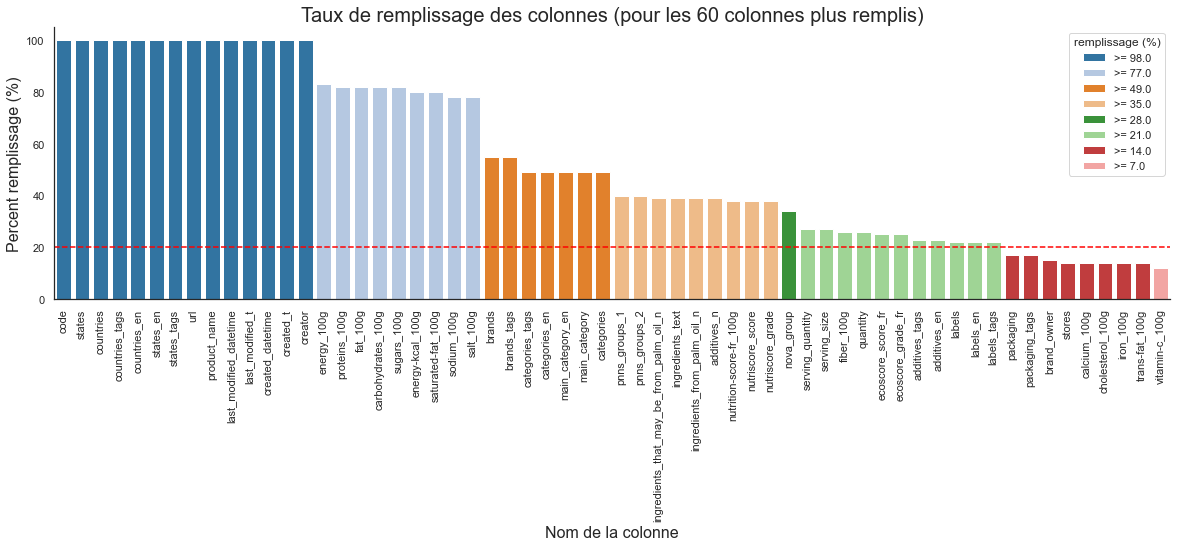

In [51]:
def plot_colonne_remplissage(df:pd.DataFrame, titre='remplissage', figsize=None, head=True, max_colonnes=100):
    """Affiche la remplissage de chaque colonne"""
    remplissage = (round((1-df.isna().mean())*100)
                    .sort_values(ascending=False)
                    .to_frame(name='taux')
                    .rename_axis('colonne').reset_index())
    if head:
        remplissage = remplissage.head(max_colonnes)
    else:
        nb_colonnes = len(remplissage)
        if nb_colonnes > max_colonnes:
            remplissage = remplissage.tail(max_colonnes - nb_colonnes)

    remplissage['hue']= remplissage['taux']//7 * 7
    remplissage['hue'] = '>= ' + remplissage['hue'].astype(str)
    
    fig, ax = plt.subplots(figsize=figsize)
    ax=sns.barplot(data=remplissage, ax=ax, x='colonne', y='taux',
         hue='hue', dodge=False )
    ax.set_xlabel('Nom de la colonne', size=16)
    ax.set_ylabel('Percent remplissage (%)', size=16)
    plt.xticks(rotation=90)
    ax.axhline(20, linestyle='--',color='red')
    ax.set_title(label=titre, size=20)
    plt.legend(title='remplissage (%)')
    sns.despine()
    # plt.show()

plot_colonne_remplissage(net_data_df, 
titre='Taux de remplissage des colonnes (pour les 60 colonnes plus remplis)',
figsize=(20, 5), max_colonnes=60)
to_png('4.2.2.2_taux_remplissage_colonnes_barplot')

## 4.3 Drop colonnes avec moins de 20% remplissage

In [52]:
keep_columns=['ingredients_from_palm_oil_tags',
 'ingredients_that_may_be_from_palm_oil_tags',
#  'packaging_text', 'first_packaging_code_geo'
 ]

In [53]:
def drop_colonnes_trop_vides(df:pd.DataFrame, threshold=0, keep_cols=[]):
    """supprime les colonnes, sauf des colonnes dans la liste de colonnes à retenir"""
    cols=list(set(df.columns.to_list()) - set(keep_cols))
    freq = 1-df[cols].isnull().mean()
    colonnes_trop_vides = freq[freq <= threshold]
    drop_cols=colonnes_trop_vides.sort_values(ascending=True).index.tolist()
    total = len(df)
    txt=f'drop_colonnes_vides, threshold = {threshold}, drop {len(drop_cols)} colonnes: '
    for col in drop_cols:
        cpt=df[col].count()
        txt += f'"{col}": {cpt} ({round(100* cpt / total)}%); '
    print (txt)   
    return df.drop(colonnes_trop_vides.index, axis=1)

## 4.4 Pipeline pour traiter les valeurs manquantes

In [54]:
def pipeline_traiter_valeurs_manquantes(df):
    # Notre intérêt est des additifs
    keep_columns=['ingredients_from_palm_oil_tags','ingredients_that_may_be_from_palm_oil_tags',
    
    ]
    return (df
           .pipe(drop_unnamed_colonnes)
           .pipe(drop_colonnes_vides)
           .pipe(drop_colonnes_trop_vides, threshold=0.05, keep_cols=keep_columns)
           .pipe(drop_colonnes_trop_vides, threshold=0.10, keep_cols=keep_columns)
           .pipe(drop_colonnes_trop_vides, threshold=0.15, keep_cols=keep_columns)
           .pipe(drop_colonnes_trop_vides, threshold=0.20, keep_cols=keep_columns)
           )

net_data_df = (net_data_df
               .pipe(pipeline_eliminer_lignes_dupliquees)
               .pipe(pipeline_traiter_valeurs_manquantes)
               )
print(f'shape : {net_data_df.shape}')

drop_lignes_dupliquées[['code']], nb. lignes supprimés = 0
drop_lignes_dupliquées[['product_name', 'brands']], nb. lignes supprimés = 0
drop unnamed colonnes : drop []
drop colonnes vides: drop []
drop_colonnes_vides, threshold = 0.05, drop 91 colonnes: "-gamma-linolenic-acid_100g": 1 (0%); "-dihomo-gamma-linolenic-acid_100g": 1 (0%); "-cerotic-acid_100g": 1 (0%); "carnitine_100g": 1 (0%); "-caprylic-acid_100g": 1 (0%); "choline_100g": 1 (0%); "-melissic-acid_100g": 1 (0%); "-myristic-acid_100g": 1 (0%); "-stearic-acid_100g": 2 (0%); "-gondoic-acid_100g": 2 (0%); "-mead-acid_100g": 2 (0%); "serum-proteins_100g": 2 (0%); "-palmitic-acid_100g": 2 (0%); "-butyric-acid_100g": 2 (0%); "-caproic-acid_100g": 2 (0%); "-oleic-acid_100g": 2 (0%); "-lauric-acid_100g": 3 (0%); "-capric-acid_100g": 3 (0%); "nucleotides_100g": 3 (0%); "-montanic-acid_100g": 3 (0%); "-behenic-acid_100g": 3 (0%); "inositol_100g": 4 (0%); "beta-glucan_100g": 4 (0%); "beta-carotene_100g": 4 (0%); "-maltose_100g": 5 (0%)

In [55]:
print(list(net_data_df.columns))

['code', 'url', 'creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'product_name', 'quantity', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'main_category_en', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']


## 4.5 Analyse de la distribution des valeurs manquantes
Le graphique de taux remplissage montre des groupes de taux de remplissage

In [56]:
def liste_percent_remplissage(df):
    return ((1 - df.isnull().mean()) * 100).sort_values(ascending=False)

taux=liste_percent_remplissage(net_data_df)
print(taux)
print(taux.index.to_list())

code                                          100.000000
last_modified_datetime                        100.000000
url                                           100.000000
states_en                                     100.000000
states                                        100.000000
                                                 ...    
labels_en                                      22.423419
labels_tags                                    22.423419
labels                                         22.423419
ingredients_that_may_be_from_palm_oil_tags      2.348982
ingredients_from_palm_oil_tags                  0.792280
Length: 53, dtype: float64
['code', 'last_modified_datetime', 'url', 'states_en', 'states', 'product_name', 'states_tags', 'last_modified_t', 'created_datetime', 'created_t', 'creator', 'countries_tags', 'countries_en', 'countries', 'energy_100g', 'proteins_100g', 'fat_100g', 'carbohydrates_100g', 'sugars_100g', 'saturated-fat_100g', 'energy-kcal_100g', 'salt_100g', 'sod

In [57]:
analyse_cols = [
     'creator','countries_en',
      # colonnes nutritionnels
     'energy_100g', 'fat_100g', 'carbohydrates_100g', 'proteins_100g', 'sugars_100g','saturated-fat_100g','sodium_100g',
     'nutriscore_score', 'nutriscore_grade', 'nutrition-score-fr_100g',
      'ingredients_text','ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'additives_n',
      'nova_group',
      'main_category_en', 'categories_en',
      'pnns_groups_1', 'pnns_groups_2',
      'ecoscore_grade_fr', 'brands'
      ]
to_analyse=net_data_df[analyse_cols]

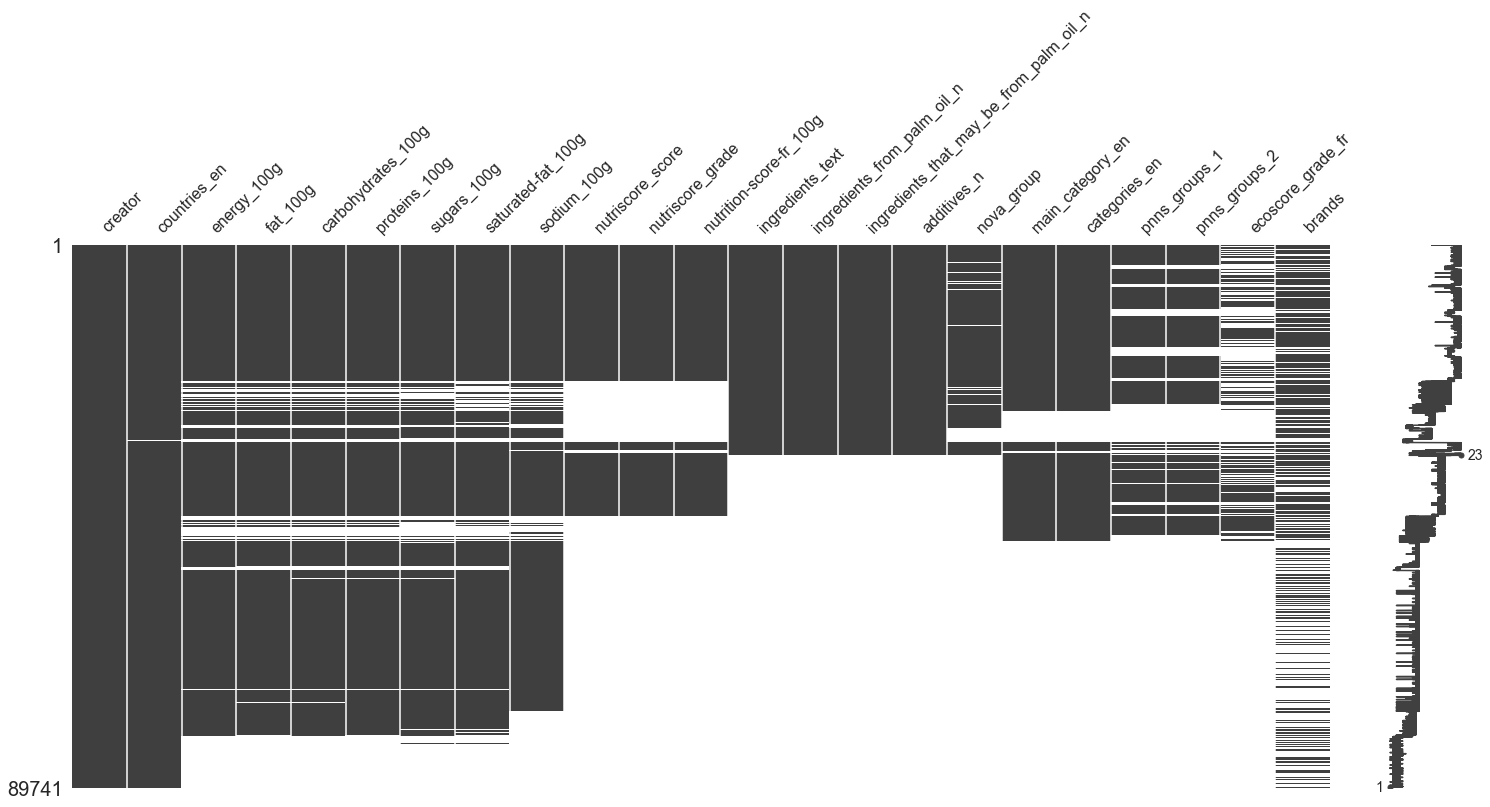

In [58]:
import missingno as msno
to_analyse=to_analyse.sort_values(by=[
    'ingredients_that_may_be_from_palm_oil_n', # ingredients
    'nutriscore_grade',                        # nutrition
    'pnns_groups_1','main_category_en',        # category
    'nova_group',
'sodium_100g','fat_100g','energy_100g',])
msno.matrix(to_analyse)
to_png('4.5_distribution_des_valeurs_manquantes')

### 4.5.1 Analyse des données manquantes par contributeur

In [59]:
top_contributeurs = (to_analyse['creator'].value_counts(normalize=True)
    .to_frame(name='freq').head(7))
top_contributeurs

,freq
kiliweb,0.593174
usda-ndb-import,0.093190
openfoodfacts-contributors,0.075930
org-database-usda,0.067171
date-limite-app,0.015467
foodvisor,0.014876
elcoco,0.012469


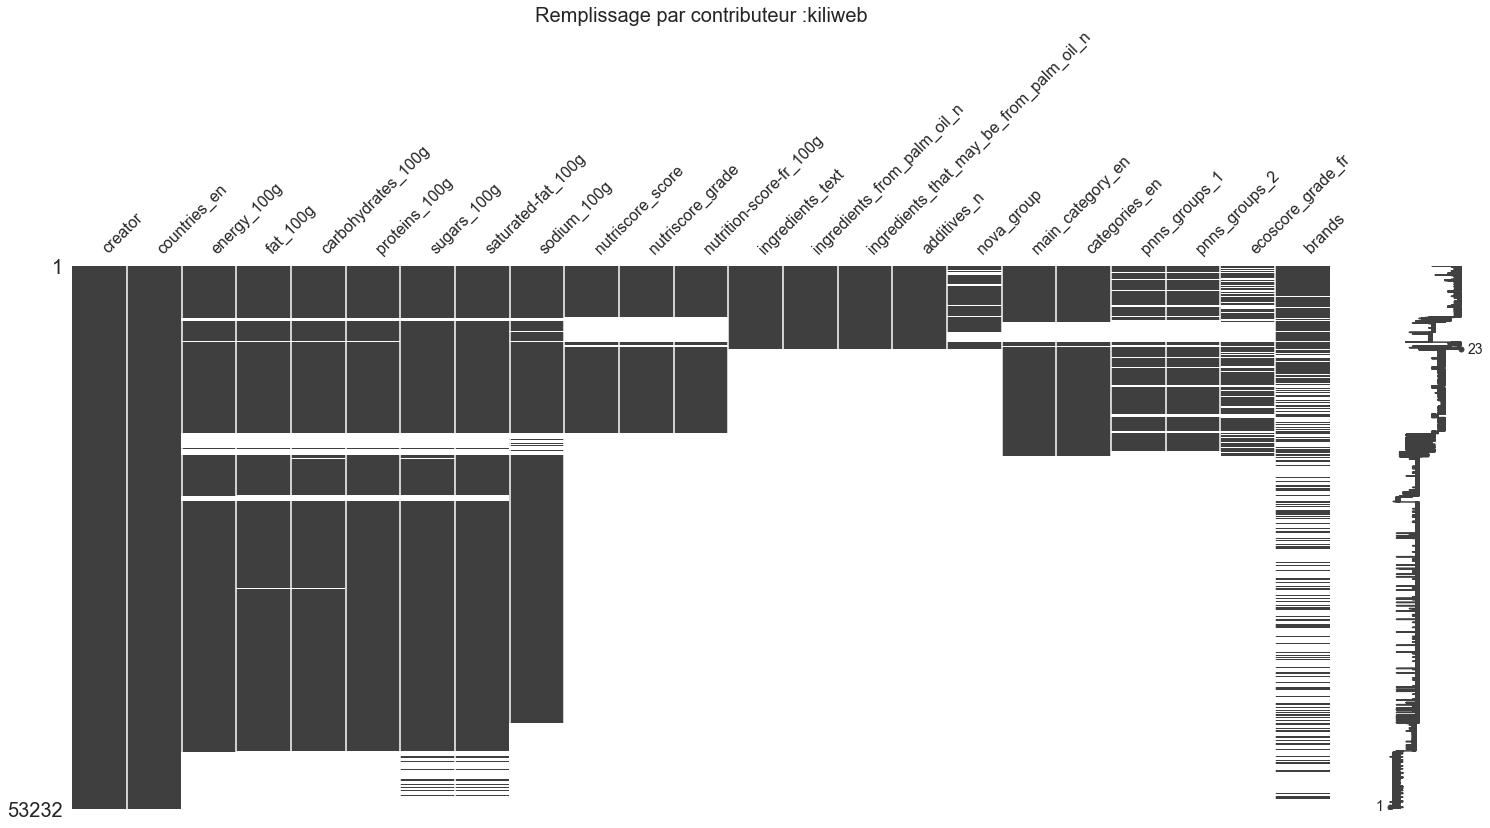

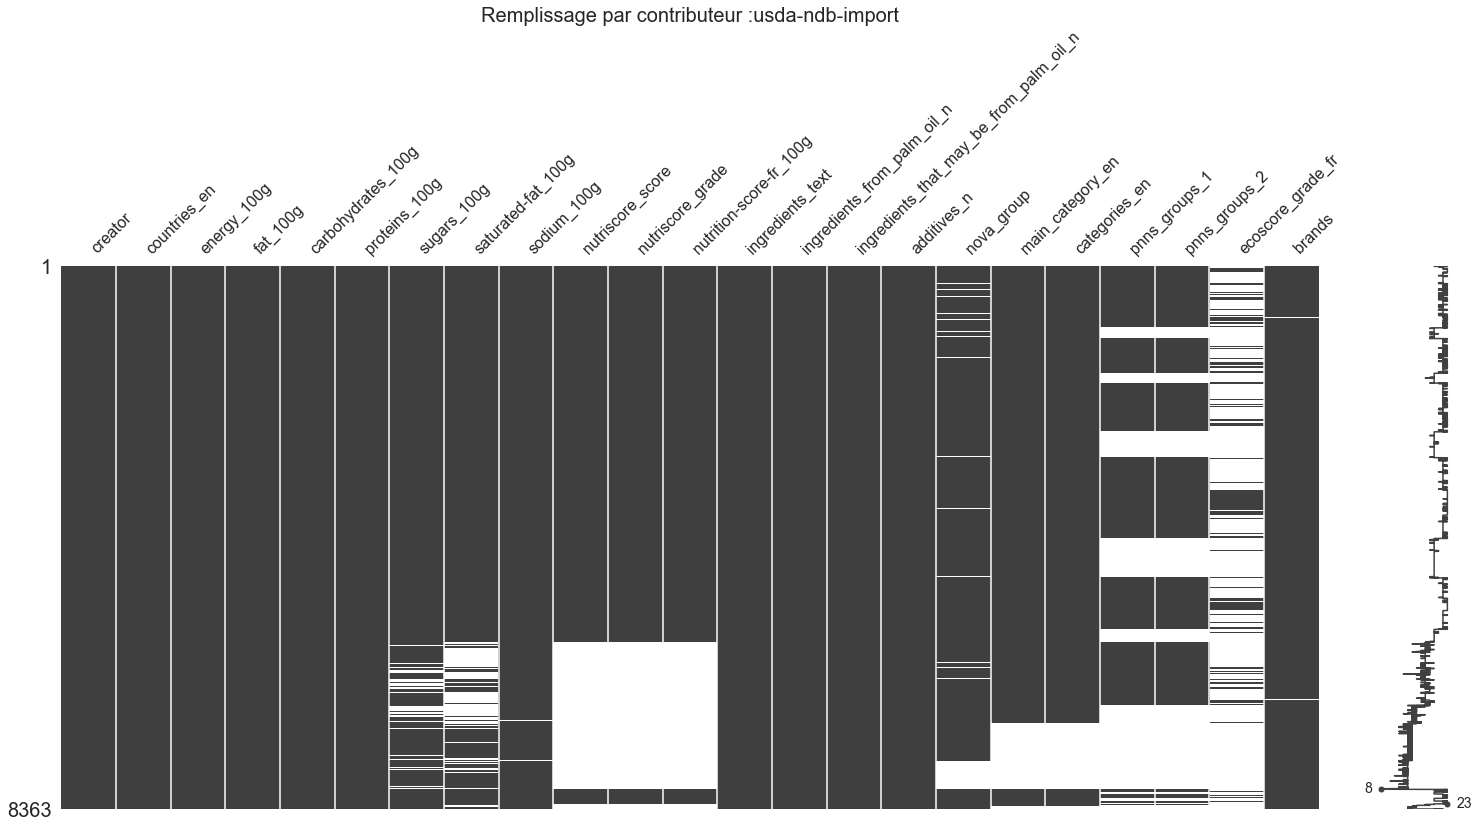

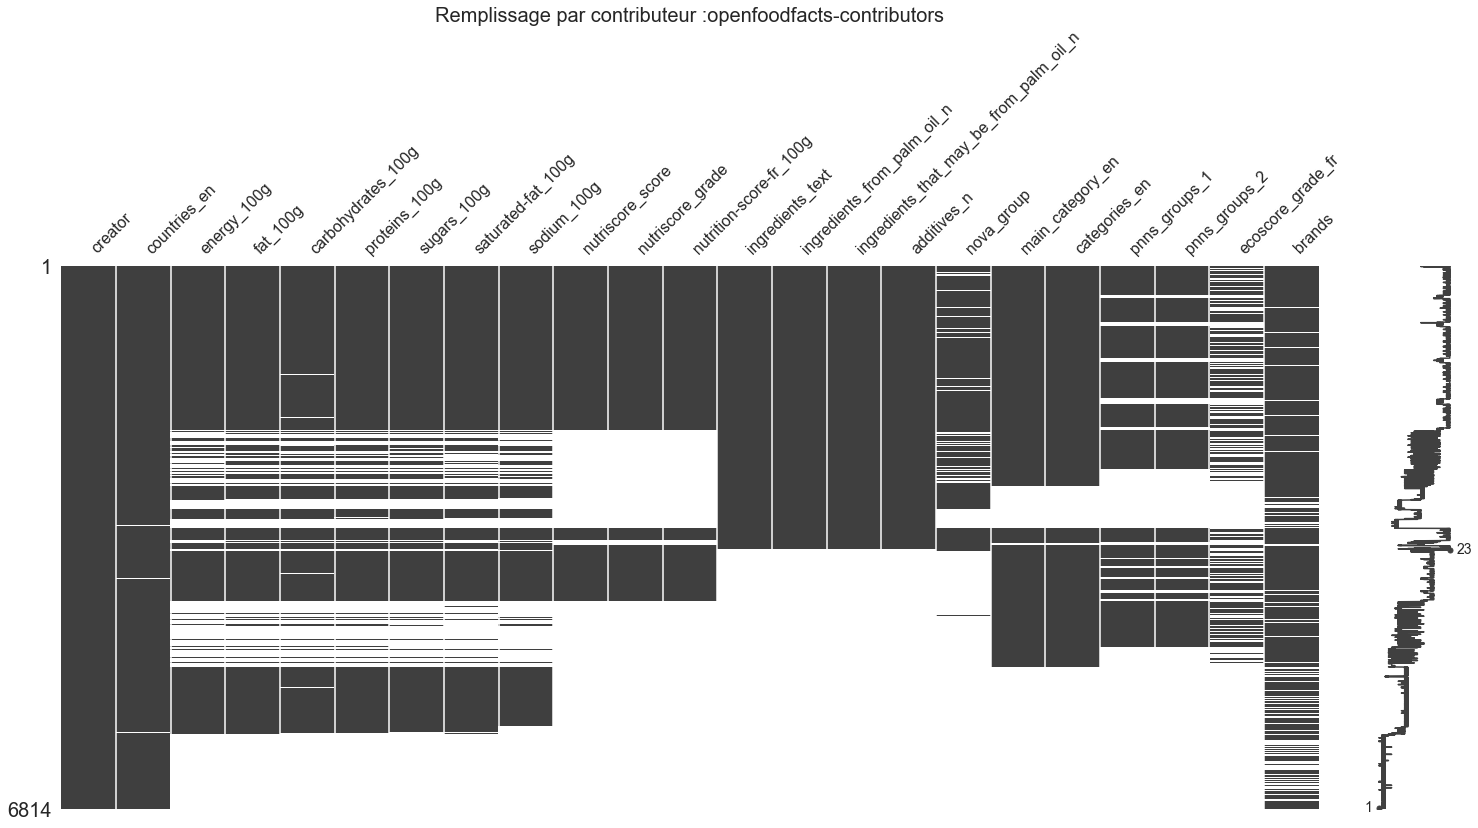

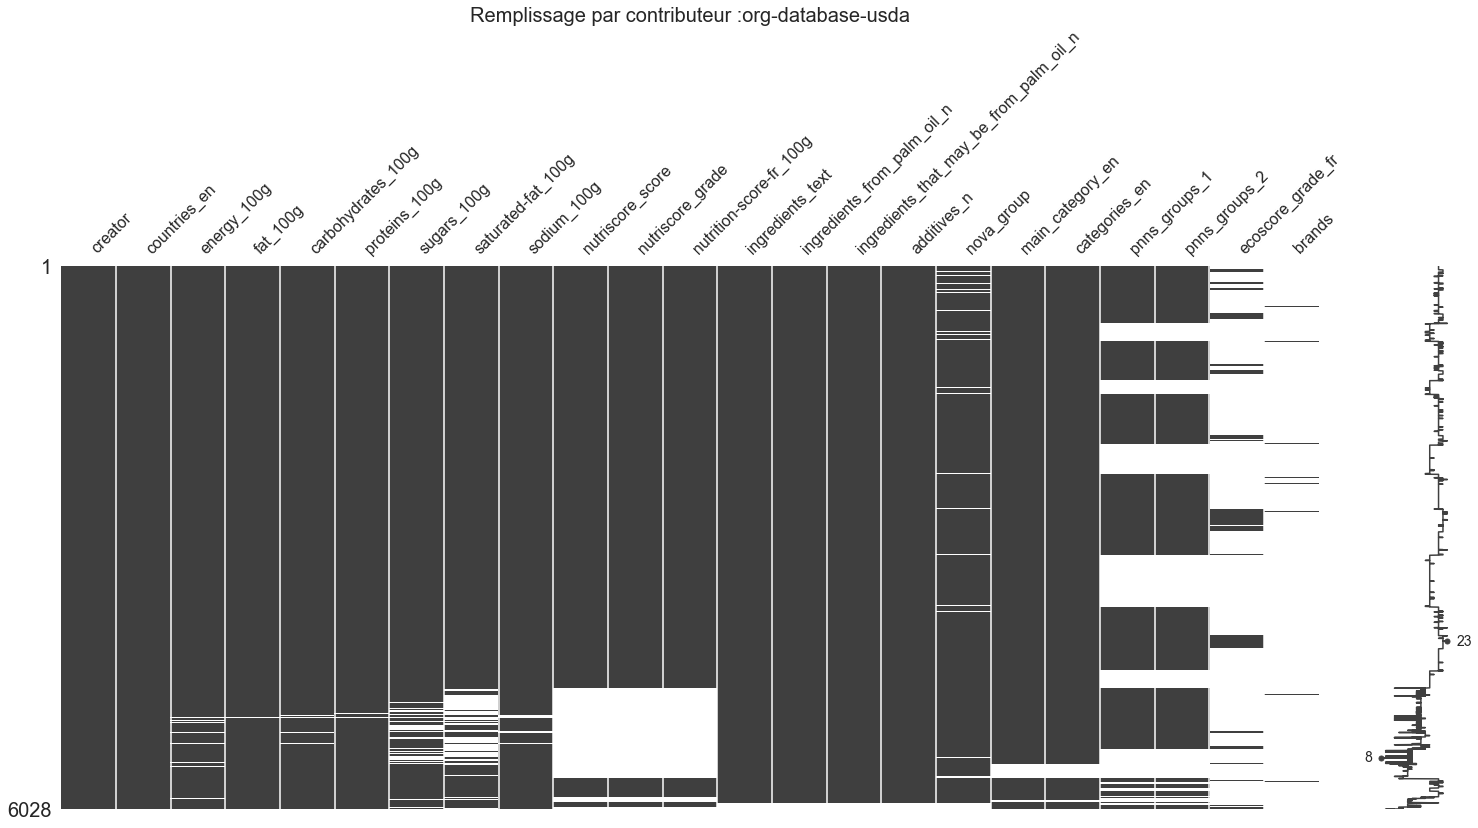

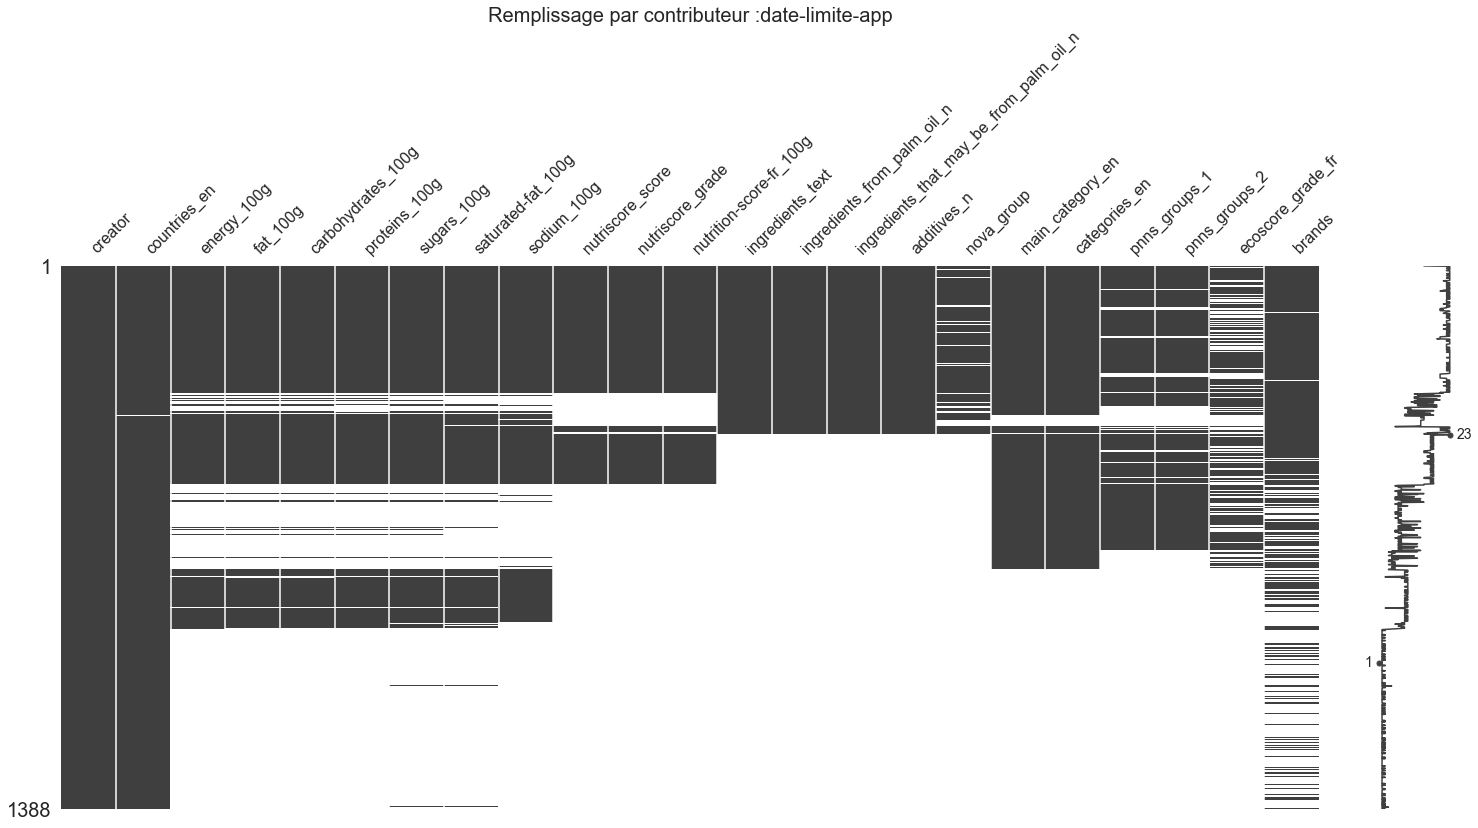

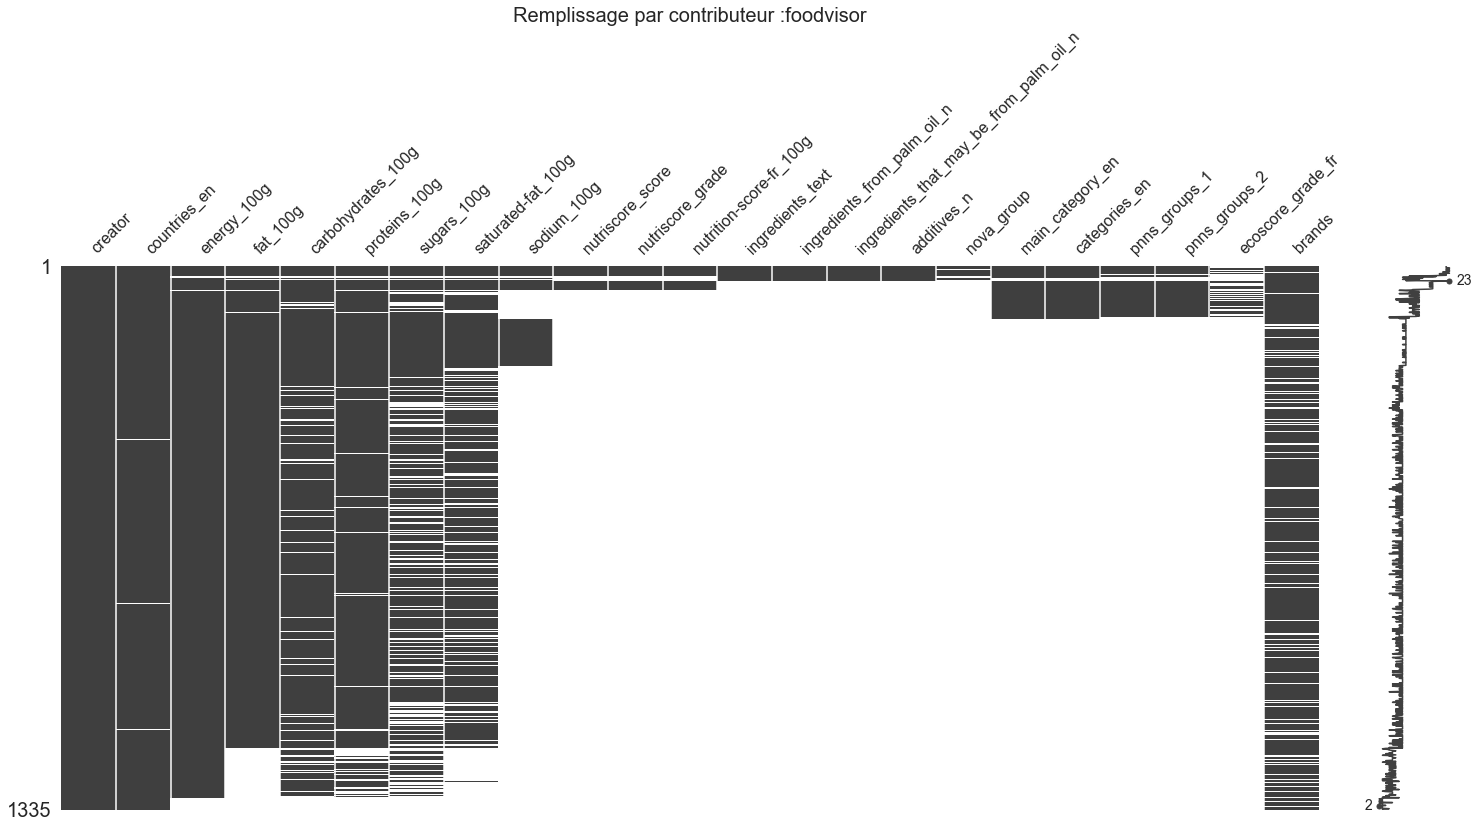

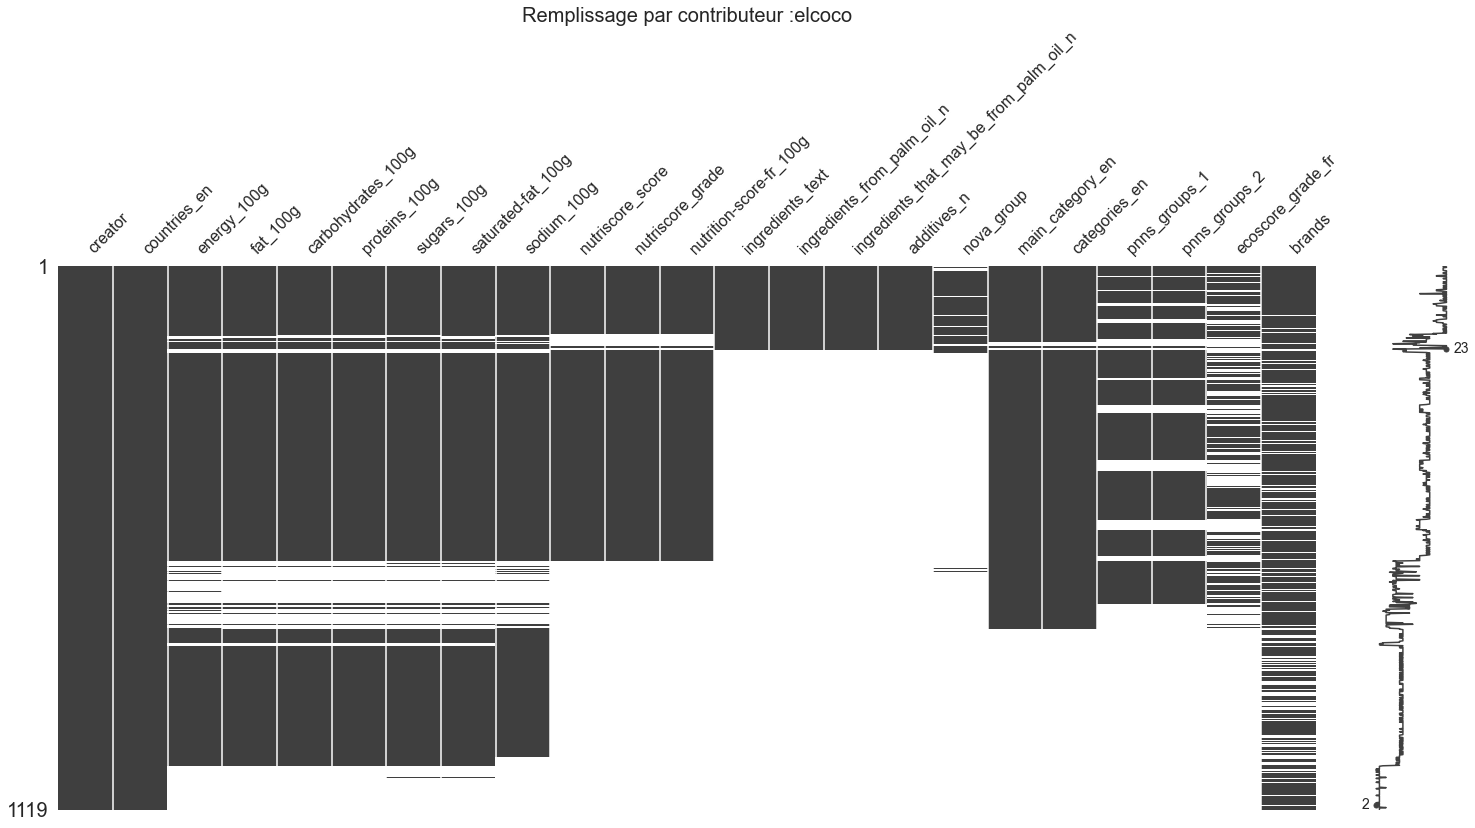

In [60]:
for contributeur in top_contributeurs.index.to_list():
    anal=to_analyse[to_analyse['creator']==contributeur]
    msno.matrix(anal)
    plt.gca().set_title(label=f'Remplissage par contributeur :{contributeur}',size=20)
    to_png(f'4.5.1_remplissage_par_contributeur_{contributeur}')

### 4.5.2 Analyse des données manquantes par pays

#### Unique values from a tags column

```python
import pandas as pd
my_df=pd.DataFrame(['a,b,c','d,e','f'], columns={'some_tags_column'})
my_df['some_tags_column'].str.split(',', expand=True).stack().unique().tolist()
```
Simplifier avec `explode_series(my_df[col]).unique().tolist()`

In [61]:
def explode_series(series:pd.Series) -> pd.Series:
    """convertir ['a,b,c','d,e','f']--> ['a','b','c','d','e','f']  """
    if series.str.contains(',').any():
        return series.str.split(',').explode()
    else:
        return series.explode()

def top_tags(df,col,normalize=True, nb=7):
    return (explode_series(df[col])
            .value_counts(normalize=normalize)
            .to_frame(name='freq').head(nb))

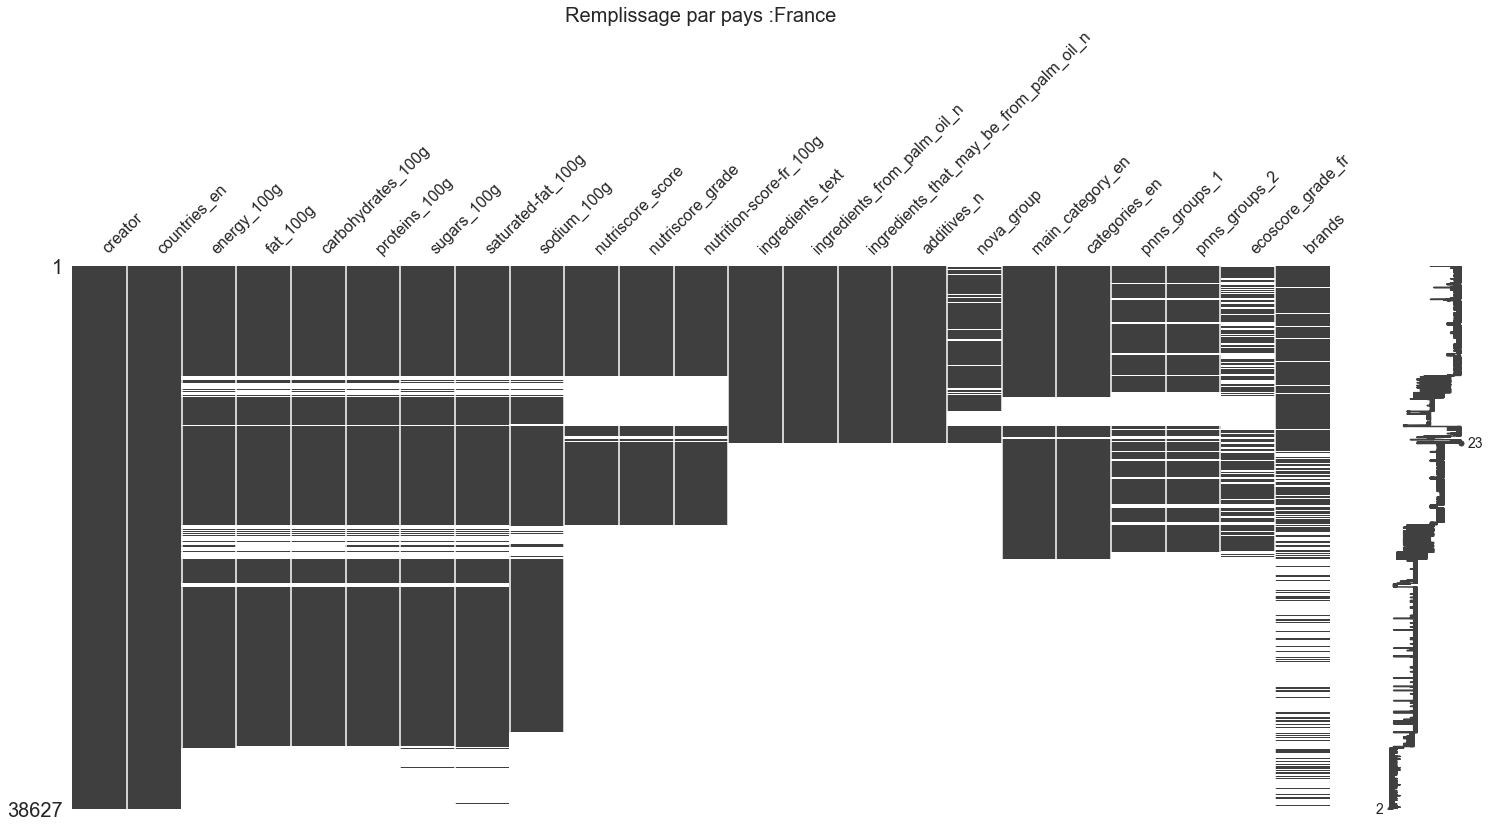

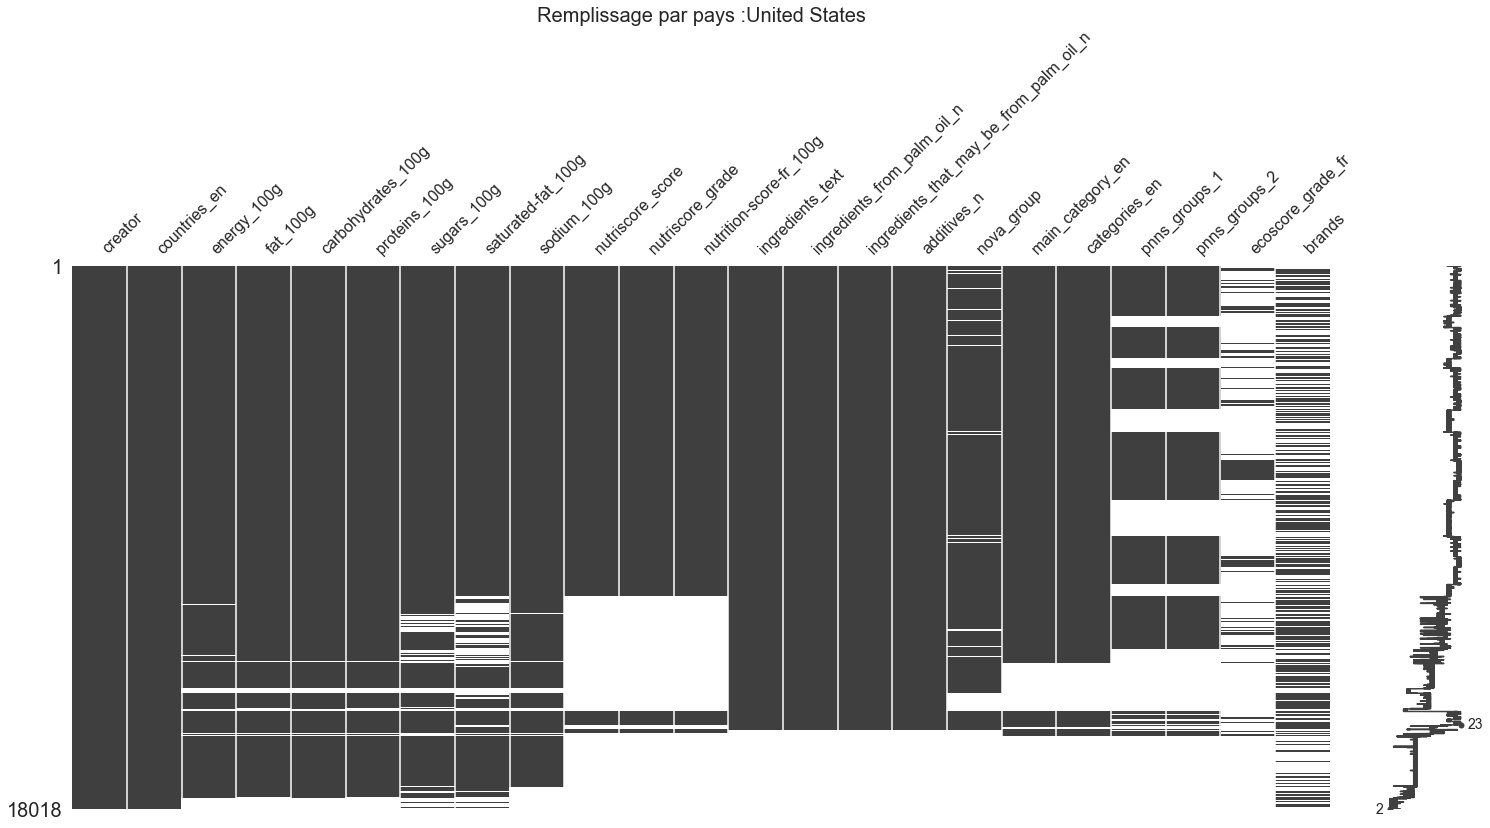

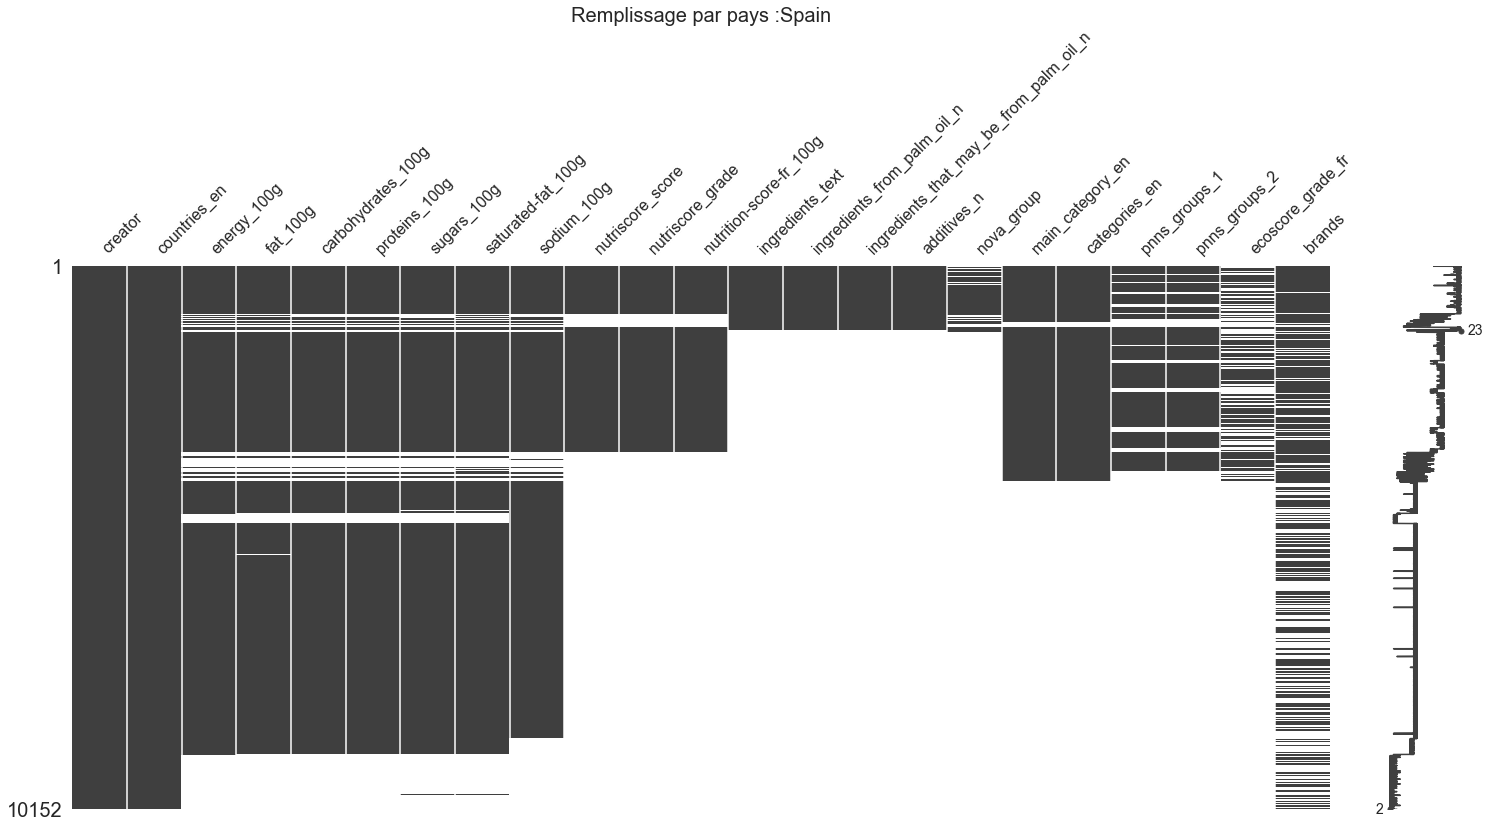

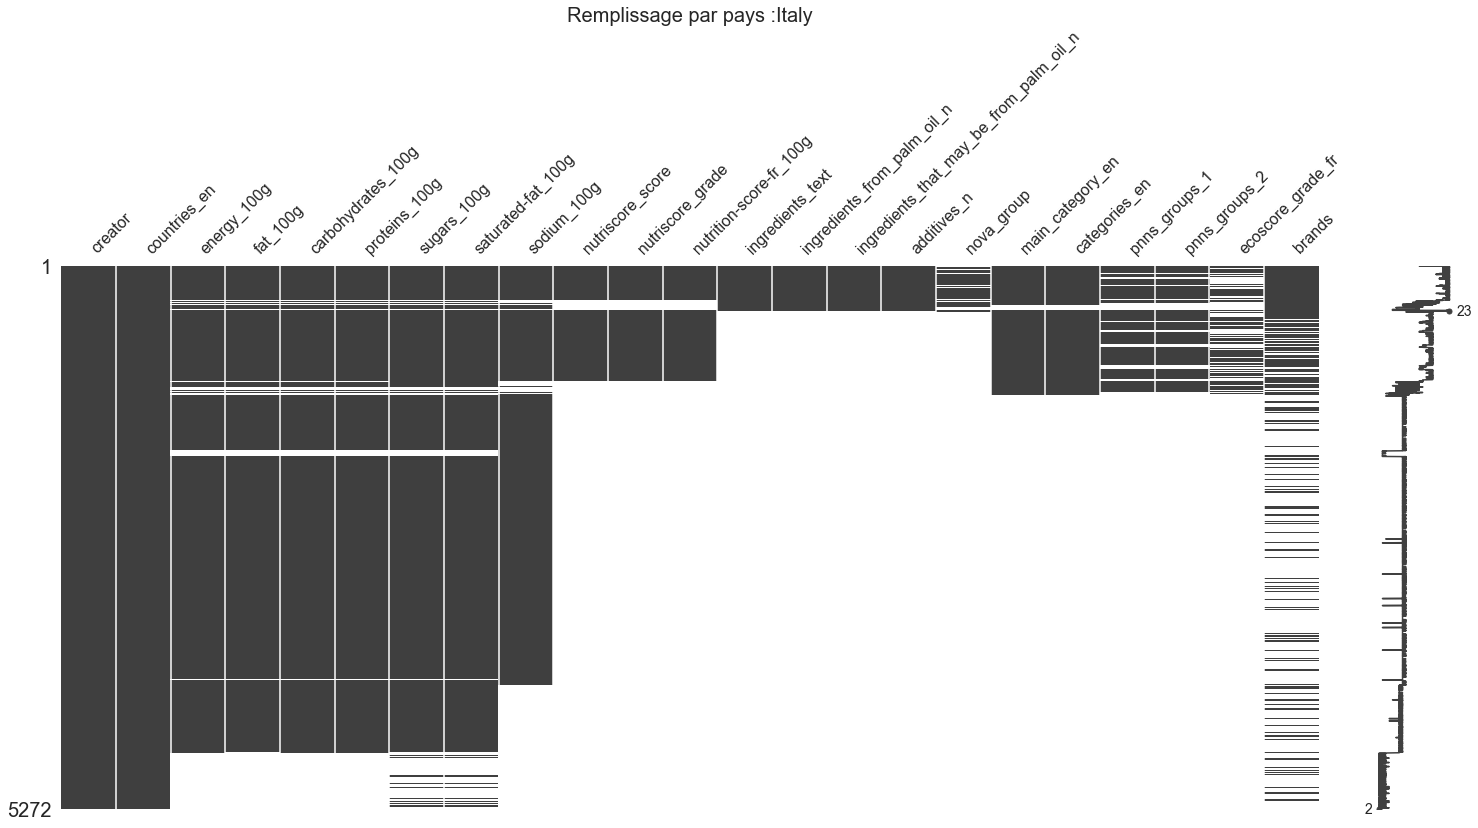

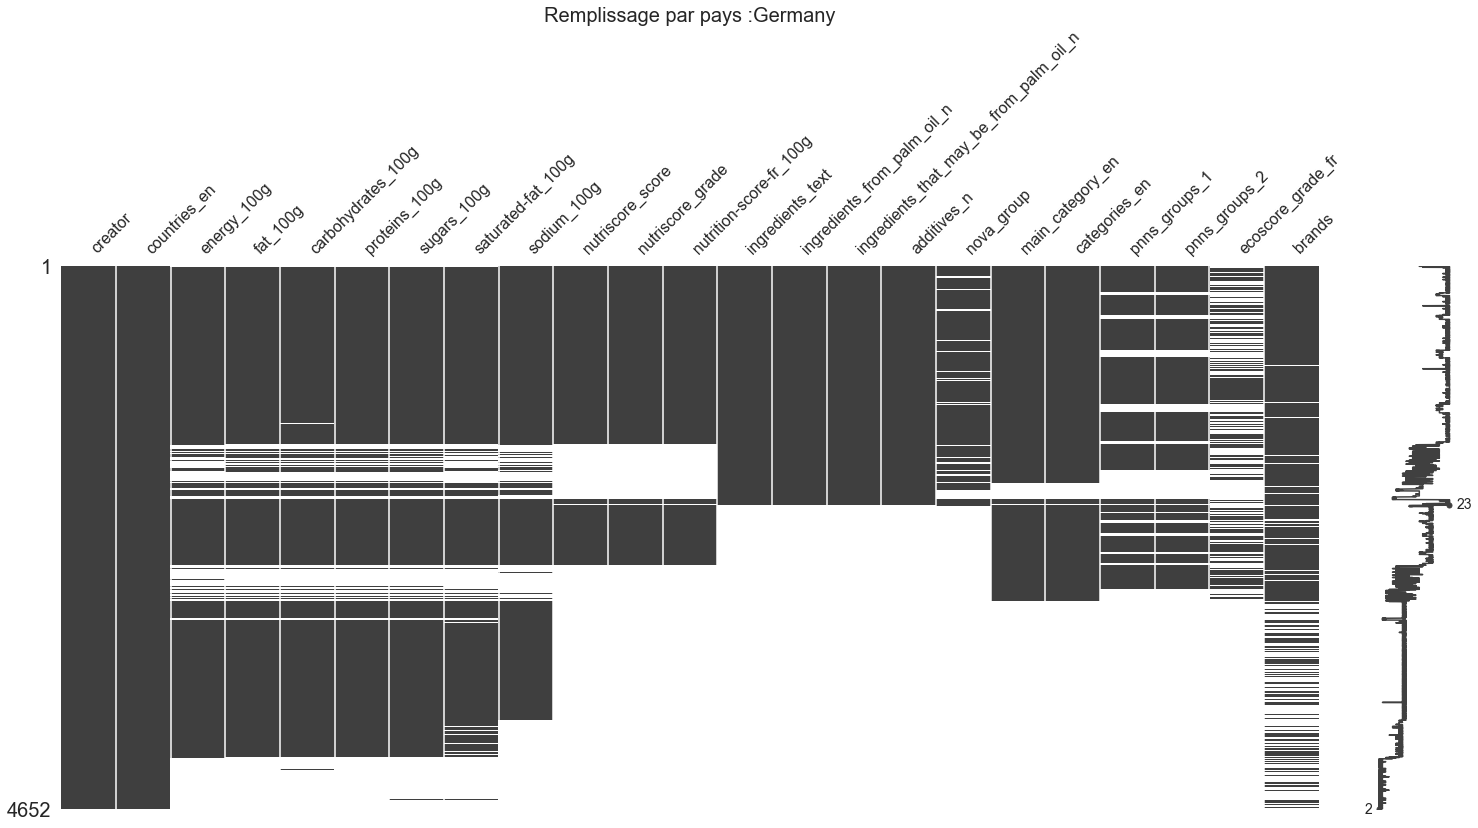

In [62]:
def remplissage_par_pays(df=to_analyse, nb=5):
    df2=df.dropna(subset=['countries_en'])
    top_pays=top_tags(df2,col='countries_en',nb=nb)
    for pays in top_pays.index.to_list():
        anal_pays=df2[df2['countries_en'].str.contains(pays)]
        msno.matrix(anal_pays)
        plt.gca().set_title(label=f'Remplissage par pays :{pays}',size=20)
        # plt.show()
        to_png(f'4.5.2_remplissage_par_pays_{pays}')

remplissage_par_pays(to_analyse, nb=5)

Intéressant, la distribution de remplissage des champs varie beaucoup entre les pays
Additives(ingredients) 
- presque complet pour produits d'Etats Unis
- bien remplis pour Allemagne
- mal remplis pour la France
- presque pas remplis pour les produits d'Espagne et d'Italie

### Conclusion de l'analyse de données manquantes

Les données fournies par chaque contributeur sont groupées :
- les ingredients (qui inclut les additifs)
- les valeurs nutritionnelles
- les categories / groupes PNNS
- le 'nova' group
- le nutriscore
- l'ecoscore
- les brands

Notre intérêt est comment éviter les mauvais additifs
1. un nouvel indicateur de niveau d'additifs méritant attention
2. voir si on peut éviter les additifs en choisissant le meilleur nutriscore
3. voir si on peut éviter les additifs en évitant certain brands
4. voir si on peut éviter les additifs en évitant certain categories/ groupes PNNS

Ces critères seront utilisés pour développer un système de recommendation

# 5. Nettoyage des valeurs aberrantes<a name="valeurs-aberrants"></a>

On inspire sur les contrôles de qualité de données d'Openfoodfacts
- <https://github.com/openfoodfacts/openfoodfacts-server/blob/main/taxonomies/data_quality.result.txt>

Les valeurs aberrantes considérées sont :
- produits qui ne sont pas de nourriture / sans nom : les élimine
- valeurs nutritionnelles < 0
- valeurs nutritionnelles > 100 g per serving de 100 g
- la somme des valeurs nutritionnelles pour 100 g > 100 g.
- sucres + amidon > glucides
- énergie pour 100 g > 3800 kJ, ce qui n'est pas possible.
- whitespace (colonne 'product_name' par exemple)

## 5.1 Produits qui ne sont pas de nourriture / sans nom

### 5.1.1 Supprimer les produits sans nom

In [63]:
print(net_data_df['product_name'].isnull().sum())
net_data_df= net_data_df.dropna(subset=['product_name'])


0


### 5.1.2 Trouver produits aberrantes

In [64]:
NONE_FOOD_WORD_LIST: list = ('non food,dog food,bird food,cat food,pour chien,pour chat,'
                             + 'shampoo,savon,dentifrice,toothpaste,transpirant,nivea,garnier,beauty,visage,'
                             + 'detergent,vaisselle,wash,cleaner,softener,adoucissant,lessive,éponge,'
                             + 'clothes,books,kitchenware,medicine,poubelle').split(',')

# categories à exclure de la recherche
FOOD_CATEGORIES: list = ['cheeses']  # exemple: 'washed-rind cheeses'


def liste_non_foods(df: pd.DataFrame, col='product_name', non_foods=NONE_FOOD_WORD_LIST, 
            food_categories=FOOD_CATEGORIES, nb=20):
    """Trouver les produits qui ne sont pas des aliments"""
    non_foods = '|'.join(non_foods)
    food_categories = '|'.join(food_categories)
    # tagged 'Non food product'
    filtre_tagged_non_food = df['categories_en'].fillna(
        '').str.contains('non food', case=False, regex=True)
    # chercher d'autres produits qui ne sont pas alimentation
    filtre_non_foods = df[col].fillna('').str.contains(
        non_foods, case=False, regex=True)
    # eviter d'inclure les food categories qui contient les mots des non foods
    filtre_foods = df['categories_en'].fillna('').str.contains(
        food_categories, case=False, regex=True)

    filtre = filtre_tagged_non_food | (~filtre_foods & filtre_non_foods)
    print(f'liste_non_foods [{col}] (nb={filtre.sum()})')
    non_food_df = df[filtre]
    # print(f'{non_food_df[col].unique()[:nb].tolist()}')
    return non_food_df


non_food_categ = net_data_df.pipe(
    liste_non_foods, col='categories_en').rename_axis('categ')
non_food_main_categ = net_data_df.pipe(
    liste_non_foods, col='main_category_en').rename_axis('main_categ')
non_food_brands = net_data_df.pipe(
    liste_non_foods, col='brands').rename_axis('brand')
non_food_products = net_data_df.pipe(
    liste_non_foods, col='product_name').rename_axis('product')


def not_in_dataframe(df1: pd.DataFrame, df2: pd.DataFrame, nb=10):
    """trouve les (non-food) produits dans df1 qui ne sont pas dans df2"""
    ret = df1[~df1.index.isin(df2.index)]
    print(
        f'produits dans {df1.index.name} pas dans {df2.index.name}: {len(ret)}')
    # print(ret['product_name'].value_counts().index[:nb].tolist())
    return ret


# Produits trouvés par filtre sur 'main_category' mais pas par 'product_name'
for df1 in [non_food_categ, non_food_main_categ, non_food_brands, non_food_products]:
    for df2 in [non_food_categ, non_food_main_categ, non_food_brands, non_food_products]:
        not_in_dataframe(df1, df2)


liste_non_foods [categories_en] (nb=123)
liste_non_foods [main_category_en] (nb=123)
liste_non_foods [brands] (nb=138)
liste_non_foods [product_name] (nb=186)
produits dans categ pas dans categ: 0
produits dans categ pas dans main_categ: 0
produits dans categ pas dans brand: 6
produits dans categ pas dans product: 4
produits dans main_categ pas dans categ: 0
produits dans main_categ pas dans main_categ: 0
produits dans main_categ pas dans brand: 6
produits dans main_categ pas dans product: 4
produits dans brand pas dans categ: 21
produits dans brand pas dans main_categ: 21
produits dans brand pas dans brand: 0
produits dans brand pas dans product: 15
produits dans product pas dans categ: 67
produits dans product pas dans main_categ: 67
produits dans product pas dans brand: 63
produits dans product pas dans product: 0


In [65]:
pd.set_option('display.max_rows', 30) 
explode_series(non_food_products['main_category_en']).value_counts().to_frame()[:10]

,main_category_en
Open Beauty Facts,43
Non food products,29
Toothpaste,6
Open Products Facts,6
Cat food,4
Tests,4
Dry cat food,3
Dog food,3
Open Pet Food Facts,2
Medicine,2


In [66]:
non_food_products[['product_name','brands','categories_tags', 'main_category_en']].sample(10)

,product_name,brands,categories_tags,main_category_en
product,,,,
14064,"Nos meilleurs,gratin,et crumbles,de famille",NaN,en:non-food-products,Non food products
10941,Crest Complete Plus Scope,NaN,"en:non-food-products,en:open-beauty-facts",Open Beauty Facts
65416,Arthrodont,NaN,"en:non-food-products,en:open-beauty-facts,en:toothpaste",Toothpaste
33551,Bio crema de dia antiedad con aceite esencial de lavanda,Garnier,"en:non-food-products,en:open-beauty-facts",Open Beauty Facts
23034,Colgate,NaN,"en:non-food-products,en:open-beauty-facts",Open Beauty Facts
57485,jamieson c+d3,jamieson,"en:non-food-products,en:open-beauty-facts,en:medicine",Medicine
39261,Lemon berry organic electrolyte solution,NaN,"en:non-food-products,en:open-products-facts",Open Products Facts
2194,Tea Beauty,NaN,NaN,NaN
15753,Lessive Liq. Lagon bleu X44 carrefour,Carrefour,en:non-food-products,Non food products


In [67]:
additifs_dans_non_foods= non_food_products['additives_en'].dropna().str.split(',').explode().value_counts().index.to_list()
print(additifs_dans_non_foods)

['E422 - Glycerol', 'E330 - Citric acid', 'E211 - Sodium benzoate', 'E415 - Xanthan gum', 'E1519 - Benzyl alcohol', 'E202 - Potassium sorbate', 'E171 - Titanium dioxide', 'E570 - Fatty acids', 'E1520 - Propylene Glycol', 'E133 - Brilliant blue FCF', 'E420 - Sorbitol', 'E955 - Sucralose', 'E460 - Cellulose', 'E433 - Polyoxyethylene sorbitan monooleate', 'E967 - Xylitol', 'E466 - Sodium carboxy methyl cellulose', 'E129 - Allura red ac', 'E218 - Methyl p-hydroxybenzoate', 'E321 - Butylated hydroxytoluene', 'E173 - Aluminium', 'E950 - Acesulfame k', 'E216 - Propyl para-hydroxybenzoate', 'E900 - Dimethylpolysiloxane and Methylphenylpolysiloxane', 'E960 - Steviol glycosides', 'E435 - Polyoxyethylene sorbitan monostearate', 'E900a - Dimethyl polysiloxane', 'E331 - Sodium citrates', 'E339ii - Disodium phosphate', 'E450 - Diphosphates', 'E210 - Benzoic acid', 'E954 - Saccharin and its salts', 'E903 - Carnauba wax', 'E502 - Carbonates', 'E551 - Silicon dioxide', 'E110 - Sunset yellow FCF', 'E450

### 5.1.3 Supprimer les produits aberrants

In [68]:
def drop_non_foods(df, col='product_name',non_foods=NONE_FOOD_WORD_LIST,food_categories=FOOD_CATEGORIES,showlist=False):
    non_foods_df=liste_non_foods(df,col,non_foods=non_foods,food_categories=food_categories )
    print(f'drop_non_foods [{col}], nb={len(non_foods_df)}')
    if showlist:
        print(f'{non_foods_df[col].unique().tolist()[:20]}')
    return df.drop(non_foods_df.index)

net_data_df.pipe(drop_non_foods,col='product_name',showlist=True);



liste_non_foods [product_name] (nb=186)
drop_non_foods [product_name], nb=186
['Crest Complete Plus Scope', "Zendium Dentifrice Extra Fraîcheur Mode d'action naturel antibactérien", 'toothpaste', 'Jelly beans, stink bug, toasted marshmallow, dirty dishwater, birthday cake, rotten egg, buttered popcorn, toothpaste, berry blue, barf, peach, canned dog food, chocolate pudding, booger, juicy pear, spoiled milk, coconut, stinky socks, tutti-fruitti, dea', 'watermelon hand balm', 'Dentifrice Soin ayurvédique', 'Crema corporal neutro balance', 'jamieson c+d3', 'Monsavon Anti-Transpirant Femme Spray Compressé Fleur de Coton Toute Légère', 'body wash', 'LOVE BEAUTY AND PLANET SHAMPOOING Oasis Réparatrice', 'Beauty', 'Mixed fruit pediatric electrolyte solution', 'Sirop en cas de Toux', 'dove cream oil', 'Colgate', 'Lingettes Lotus Baby Peau Nette', 'keops', 'A-Derma', 'Cadum savon doux']


## 5.2 Valeurs nutritionnelles aberrantes (<0 ou > 100 pour 100 g)
- valeur nutritionnelle < 0
- valeur nutritionnelle > 100 pour 100 g

## 5.2.1 Liste les colonnes nutritionnelles

In [69]:
def get_colonnes_nutritionnelles_100g(df:pd.DataFrame)-> list:
    servings = df.columns.str.endswith('_100g')
    not_servings = (df.columns.str.contains('score|footprint|energy', regex=True))
    ret = df.columns[servings & ~not_servings]
    return ret.tolist()

col_servings = get_colonnes_nutritionnelles_100g(net_data_df)
col_servings

['fat_100g',
 'saturated-fat_100g',
 'carbohydrates_100g',
 'sugars_100g',
 'fiber_100g',
 'proteins_100g',
 'salt_100g',
 'sodium_100g']

### 5.2.2 Souligne les colonnes avec des valeurs < 0 ou valeurs > 100 per 100 g

In [70]:
def get_servings_colonnes_min_max(df:pd.DataFrame)->pd.DataFrame:
    servings_colonnes = get_colonnes_nutritionnelles_100g(df)
    return df[servings_colonnes].agg([min, max]).T

def is_negative(cell_value, color='pink'):
    return f'background-color: {color};' if cell_value < 0 else None

def is_over100(cell_value, color='#FF99FF'):
    return f'background-color: {color};' if cell_value > 100 else None

(get_servings_colonnes_min_max(net_data_df).style
     .applymap(is_over100, subset=['max'])
     .applymap(is_negative, subset=['min'])
     .set_precision(2))

C:\Users\mc\AppData\Local\Temp/ipykernel_10636/2486820507.py:11: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  (get_servings_colonnes_min_max(net_data_df).style


,min,max
fat_100g,0.00,7000.00
saturated-fat_100g,0.00,135.00
carbohydrates_100g,0.00,1400.00
sugars_100g,-0.10,1050.00
fiber_100g,-20.00,900.00
proteins_100g,0.00,2500.00
salt_100g,0.00,4000.00
sodium_100g,0.00,1600.00


### 5.2.2 Drop lignes avec valeurs nutritionnelles < 0 ou valeurs nutritionnelles > 100 per 100 g

In [71]:
def get_aberrant_valeurs_nutritionnelles(df):
    servings = get_colonnes_nutritionnelles_100g(df)
    # servings avec valeurs < 0 ou > 100
    serv = df[servings].agg([min, max]).T
    aberrant_cols = serv[(serv['min'] < 0) | (serv['max'] > 100)].index
    if len(aberrant_cols) > 1:
        filtre = False
        for col in aberrant_cols:
            filtre |= (df[col] < 0) | (df[col] > 100)
        aberrant_rows = df[filtre]
    else:
        aberrant_rows = df[df['code']==-1]
    colonnes = ['code', 'product_name', 'brands'] + aberrant_cols.tolist()
    return aberrant_rows[colonnes]

net_data_df.pipe(get_aberrant_valeurs_nutritionnelles).head(5).style.set_precision(2)

C:\Users\mc\AppData\Local\Temp/ipykernel_10636/1682377914.py:16: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  net_data_df.pipe(get_aberrant_valeurs_nutritionnelles).head(5).style.set_precision(2)


,code,product_name,brands,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g
1610,7160372281000,Ranch Dressing,KraftHeinz,41.70,8.33,8.33,8.33,0.00,0.00,2190.00,875.00
13678,70552801110,"Toaster Pastries, Strawberry",Winco Foods,nan,6.25,209.38,46.88,3.10,6.25,1.51,0.60
59455,78742355047,Glacier Ranch,Great Value,25.00,3.57,64.29,3.57,1.00,7.14,1607.14,642.86
18111,66701009988,Pork back ribs,Swiss chalet,11.40,4.29,17.90,15.00,nan,12.10,625.00,250.00
31852,853205002030,"Sausage Patties, Veggie Sausage Patties",Heritage Health Food,12.86,0.00,8.57,0.00,2.90,20.00,1669.14,667.66


In [72]:
def drop_aberrant_valeurs_nutritionnelles(df):
    aberrant_rows = get_aberrant_valeurs_nutritionnelles(df)
    print(f'drop_aberrant_valeurs_nutritionnelles, nb registres aberrants : {len(aberrant_rows)}')
    if len(aberrant_rows)>0:
        return df.drop(aberrant_rows.index)
    else:
        return df

net_data_df = net_data_df.pipe(drop_aberrant_valeurs_nutritionnelles);

drop_aberrant_valeurs_nutritionnelles, nb registres aberrants : 87


## 5.3 Somme des valeurs nutritionnelles > 105 g per serving de 100 g

On met la limite à 105 g (pas 100 g) pour la somme, car les valeurs peuvent être arrondies (65.51 -> 66)



In [73]:
def get_sum_valeur_nutritionnelle_trop_grand(df:pd.DataFrame):
    servings = ['fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
    filtre_ignore_incomplete= df[servings].notnull().all(1) 
    filtre_total_trop_grand =  df[servings].sum(axis=1) >= 105 
    filtre= filtre_ignore_incomplete & filtre_total_trop_grand
    nb_rows= filtre.sum()
    print(f'get_sum_valeur_nutritionnelle_trop_grand, nb registres ou total(servings)=0 : {nb_rows}')
    example=df[filtre][servings].head(5)
    print(f'example :\n{example}')
    return df[filtre]

net_data_df.pipe(get_sum_valeur_nutritionnelle_trop_grand)[['product_name','main_category_en']].head(10)

get_sum_valeur_nutritionnelle_trop_grand, nb registres ou total(servings)=0 : 28
example :
       fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g
46083     63.64        63.64         0.0            0.0       0.00
81861     62.50        12.00         2.5           70.0       6.00
66807      0.00       100.00         0.0            0.0      15.24
75002      0.00       100.00         0.0           10.0       0.00
57180    100.00       100.00         0.0            0.0       0.00


,product_name,main_category_en
46083,"Markets, Rootbeer Barrels",NaN
81861,mousse foie de canard,fr:food-facts
66807,Ginger Paste,NaN
75002,Lollipop Racer,NaN
57180,"Markets, Soft Cherry Candy Balls",NaN
52069,Обикновени бисквити Изгрев,NaN
84712,"Zoet, Milk Chocolate Spread",Vegetable fats
81521,"Toffe, Premium Toffee, Key Lime",NaN
25431,Breakfast Sausage Seasonings,NaN
46536,هيمالايا,ar:كريم


In [74]:
def drop_aberrant_servings(df:pd.DataFrame):
    aberrant_servings = get_sum_valeur_nutritionnelle_trop_grand(df)
    return df.drop(aberrant_servings.index)

net_data_df.pipe(drop_aberrant_servings);

get_sum_valeur_nutritionnelle_trop_grand, nb registres ou total(servings)=0 : 28
example :
       fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g
46083     63.64        63.64         0.0            0.0       0.00
81861     62.50        12.00         2.5           70.0       6.00
66807      0.00       100.00         0.0            0.0      15.24
75002      0.00       100.00         0.0           10.0       0.00
57180    100.00       100.00         0.0            0.0       0.00


## 5.4 energy_kJ 100g > 3800

In [75]:
def drop_aberrant_energy(df):
    filtre = df['energy_100g']>3800
    nb_rows= filtre.sum()
    print(f'drop_aberrant_energy, nb registres aberrants : {nb_rows}')
    return df[~filtre]

net_data_df.pipe(drop_aberrant_energy);

drop_aberrant_energy, nb registres aberrants : 247


## 5.5 Whitespace

On peut aussi (si besoin) appliquer majuscule, minuscule, enlève les accents, ...

In [76]:
print(raw_data_df['product_name'].nunique())
print(raw_data_df['product_name'].str.strip().nunique())

def trim_whitespace(df,col='labels'):
    nb_avant = explode_series(df[col]).nunique()
    df[col] = df[col].str.strip()
    nb_apres = explode_series(df[col]).nunique()
    print(f'trim_whitespace [{col}], nunique {nb_avant} --> {nb_apres}')
    return df

net_data_df.pipe(trim_whitespace,col='labels');

# colonnes ou le whitespace change les nombre de valeurs uniques
# product_name	0.0%
# generic_name	0.2%
# quantity	0.6%
# brands	0.2%
# categories	0.0%
# labels	7.5%
# ingredients_text	0.0%
# serving_size	0.0%

82680
82653
trim_whitespace [labels], nunique 4337 --> 4015


## 5.6 Pipeline pour traiter les valeurs aberrantes

In [77]:
def pipeline_traiter_valeurs_aberrantes(df):
    return (df
            .pipe(drop_non_foods,col='main_category_en')
            .pipe(drop_non_foods,col='product_name')
            .pipe(drop_aberrant_valeurs_nutritionnelles)
            .pipe(drop_aberrant_servings)
            .pipe(drop_aberrant_energy)
            .pipe(trim_whitespace)
            )

net_data_df=net_data_df.pipe(pipeline_traiter_valeurs_aberrantes)

liste_non_foods [main_category_en] (nb=123)
drop_non_foods [main_category_en], nb=123
liste_non_foods [product_name] (nb=66)
drop_non_foods [product_name], nb=66
drop_aberrant_valeurs_nutritionnelles, nb registres aberrants : 0
get_sum_valeur_nutritionnelle_trop_grand, nb registres ou total(servings)=0 : 28
example :
       fat_100g  sugars_100g  fiber_100g  proteins_100g  salt_100g
46083     63.64        63.64         0.0            0.0       0.00
81861     62.50        12.00         2.5           70.0       6.00
66807      0.00       100.00         0.0            0.0      15.24
75002      0.00       100.00         0.0           10.0       0.00
57180    100.00       100.00         0.0            0.0       0.00
drop_aberrant_energy, nb registres aberrants : 245
trim_whitespace [labels], nunique 4003 --> 4003


# 6. Etude des valeurs atypiques
Les valeurs atypiques sont des outliers, par exemple :
- aucune valeur nutritionnelle 
- beaucoup d'additifs (ex M&Ms)
- beaucoup de sel (paquet de sel)
- beaucoup de sucre (paquet de sucre)
- beaucoup de gras (bouteille d'huile d'olive)
- score très haut ou très bas
- date très ancien

## 6.1 Produits avec zero valeur nutritionnelle
Par exemple : bouteille d'eau, boissons zero calories

In [78]:
def get_zero_valeur_nutritionnelle(df:pd.DataFrame):
    servings = ['fat_100g','sugars_100g','fiber_100g','proteins_100g','salt_100g']
    filtre_ignore_incomplete= df[servings].notnull().all(1) 
    filtre_total_is_zero =  df[servings].sum(axis=1) <= 0 
    filtre= filtre_ignore_incomplete & filtre_total_is_zero
    nb_rows= filtre.sum()
    print(f'get_zero_valeur_nutritionnelle, nb registres ou total(servings)=0 : {nb_rows}')
    return df[filtre]

zero_val_nutr=net_data_df.pipe(get_zero_valeur_nutritionnelle)
print(zero_val_nutr['pnns_groups_2'].value_counts().head(4))
zero_val_nutr[['product_name','pnns_groups_2']].head(10)

get_zero_valeur_nutritionnelle, nb registres ou total(servings)=0 : 196
Unsweetened beverages               25
Artificially sweetened beverages    19
Sweets                              16
Waters and flavored waters          11
Name: pnns_groups_2, dtype: int64


,product_name,pnns_groups_2
30207,Tropical Pops,NaN
75794,Multivitaminé mangue,Artificially sweetened beverages
56219,"Mentos Pure Fresh, Fresh Mint mit grünem Tee",Sweets
36384,Orange drink mix,Artificially sweetened beverages
3236,"Decaffeinated iced tea with peach, drink mix",Artificially sweetened beverages
22125,"Déstockant jour & nuit, cure 2 semaines, comprimés",NaN
54926,"Berry pomegranate liquid water enhancer, berry pomegranate",NaN
47175,BCAA Energy cerise cola,Artificially sweetened beverages
33768,Smart lemonade,NaN
66733,Miswak Gum,NaN


## 6.2 Variables numériques : Identification des outliers via box_plots
Les box plots montre visuellement 5 des valeurs fourni par dataframe.describe

Le box indique ou la moitié des observations tombe (IQR = Inter Quartile Range = Q1 à Q3)

- Q3 = 75th percentile (max valeur de la boite)
- Q2 = 50th percentile (médiane ligne au 'milieu' de la boite)
- Q1 = 25th percentile (min valeur de la boite)

Les lignes (whisker) represent 1.5 * (Q2-Q1) en bas ; 1.5 * (Q3-Q2) en haut

Valeurs hors de ces lignes sont considérés des 'outliers'

Les outliers peut avoir trop d'influence sur l'analyse :
- les statistiques
- les correlations
- les imputations

Donc, il faut les supprimer ou ignorer dans certaines analyses

numeric_cols : ['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'ecoscore_score_fr', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']


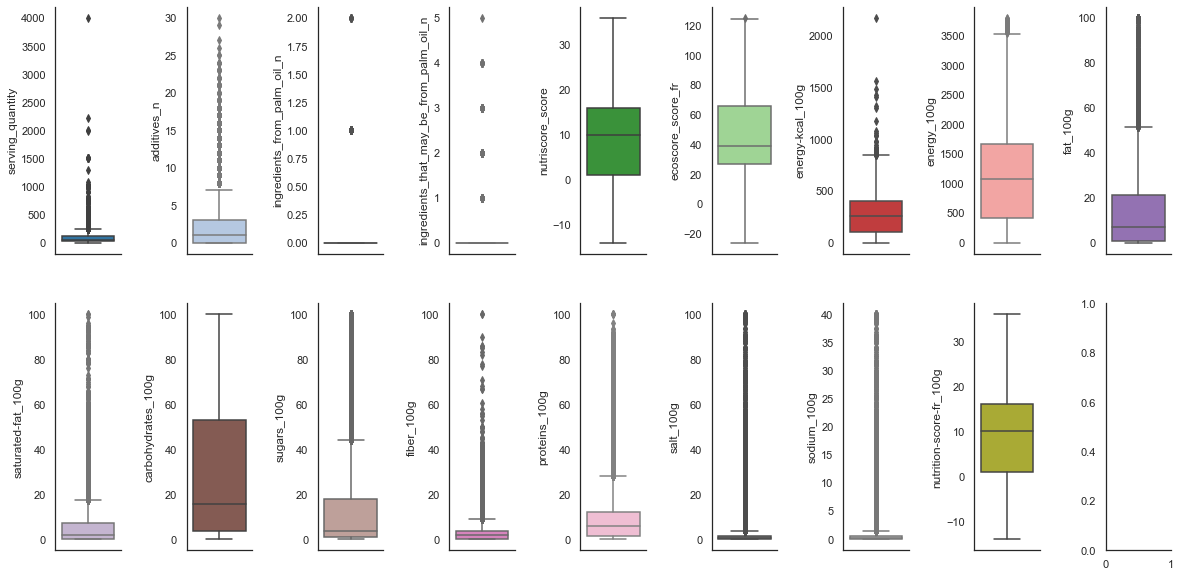

In [79]:
def plot_colonnes_as_box(df:pd.DataFrame):
    # mean and median in centre if normal
    numeric_cols=df.select_dtypes('number').columns.tolist()
    print(f'numeric_cols : {numeric_cols}')
    n_cols=9
    n_rows=len(numeric_cols) // n_cols 
    if (len(numeric_cols) % n_cols) > 0: n_rows+=1
    colors= sns.color_palette("tab20").as_hex()[:len(numeric_cols)]
    _, ax = plt.subplots(figsize=(20,10), ncols=n_cols, nrows= n_rows)
    for i, col in enumerate(numeric_cols):
        sns.boxplot(y=df[col], ax=plt.subplot(n_rows, n_cols, i+1), color=colors[i])
        sns.despine()
    # espace entre les plots
    plt.subplots_adjust(wspace=1, hspace=0.2)
    # plt.show()
    to_png(f'6.2_identification_outliers_par_boxplot')

net_data_df.pipe(plot_colonnes_as_box)

### Afficher quelques produits avec valeurs atypiques

In [2]:
def get_valeurs_atypiques(df,col, nb=10):
    desc=df[col].describe()
    Q1 = desc['25%']  # df[col].quantile(0.25)
    median = desc['50%'] # df[col].quantile(.50)
    Q3 = desc['75%'] # df[col].quantile(.75)
    IQR= (Q3-Q1)
    max = min(desc['max'],Q3 + 1.5*IQR)
    # pas besoin de chercher les valeurs trop bas - il n'y a pas des outliers vals  < 0 
    print(f'outliers [{col}] vals > {max:.2f}')
    outliers = df[df[col] > max]
    nb=min(len(outliers),nb)
    if nb > 0: 
        print(outliers.sample(nb)['product_name'].to_list())

numeric_cols=net_data_df.select_dtypes('number').columns.tolist()
for col in numeric_cols:
    net_data_df.pipe(get_valeurs_atypiques,col, nb=5)

NameError: name 'net_data_df' is not defined

## 6.3 Variables numériques : distributions (Histograms)
Pas besoin de calculer les bins pour toutes les données, un échantillon nous donne une bonne representation

numeric_cols : ['serving_quantity', 'additives_n', 'ingredients_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_n', 'nutriscore_score', 'ecoscore_score_fr', 'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'salt_100g', 'sodium_100g', 'nutrition-score-fr_100g']


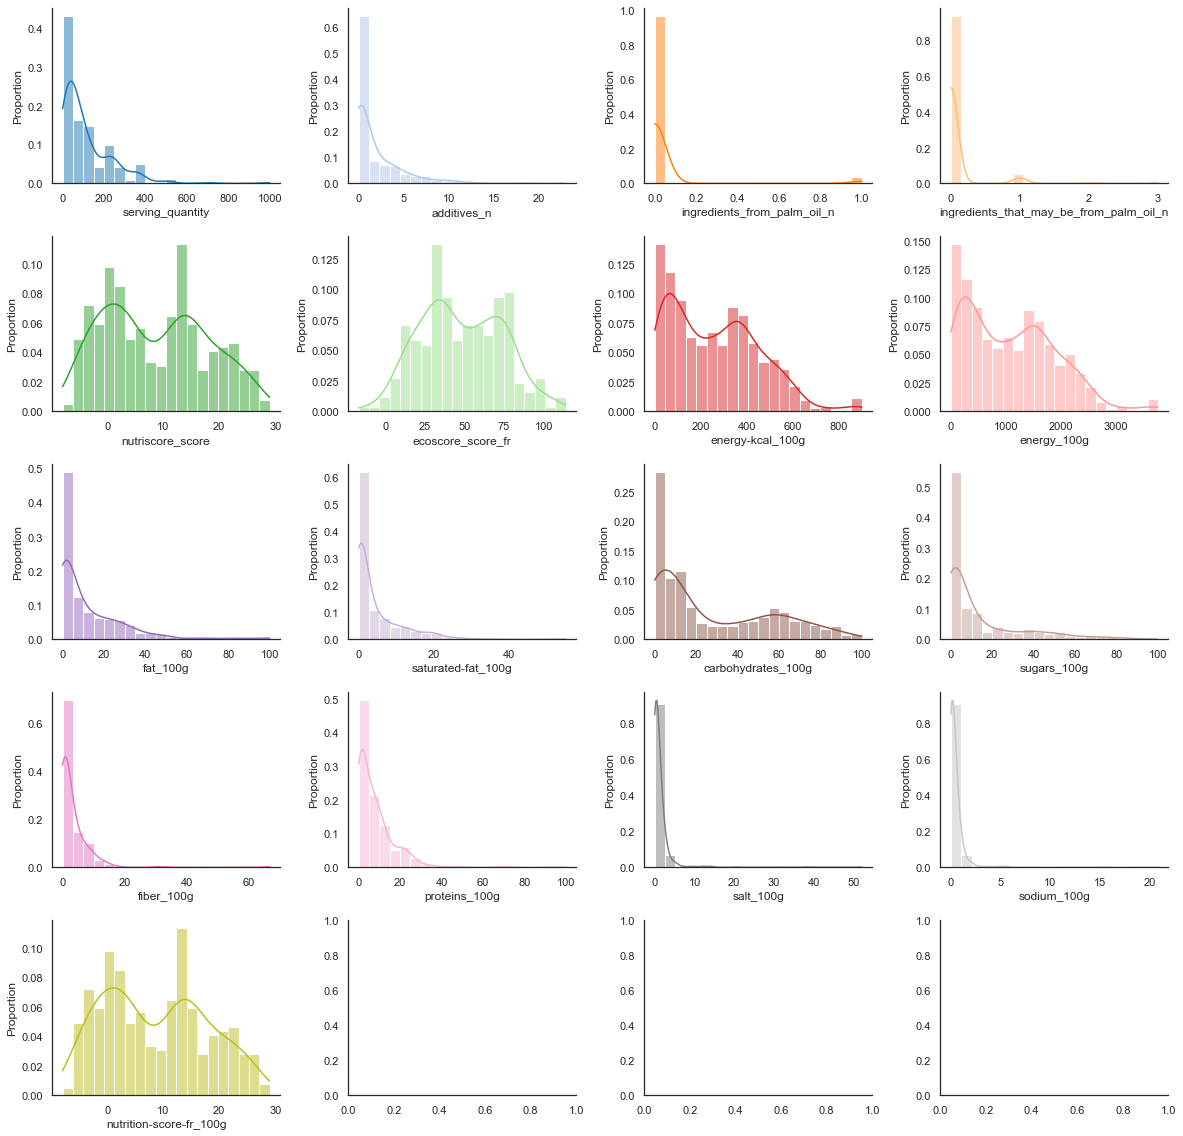

In [80]:
from scipy.stats import shapiro
def plot_histogram(series:pd.Series, color=None, ax=None, showstats=True):
    series = series.dropna()
    if ax is None: ax=plt.subplots(1,1,1)
    ax=sns.histplot(series, ax=ax, color=color,
    bins=20, kde=True, stat='proportion')
    ax.set_xlabel(series.name)
    if showstats:
        s= {'mean':series.mean(),'std':series.std(),'skew':series.skew(),'kurt':series.kurtosis()}
        stats, p = shapiro(series)
        ax.text(s)
    sns.despine()

def plot_colonnes_as_histogram(df):
    numeric_cols=df.select_dtypes('number').columns.tolist()
    print(f'numeric_cols : {numeric_cols}')
    n_cols=4
    n_rows=len(numeric_cols) // n_cols 
    if (len(numeric_cols) % n_cols) > 0: n_rows+=1
    colors= sns.color_palette("tab20").as_hex()[:len(numeric_cols)]
    _, ax = plt.subplots(figsize=(20,20), ncols=n_cols, nrows= n_rows)
    dfs=df[numeric_cols].sample(10000)
    for i, col in enumerate(numeric_cols):
        plot_histogram(dfs[col], ax=plt.subplot(n_rows, n_cols, i+1), color=colors[i])
        # ax=sns.histplot(dfs[col].dropna(), ax=plt.subplot(n_rows, n_cols, i+1), 
        # bins=20, kde=True, stat='proportion',color=colors[i])
        # ax.set_xlabel(col)
        # sns.despine()

    # espace entre les plots
    plt.subplots_adjust(wspace=0.3, hspace=0.3)
    # (df.select_dtypes('number').sample(1000)
    #  .hist(figsize=(n_cols*4,n_rows*4), layout=(n_cols,n_rows), bins=20))

    # plt.show()
    to_png(f'6.3_distribution_colonnes_numeriques_histogram')

net_data_df.pipe(plot_colonnes_as_histogram)

## 6.4 Variables numériques : description avec skew et kurtosis
On peut résumer les distributions avec mean, var, skew et kurtosis

In [81]:
def decrire_plus(df:pd.DataFrame):
    stats = df.describe(include=[np.number],datetime_is_numeric=True)
    cols=stats.columns.tolist()
    # stats.loc['var'] = df[cols].var().tolist()
    stats.loc['skew'] = df[cols].skew().tolist()
    stats.loc['kurt'] = df[cols].kurtosis().tolist()
    return stats

stats=net_data_df.pipe(decrire_plus)
print(len(stats.columns.tolist()))
stats

17


,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,23772.000000,34643.000000,34643.000000,34643.000000,34064.000000,22111.000000,71376.000000,73865.000000,73515.000000,71612.000000,73493.000000,72779.000000,23641.000000,73589.000000,69655.000000,69655.000000,34064.000000
mean,92.937624,2.057299,0.020783,0.072136,9.112553,44.716657,269.135638,1122.825383,13.399743,4.991750,28.334409,13.220383,3.002375,8.572529,1.324622,0.529849,9.112553
std,112.685368,2.912565,0.144869,0.308677,8.860349,26.177911,189.658703,790.351504,17.140496,7.666131,27.923828,19.448082,4.900561,9.895144,4.572326,1.828929,8.860349
min,0.000000,0.000000,0.000000,0.000000,-14.000000,-26.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-14.000000
25%,28.000000,0.000000,0.000000,0.000000,1.000000,27.000000,100.000000,418.000000,0.770000,0.100000,3.700000,0.700000,0.000000,1.400000,0.080000,0.032000,1.000000
50%,53.000000,1.000000,0.000000,0.000000,10.000000,39.000000,259.000000,1075.000000,6.900000,1.800000,15.790000,3.600000,1.600000,6.000000,0.571500,0.228600,10.000000
75%,114.000000,3.000000,0.000000,0.000000,16.000000,66.000000,399.000000,1666.000000,21.000000,7.000000,53.000000,18.000000,3.600000,12.000000,1.400000,0.560000,16.000000
max,4000.000000,30.000000,2.000000,5.000000,36.000000,125.000000,2171.000000,3799.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,40.000000,36.000000
skew,5.348375,2.295355,7.029664,5.296126,0.102505,0.181195,0.532189,0.502566,2.144932,3.448472,0.690115,1.912961,5.529393,2.724234,13.847545,13.847553,0.102505
kurt,91.143057,7.492559,50.131218,35.913315,-0.947660,-0.614390,0.044250,-0.217719,6.099876,22.542575,-0.888692,3.264456,59.418272,13.264728,237.966795,237.967249,-0.947660


## 6.5 Variables catégoriques : description
Pour analyser les catégories, il faut savoir :
- le nombre de valeurs uniques
- la longueur des colonnes


In [82]:
def count_unique(df: pd.DataFrame):
    uniq_df = pd.DataFrame(columns=['column', 'unique'])
    for col in df.columns:
        if df[col].dtype == 'object':
            # uniq= df[col].str.split(',', expand=True).stack().unique().tolist()
            uniq = explode_series(df[col]).nunique()
            if DEBUG: print(f'count_unique [{col}] = {uniq}')
            uniq_df = uniq_df.append({'column': col, 'unique': uniq}, ignore_index=True)
    uniq_df = uniq_df.set_index('column')
    return uniq_df

In [83]:
def max_len_colonnes(df: pd.DataFrame):
    """
    Retourne la largeur maximum des colonnes text d'un dataframe - aide à valider l'uniformité des clés et autres données
    """
    mesurer = np.vectorize(len)
    max_df = pd.DataFrame(columns=['column', 'max_len'])
    for col in df.columns:
        if df[col].dtype == 'object':
            uniq = df[col].explode().dropna().unique()
            # print(f'max_len_colonnes, nb uniq = {len(uniq)}')
            if len(uniq) > 1000:
                uniq = uniq[:1000]
            # print(f'max_len_colonnes, cut nb uniq = {len(uniq)}')
            max_len = mesurer(uniq.astype(str)).max(axis=0)
            max_df = max_df.append(
                {'column': col, 'max_len': max_len}, ignore_index=True)
    max_df = max_df.set_index('column')
    return max_df

In [84]:
def decrire_dataframe(df: pd.DataFrame,calc_max_len=True):
    """
    Retourner un dataframe avec des informations sur les colonnes d'un dataframe
    """
    ret = df.columns.to_frame(name="column").set_index('column')
    ret['count'] = df.notnull().sum()
    # ret['unique'] = df.nunique() # ne marche pas avec des colonnes tag
    ret['unique'] = count_unique(df)
    ret['dtype'] = df.dtypes
    if calc_max_len:
        ret['max_length'] = max_len_colonnes(df)
    return ret.reset_index()


In [85]:

def decrire_colonnes_object(df: pd.DataFrame,calc_max_len=False):
    """
    Retourner un dataframe avec des informations sur les colonnes objet d'un dataframe
    """
    obj_cols=df.select_dtypes('object').columns
    ret = obj_cols.to_frame(name="column").set_index('column')
    ret['count'] = df.notnull().sum()
    # ret['unique'] = df.nunique() # ne marche pas avec des colonnes tag
    ret['unique'] = count_unique(df)
    ret['dtype'] = df.dtypes
    for col in list(obj_cols):
        if df[col].str.contains(',').any(): ret.loc[col,'dtype']='list'
        else:ret.loc[col,'dtype']='str'
    if calc_max_len:
        ret['max_length'] = max_len_colonnes(df)
    return ret.reset_index()

In [86]:
net_data_df.shape

(89192, 53)

In [87]:
pd.set_option('display.max_rows', 200)
net_data_df.pipe(decrire_colonnes_object, calc_max_len=True)

,column,count,unique,dtype,max_length
0,code,89192,89192,str,24
1,url,89192,89192,str,655
2,creator,89192,2150,str,33
3,product_name,89192,87035,list,176
4,quantity,23390,4137,list,54
5,brands,49082,21286,list,58
6,brands_tags,49075,18067,list,58
7,categories,43334,15305,list,324
8,categories_tags,43334,6969,list,307
9,categories_en,43334,6969,list,262


In [88]:
# data_dict.to_csv(os_path_join(OUT_FOLDER, RAW_DATA_DICT))

# 7. Imputation de valeurs manquantes
Maintenant qu'on a compris la distribution des colonnes numériques et traité les outliers,
on peut imputer les valeurs manquantes

- Avec la fonction `.describe()` pour voir les min/max ou en faisant des boxplot pour visualiser la distribution, tu devrais y voir plus clair.
- En regardant les règles de (data quality)[https://github.com/openfoodfacts/openfoodfacts-server/blob/main/taxonomies/data_quality.result.txt]
  de OpenFoodFacts

  

## 7.1 Objectifs : 

Notre application se base sur les produits dont on connait les additifs :
1. remplir les valeurs nutriscore manquantes
2. imputer les valeurs nutritionnelles manquantes
3. remplir le main_category manquantes

### 7.1.1 Ordre de remplissage des valeurs manquantes
- On trie par taux de remplissage, pour déterminer l'ordre de rémplissage 

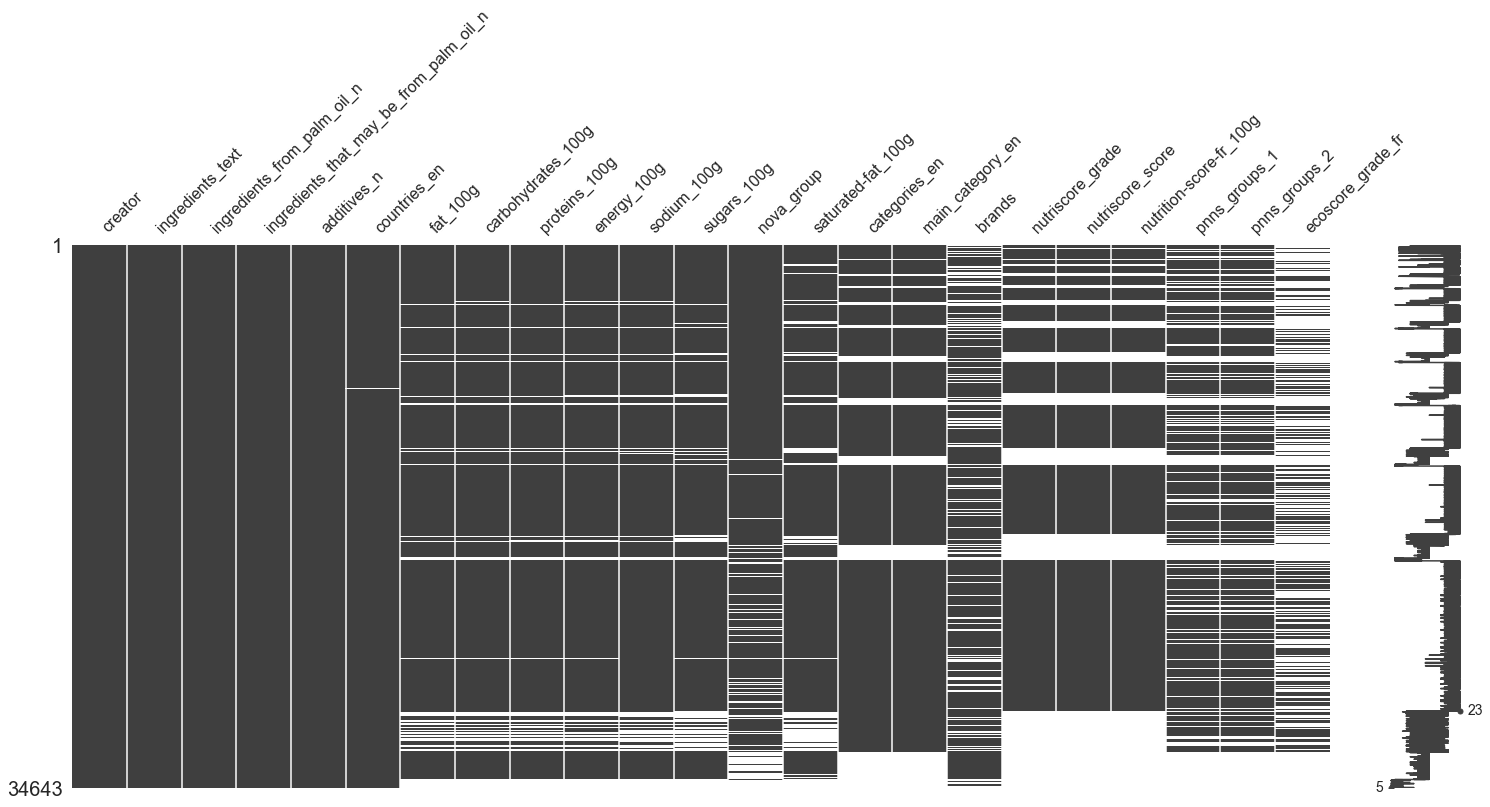

In [89]:
def sort_columns_by_remplissage(df):
    return df.isnull().mean().sort_values().index.to_list()
    
data_to_explore=net_data_df.dropna(subset=['additives_n'])
cols= sort_columns_by_remplissage(data_to_explore[to_analyse.columns])
data_to_explore.pipe(show_missing_matrix, cols=cols)
to_png(f'7.1.1_ordre_de_remplissage_valeurs_manquantes')

### Ordre d'imputation des valeurs manquantes

La stratégie de remplissage des valeurs manquantes est:
1. Remplir les valeurs nutritionnelles manquantes
1. remplir les valeurs nutriscore manquantes par 
2. imputer les valeurs nutritionnelles manquantes
3. remplir le main_category manquantes

## 7.2 Tests de normalité des distributions
Pour pouvoir choisir une stratégie de remplissage des valeurs manquantes,
il faut determiner si les variables sont distribuées normalement

- histogram / kde (ci-dessus, comparer avec distribution normal)
- box plot (ci-dessus, moyenne et médiane au centre si la distribution est normal)
- describe() (ci-dessus, skew=0 et kurtosis=0 si normal)
- QQ plot (ligne et droite si la distribution normale)
- tests:
        - Kolmogorov-smirnov, très susceptible aux outliers
        - Shapiro Wilk 

Référence :
- https://towardsdatascience.com/6-ways-to-test-for-a-normal-distribution-which-one-to-use-9dcf47d8fa93
- https://towardsdatascience.com/normality-tests-in-python-31e04aa4f411
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.normaltest.html

### 7.2.2 Tests de normalité - distribution plots (histograms / kde), boxplots, quantile-quantile plots

In [90]:
# histograms
def plot_hist(series:pd.Series):
    sns.distplot(series)

In [91]:
# boxplot
def plot_box(series:pd.Series):
    sns.boxplot(series)


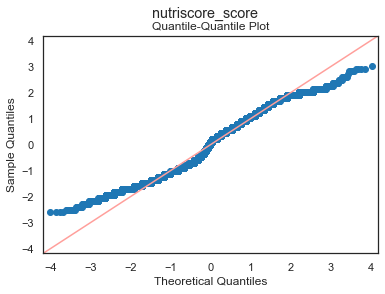

In [92]:
# Quantile Quantile Plot
# Ordered values versus theoretical quantiles
import statsmodels.api as sm
# from scipy.stats import norm

def plot_qq(df,series='nutriscore_score',titre='Quantile-Quantile Plot'):
    # my_data = norm.rvs(size=1000)
    sm.qqplot(df[series].dropna(), line='45',fit=True)
    plt.title(titre)
    plt.suptitle(series)
    # plt.show()

plot_qq(net_data_df,series='nutriscore_score')
to_png(f'7.2.1_test_normalite_qq_plot_nutriscore_score')


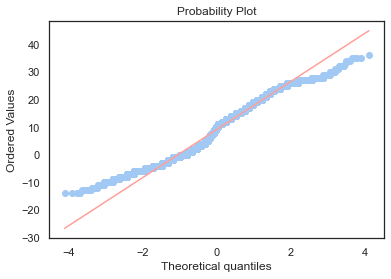

In [93]:
import scipy.stats as stats
# generate a normal distrib
def plot_qq2(df,series):
    stats.probplot(df[series].dropna(), dist='norm', fit=True,plot=plt)
    # x = stats.norm.rvs(loc=0, scale=1, size=1000)
    # stats.probplot(x, dist='norm', plot=plt)
    # plt.show()

plot_qq2(net_data_df,'nutriscore_score')
to_png(f'7.2.1_test_normalite_qq2_plot_nutriscore_score')


### 7.2.2 Tests de normalité - statistiques et p-values

In [94]:


def print_stat_p(testname,stat,p):
    print (f'{testname}: stat={stat:.3f}, p={p:.3f}')
    # reject H0 if p<=0.05
    if p> 0.05:
        print('probably Gaussian')
    else:
        print('probably not Gaussian')

def format_stat_p(stat, p):
    ch= f'stat={stat:.3f}, p={p:.3f} '
    if p<0.001: ch +='***'
    elif p<0.01: ch +='**'
    elif p<0.05: ch +='*'
    return ch

In [95]:
# Shapiro-Wilk test (1965)
from scipy.stats import norm,shapiro

def test_shapiro(series):
    my_data = norm.rvs(size=500)
    stat, p = shapiro(series)
    # print_stat_p('Shapiro-Wilk', stat,p)
    return format_stat_p(stat,p)

In [96]:
#D’Agostino’s K-squared test
# D’Agostino’s K-squared test check’s normality of a variable based on skew (symmetry) and kurtosis.
from scipy.stats import normaltest
def test_k_squared(series):
    (stat,p)=normaltest(series)
    # print_stat_p('D’Agostino’s K-squared',stat,p)
    return format_stat_p(stat,p)

# Jarque-Bera (based on Skew and kurtosis, n > 2000)
from scipy.stats import jarque_bera
def test_jarque_bera(series):
    stat,p=jarque_bera(series)
    # print_stat_p('Jarque-Bera',stat,p)
    return format_stat_p(stat,p)


#Chi-square test for normality
from scipy.stats import chisquare
def test_chi_square(series):
    stat,p=chisquare(series)
    # print_stat_p('Chi-square',stat,p)
    return format_stat_p(stat,p)

#lilliefors
from statsmodels.stats.diagnostic import lilliefors
def test_lilliefors(series):
    stat,p=lilliefors(series)
    # print_stat_p('Lilliefors',stat,p)
    return format_stat_p(stat,p)

In [97]:
# Kolmogorov-Smirnov goodness of fit test
# tests the distribution F(x) of an observed random variable against the normal distribution
from scipy.stats import kstest
def test_kolmogorov_smirnov(series):
    # my_data = norm.rvs(size=1000)
    stat, p = kstest(series, 'norm')
    # print_stat_p('Kolmogorov-Smirnov',stat,p)
    return format_stat_p(stat,p)

In [98]:
def test_normality(df):
    stats= decrire_plus(df)
    cols=stats.columns.tolist()
    for col in cols:
        vals=df[col].dropna()
        # pas besoin de plus de 4000 pour tester la distribution
        sample_size = min(4000,len(vals))
        vals=vals.sample(sample_size)
        stats.loc['K-squared',col]=test_k_squared(vals)
        stats.loc['Shapiro',col]=test_shapiro(vals)
        stats.loc['Chi-square',col]=test_chi_square(vals)
        stats.loc[col,'Kolmogorov-Smirnov']=test_kolmogorov_smirnov(vals)
    
    return stats

net_data_df.pipe(test_normality)

,serving_quantity,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,nutriscore_score,ecoscore_score_fr,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,fiber_100g,proteins_100g,salt_100g,sodium_100g,nutrition-score-fr_100g
count,23772.0,34643.0,34643.0,34643.0,34064.0,22111.0,71376.0,73865.0,73515.0,71612.0,73493.0,72779.0,23641.0,73589.0,69655.0,69655.0,34064.0
mean,92.937624,2.057299,0.020783,0.072136,9.112553,44.716657,269.135638,1122.825383,13.399743,4.99175,28.334409,13.220383,3.002375,8.572529,1.324622,0.529849,9.112553
std,112.685368,2.912565,0.144869,0.308677,8.860349,26.177911,189.658703,790.351504,17.140496,7.666131,27.923828,19.448082,4.900561,9.895144,4.572326,1.828929,8.860349
min,0.0,0.0,0.0,0.0,-14.0,-26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-14.0
25%,28.0,0.0,0.0,0.0,1.0,27.0,100.0,418.0,0.77,0.1,3.7,0.7,0.0,1.4,0.08,0.032,1.0
50%,53.0,1.0,0.0,0.0,10.0,39.0,259.0,1075.0,6.9,1.8,15.79,3.6,1.6,6.0,0.5715,0.2286,10.0
75%,114.0,3.0,0.0,0.0,16.0,66.0,399.0,1666.0,21.0,7.0,53.0,18.0,3.6,12.0,1.4,0.56,16.0
max,4000.0,30.0,2.0,5.0,36.0,125.0,2171.0,3799.0,100.0,100.0,100.0,100.0,100.0,100.0,100.0,40.0,36.0
skew,5.348375,2.295355,7.029664,5.296126,0.102505,0.181195,0.532189,0.502566,2.144932,3.448472,0.690115,1.912961,5.529393,2.724234,13.847545,13.847553,0.102505
kurt,91.143057,7.492559,50.131218,35.913315,-0.94766,-0.61439,0.04425,-0.217719,6.099876,22.542575,-0.888692,3.264456,59.418272,13.264728,237.966795,237.967249,-0.94766


On voit qu'aucun des colonnes numériques a une distribution normale

## 7.3 Evaluation des techniques d'imputation de valeurs manquantes 
- <https://scikit-learn.org/stable/auto_examples/impute/plot_missing_values.html#sphx-glr-auto-examples-impute-plot-missing-values-py>
-<https://towardsdatascience.com/preprocessing-regression-imputation-of-missing-continuous-values-f612179bafb4>

### 7.3.1 Techniques d'imputation différentes :

- SimpleImputer : imputation avec une valeur constante (0)
- SimpleImputer : imputation avec la moyenne
- KNNImputer    : imputation avec k nearest neighbor
- IterativeImputer: imputation iterative (MICE)


L'imputation iterative fait plusieurs iterations, exige encodage des variables catégoriques et peut prend beaucoup de temps

#### Étapes pour évaluer la performance d'une méthode d'imputation
1. Choisir des colonnes X pour imputer la variable y
2. Créer un jeu de données sans valeurs manquantes `[X,y].dropna()`
3. Diviser en jeux de données `train` et `test`
4. entrainer le model sur des données `train`
5. tester la performance du model sur de données `test`, pas connu du model

Basé sur les résultats, choisir la meilleure méthode d'imputation


### 7.3.2 Création de jeu de données X(features) et y(target)

In [99]:
def get_nutriscore_x_and_y(df, dropna=True):
    """create complete set for regression of nutriscore"""
    x_vars=['energy_100g','sugars_100g','saturated-fat_100g','sodium_100g','fat_100g','proteins_100g','fiber_100g','carbohydrates_100g']
    y_vars=['nutriscore_score']
    ret=df[x_vars + y_vars].dropna() if dropna else df[x_vars + y_vars].dropna(subset=x_vars,how='all')
    return ret[x_vars], ret[y_vars]


X, y = get_nutriscore_x_and_y(net_data_df, dropna=True)
print (X.shape)
print (y.shape)

(18768, 8)
(18768, 1)


On note que seulement 20% des données sont complétement remplis

### 7.3.2 Étape 1 : Création des jeux de données train et test

Division des données X et y en jeu d'entrainement du model ('train') et jeu d'évaluation du model ('test')

Pour comparer la performance des différentes imputations, on entraîne chaque model sur le jeu de données train et puis fait un evaluation de performance sur un jeu de données test.
- `random_state` permet de reproduire les résultats identiques à chaque run de ce notebook.

In [100]:
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(X,y.to_numpy().ravel(),test_size=0.2,random_state=2)

print(f'x_train: {x_train.shape}; y_train: {y_train.shape}')
print(f'x_test: {x_test.shape}; y_test: {y_test.shape}')

data={'x_train':x_train,'x_test':x_test,'y_train':y_train,'y_test':y_test}

x_train: (15014, 8); y_train: (15014,)
x_test: (3754, 8); y_test: (3754,)


### 7.3.3 Model 1 : régression linéaire sur les variables X, sans normalisation

In [101]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()

# Entraine sur le jeu de données 'train'
model.fit(x_train,y_train)

# Evaluation de précision de nutriscore_score
model.score(x_test,y_test)

0.6282669662553828

#### Autres mesures de performance
- r2_score (défaut): le coefficient de determination R^2 of the prediction.
- MAE (mean_absolute_error)
- MSE (mean_square_error)
- RMSE (root_mean_square_error).

Nutriscore_score est discrete -> on peut aussi considéré un problème de classification
- accuracy_score. 

In [102]:
# Prédire sur le jeu de données 'test'
y_pred = model.predict(x_test).round()

from sklearn import metrics
print(f'R2={metrics.r2_score(y_test,y_pred)}')
print(f'MAE={metrics.mean_absolute_error(y_test,y_pred)}')
print(f'MSE={metrics.mean_squared_error(y_test,y_pred)}')
print(f'Accuracy={metrics.accuracy_score(y_test,y_pred)}')

R2=0.6271697434211745
MAE=4.2618540223761325
MSE=30.2437400106553
Accuracy=0.07378795950985616


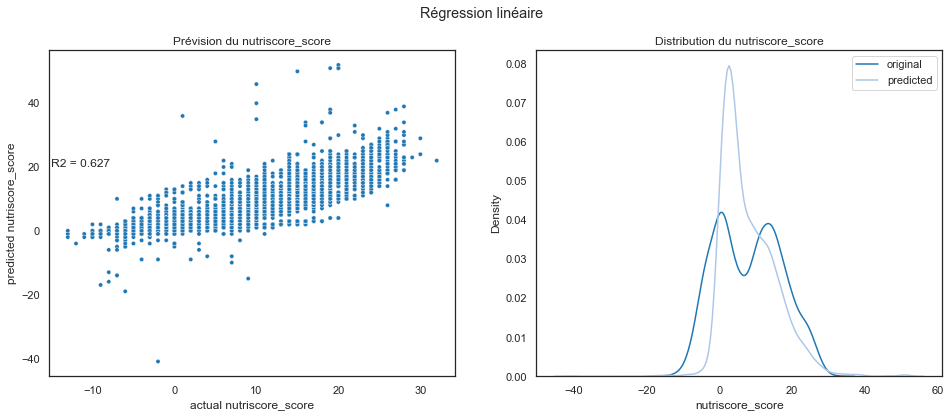

In [103]:
def plot_predict_vs_actual(y_test,y_pred, hue=None,titre=''):
    fig,axs = plt.subplots(nrows=1, ncols=2, figsize=(16, 6))
    ax=plt.subplot(1,2,1)
    sns.scatterplot(x=y_test,y=y_pred,size=1,hue=hue,legend=None, ax=ax)
    if not isinstance(y_test[0], str):
        r2=metrics.r2_score(y_test,y_pred)
        ax.annotate(f'R2 = {r2:.3f}',xy=(-15,20))
    # plt.text(f'R2 = {r2:.3f}',xy=(0,0.9))
    ax.set_xlabel('actual nutriscore_score')
    ax.set_ylabel('predicted nutriscore_score')
    ax.set_title('Prévision du nutriscore_score')
    if not hue is None:
        plt.legend()
    plt.suptitle(titre)
    ax=ax=plt.subplot(1,2,2)
    # Plot the original distribution
    sns.kdeplot(y_test, label='Original Distribution', ax=ax)
    sns.kdeplot(y_pred, label='Predicted Distribution',ax=ax)
    plt.legend(labels=['original', 'predicted'])
    ax.set_xlabel('nutriscore_score')
    # ax.set_ylabel('')
    ax.set_title('Distribution du nutriscore_score')
    # plt.show()

plot_predict_vs_actual(y_test,y_pred, titre='Régression linéaire')
to_png('7.3.3_imputation_nutriscore_par_regression_lineaire')

On voit que l'imputation par régression linéaire n'est pas adaptée pour le nutriscore, car
- la distribution n'est pas normal,
- la regression linéaire des valeurs manquantes change beaucoup la distribution
- il est très susceptible à des outliers 

### 7.3.4 Model 2 : KNeighbors estimation de Nutriscore, sans normalisation

- <https://www.ritchieng.com/machine-learning-k-nearest-neighbors-knn/>

KNN score=0.2685135855087906
Accuracy=0.2685135855087906
R2=0.6567965067527829
MAE=3.363612147043154
MSE=27.840436867341502


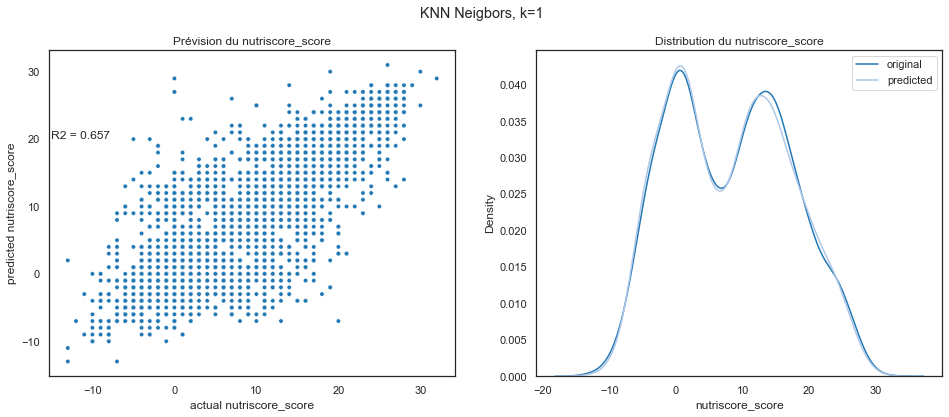

In [104]:

from sklearn.neighbors import KNeighborsClassifier

def plot_knn_estimates(k_val=1):
    knn = KNeighborsClassifier(n_neighbors=k_val)
    knn.fit(x_train, y_train)
    print(f'KNN score={knn.score(x_test,y_test)}')

    y_pred = knn.predict(x_test)

    print(f'Accuracy={metrics.accuracy_score(y_test,y_pred)}')
    print(f'R2={metrics.r2_score(y_test,y_pred)}')
    print(f'MAE={metrics.mean_absolute_error(y_test,y_pred)}')
    print(f'MSE={metrics.mean_squared_error(y_test,y_pred)}')
    plot_predict_vs_actual(y_test,y_pred,titre=f'KNN Neigbors, k={k_val}')

plot_knn_estimates(k_val=1)
to_png('7.3.4_imputation_nutriscore_par_KNN_1')

### 7.3.5 Model 3 : Essaie avec plusieurs valeurs de k voisins

In [105]:
def score_knn_model( x_train, x_test,y_train,y_test,k_max=15):
    k_range = range(1, k_max)
    scores = {}

    for k in k_range:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(x_train, y_train)
        y_pred = knn.predict(x_test)
        scores[k]=metrics.accuracy_score(y_test, y_pred)
    return scores
    
scores=score_knn_model(k_max=15,**data)
print(scores)

{1: 0.2685135855087906, 2: 0.23255194459243472, 3: 0.2221630261054875, 4: 0.21417155034629728, 5: 0.21683537559936067, 6: 0.2136387852956846, 7: 0.20911028236547682, 8: 0.20005327650506127, 9: 0.19792221630261056, 10: 0.19712306872669152, 11: 0.19525839104954715, 12: 0.19579115610015982, 13: 0.19605753862546618, 14: 0.19339371337240277}


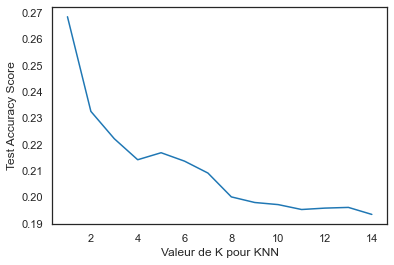

In [106]:
def plot_knn_elbow_curve(k_values,scores):
    """plot the relationship between K and testing accuracy"""
    ax=sns.lineplot(x=k_values, y=scores)
    ax.set_xlabel('Valeur de K pour KNN')
    ax.set_ylabel('Test Accuracy Score')
    # plt.show()

plot_knn_elbow_curve(k_values=scores.keys(),scores=scores.values())
to_png('7.3.5_imputation_nutriscore_par_KNN_elbow_curve')

- Ayant une valeur de K trop petit produit trop de bruit
- Si k est trop grand on perd le precision
- Meilleure valeur sera d'utiliser une valeur impar au coude du plot ci-dessus

Donc, on utilise la valeur k=3

KNN score=0.2221630261054875
Accuracy=0.2221630261054875
R2=0.5854453303319019
MAE=3.882525306339904
MSE=33.62839637719765


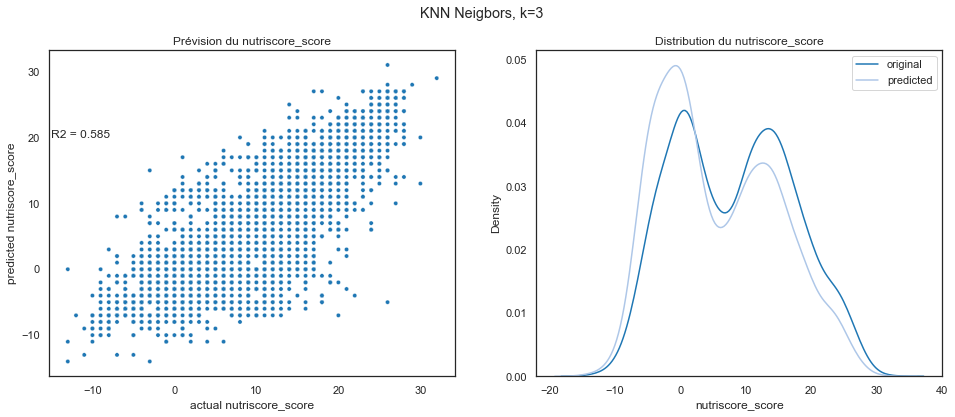

In [107]:
plot_knn_estimates(k_val=3)
to_png('7.3.5.1_imputation_nutriscore_par_KNN_3')

KNN score=0.21683537559936067
Accuracy=0.21683537559936067
R2=0.5475038956684788
MAE=4.057272242940863
MSE=36.70618007458711


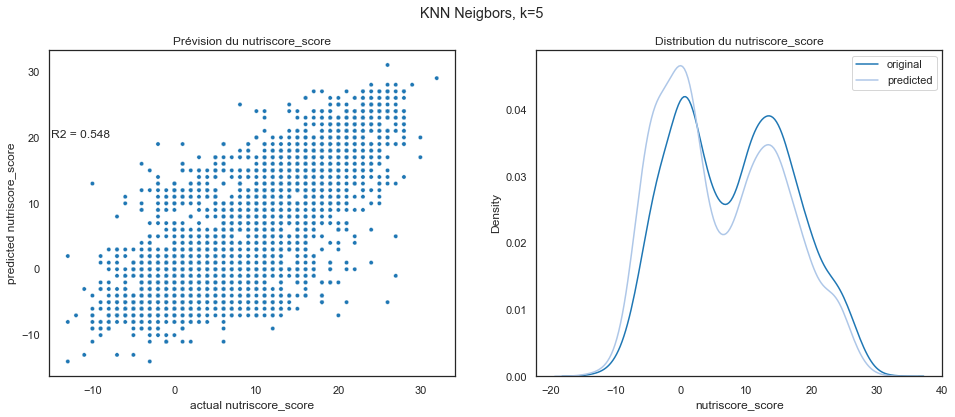

In [108]:
plot_knn_estimates(k_val=5)
to_png('7.3.5.2_imputation_nutriscore_par_KNN_5')

### 7.3.6 Model 4: Avec normalisation (Standard Scaler) des valeurs nutritionnels (via pipelines)

#### 7.3.6.1 Regression linéaire
Normalisation des valeurs ne change pas les résultats de régression linéaire - les coefficients de regression font la 'normalisation'

In [109]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

pipe = make_pipeline(StandardScaler(), LinearRegression())
pipe.fit(x_train, y_train)  # apply scaling on training data
score=pipe.score(x_test, y_test)  # apply scaling on testing data, without leaking training data.
y_pred=pipe.predict(x_test).round()

print(f'score = {score}')
if not isinstance(y_test,str):
    r2=metrics.r2_score(y_test,y_pred)
    accuracy=metrics.accuracy_score(np.round(y_test),np.round(y_pred))
    print(f'r2 = {r2}')
    print(f'accuracy = {accuracy}')





score = 0.6282669662553828
r2 = 0.6271697434211745
accuracy = 0.07378795950985616


#### 7.3.6.2 KNN avec standard scalar

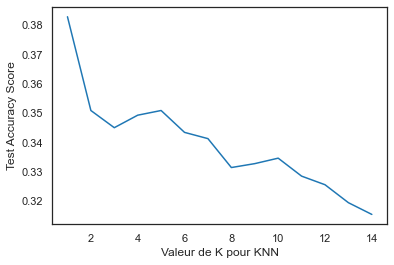

In [110]:
from sklearn.pipeline import Pipeline,make_pipeline

def score_knn_pipeline(x_train, x_test,y_train,y_test,k_max=15):
    k_range = range(1, k_max)
    scores = {}

    for k in k_range:
        # knn = KNeighborsClassifier(n_neighbors=k)
        model: Pipeline = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=k))
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        scores[k]=metrics.accuracy_score(y_test, y_pred)
    return scores
    
scores=score_knn_pipeline(**data,k_max=15)
plot_knn_elbow_curve(k_values=scores.keys(),scores=scores.values())
to_png('7.3.6.2_imputation_nutriscore_par_KNN_elbow_curve')

On voit la prevision (accuracy_score) est améliorée avec scaling

On utilise k=3 (le coude)


### 7.3.7 Améliorer le score en prenant compte de PNNS_group_1 et 2

In [111]:
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import KNNImputer

numeric_features = ['energy_100g','sugars_100g','saturated-fat_100g','sodium_100g','fat_100g','proteins_100g','fiber_100g']
numeric_transformer = Pipeline(
    steps=[
        ("imputer", KNNImputer()),
         ("scaler", StandardScaler())
         ]
)

categorical_features = ['pnns_groups_1','pnns_groups_2']
categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# define pipeline with an arbitrary number of transformer in a tuple array
model = Pipeline([
    ("pre", preprocessor),
    ("clf", KNeighborsClassifier(n_neighbors = 3))
])

# model.fit(x_train, y_train)
# y_pred = model.predict(x_test)
# print(f'KNN score = {model.score(x_test,y_test)}')
# print(f'accuracy score = {metrics.accuracy_score(y_test,y_pred)}')
# plot_predict_vs_actual(y_test,y_pred,hue=x_test['pnns_groups_1'])
# print('Misclassified samples: %d' % (y_test != y_pred).sum())
print(f'Misclassified samples: {(y_test != y_pred).mean():.4f}')
model

Misclassified samples: 0.9262


Pipeline(steps=[('pre',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   KNNImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['energy_100g', 'sugars_100g',
                                                   'saturated-fat_100g',
                                                   'sodium_100g', 'fat_100g',
                                                   'proteins_100g',
                                                   'fiber_100g']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['pnns_groups_1',
            

### 7.3.8 Imputation avec des Imputers

Le scoring était fait avec des Classifiers

L'imputation est faite avec les Imputers
KNN imputation
- <https://www.kaggle.com/alexisbcook/missing-values>

C:\Users\mc\anaconda3\envs\OC_2\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\mc\anaconda3\envs\OC_2\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\mc\anaconda3\envs\OC_2\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(
C:\Users\mc\anaconda3\envs\OC_2\lib\site-packages\sklearn\impute\_iterative.py:699: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


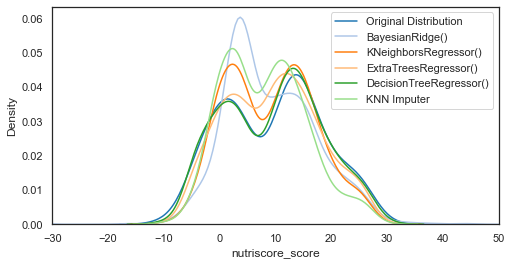

In [112]:
from sklearn.experimental import enable_iterative_imputer  # noqa
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.linear_model import BayesianRidge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor

numeric_features=['energy_100g','sugars_100g','saturated-fat_100g','sodium_100g','fat_100g','proteins_100g','fiber_100g','carbohydrates_100g']
labels='nutriscore_score'

def plot_imputer_distributions(df,labels='nutriscore_score',features=numeric_features,show_features=False):
    data=df[features + [labels]].dropna(how='all').sample(1000).copy(deep=True)
    nb_rows = len(features)+1 if show_features else 1
    _, axs = plt.subplots(nrows=nb_rows, ncols=1 , figsize=(8,4*nb_rows))
    axs = axs if show_features else [axs]
    # Plot the original distribution
    sns.kdeplot(data[labels], label="Original Distribution", ax=axs[0])
    if show_features:
        for i in range(0,len(features)):
            sns.kdeplot(data[features[i]], label="Original Distribution", ax=axs[i+1])
    strategies = [
       IterativeImputer(estimator=BayesianRidge()),
       IterativeImputer(estimator=KNeighborsRegressor()),
       IterativeImputer(estimator=ExtraTreesRegressor()),
       IterativeImputer(estimator=DecisionTreeRegressor()),
    ]
    for imputer in strategies:
        imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
        sns.kdeplot(imputed_data[labels], label=imputer.estimator, ax=axs[0])
        if show_features:
            for i in range(0,len(features)):
                sns.kdeplot(imputed_data[features[i]], label=imputer.estimator, ax=axs[i+1])

    imputer=KNNImputer(n_neighbors=3)
    imputed_data = pd.DataFrame(imputer.fit_transform(data), columns=data.columns)
    sns.kdeplot(imputed_data[labels], label='KNN Imputer', ax=axs[0])
    if show_features:
        for i in range(0,len(features)):
            sns.kdeplot(imputed_data[features[i]], label='KNN Imputer', ax=axs[i+1])
    
    axs[0].set_xlim([-30, 50])
    for ax in axs:
        ax.legend()
    if show_features:
        plt.gcf().subplots_adjust(hspace=0.5)
    
    # plt.show()

plot_imputer_distributions(net_data_df)
to_png('7.3.8_imputation_distributions_nutriscore')
  

Les meilleures distributions sont produites par KNNImputer et DecisionTreeRegressor, mais ça a du mal à converger
On utilise KNNImputer, car les distributions des colonnes nutritionnelles reste les plus similaires

## 7.4 Imputation des valeurs nutritionnelles

In [113]:
from sklearn.impute import KNNImputer
numeric_features=['energy_100g','sugars_100g','sodium_100g','saturated-fat_100g','fat_100g','proteins_100g','fiber_100g']
labels=['nutriscore_score']
features_nutritionnelles = numeric_features + labels

def impute_valeurs_nutritionnelles_manquantes(df:pd.DataFrame, features_to_impute=features_nutritionnelles, sample_size=5000):

    data_sample = df[features_to_impute].dropna(how='all').sample(sample_size)
    print(f'impute_valeurs_nutritionnelles_manquantes, data_sample.shape = {data_sample.shape}')
    print(f'impute_valeurs_nutritionnelles_manquantes {df[features_to_impute].isnull().sum()}')
    # Init the transformer
    # imputer =  make_pipeline(StandardScaler(), KNNImputer(n_neighbors=3, missing_values=np.nan))
    imputer = KNNImputer(n_neighbors=3, missing_values=np.nan)
    # Fit (entraine) sur l'échantillon de registres
    imputer.fit(data_sample)

    # Impute sur toutes les données, et convertir en dataframe pour garder les colonnes
    imputed_features = pd.DataFrame(
        imputer.transform(df[features_to_impute]),
         columns=features_to_impute)
    df=df.copy()
    # Mettre les valeurs imputés dans d
    #  filtre=df[features_to_impute].isnull().all()
    for col in features_to_impute:
        df[col] = imputed_features[col].values

    return df

#check
net_data_df.pipe(impute_valeurs_nutritionnelles_manquantes)[features_nutritionnelles].isnull().sum()

net_data_df[features_nutritionnelles].isnull().sum()  

impute_valeurs_nutritionnelles_manquantes, data_sample.shape = (5000, 8)
impute_valeurs_nutritionnelles_manquantes energy_100g           15327
sugars_100g           16413
sodium_100g           19537
saturated-fat_100g    17580
fat_100g              15677
proteins_100g         15603
fiber_100g            65551
nutriscore_score      55128
dtype: int64


energy_100g           15327
sugars_100g           16413
sodium_100g           19537
saturated-fat_100g    17580
fat_100g              15677
proteins_100g         15603
fiber_100g            65551
nutriscore_score      55128
dtype: int64

## 7.5 Pipeline pour imputer ou traiter les valeurs manquantes

- Imputer les valeurs nutritionnelles manquantes avec KNNImputer
- On n'impute pas la catégorie nutriscore grade, car il depend du nutriscore et PNNS groupe
- On n'impute pas les valeurs catégoriques manquantes, car l'analyse est pour explorer les relations avec ces categories
- On supprime les données pour lequel ont n'a pas des informations sur les ingrédients, car on n'a aucune information sur les additifs


In [114]:
def drop_produits_sans_info_additif(df):
    nb_sans_ingredients = df['ingredients_text'].isna().sum()
    nb_sans_info= df['additives_n'].isna().sum()
    print(f'drop_produits_sans_info_additif (nb = {nb_sans_info} = {nb_sans_ingredients})')
    return df.dropna(subset=['additives_n'])

net_data_df.pipe(drop_produits_sans_info_additif)
print(net_data_df.shape)
net_data_df['additives_n'].value_counts()


drop_produits_sans_info_additif (nb = 54549 = 54549)
(89192, 53)


0     14494
1      6045
2      3851
3      2744
4      2146
5      1497
6      1066
7       778
8       596
9       426
10      269
11      191
12      142
13       97
14       80
15       64
16       43
17       29
18       23
21       14
19       13
23        9
20        7
22        7
24        6
25        2
29        1
26        1
27        1
30        1
Name: additives_n, dtype: Int64

In [115]:
def pipeline_imputer_valeurs_manquantes(df):
    return (df
        .pipe(impute_valeurs_nutritionnelles_manquantes)
        .pipe(drop_produits_sans_info_additif)
    )

# 8. Élimination des colonnes inutiles<a name="colonnes-inutiles"></a>
- Colonnes identiques
- Colonnes qui répètent la même information en plusieurs langues

## 8.1 Colonnes identiques

### 8.1.1 Les colonnes datetime et epoch_time
Si les 2 colonnes sont identiques, garde la colonne `_datetime`, car la conversion est automatique
- `created_t` vs `created_datetime`
- `last_modified_t` vs `last_modified_datetime`

In [116]:
def test_dates(df,col1,col2):
    diff=df[col1]-df[col2]
    return max(diff)- min(diff)

print (test_dates(net_data_df,'created_t','created_datetime'))
print (test_dates(net_data_df,'last_modified_t','last_modified_datetime'))

0 days 00:00:00
0 days 00:00:00


In [117]:
def drop_epoch_time_cols(df):
    epoch_time_cols= df.columns[df.columns.str.endswith('_t')].to_list()
    print(f'drop_epoch_time_cols : {epoch_time_cols}')
    return df.drop(columns=epoch_time_cols)

net_data_df= net_data_df.pipe(drop_epoch_time_cols)

drop_epoch_time_cols : ['created_t', 'last_modified_t']


### 8.1.2 Colonnes `nutriscore_score` et `nutrition-score-fr_100g`

In [118]:
net_data_df[['nutriscore_score','nutrition-score-fr_100g']].dropna().sample(5)

,nutriscore_score,nutrition-score-fr_100g
33725,21.0,21.0
63827,18.0,18.0
23014,2.0,2.0
36834,13.0,13.0
17637,15.0,15.0


In [119]:
def test_scores(df,col1,col2):
    diff=df[col1]-df[col2]
    return max(diff)- min(diff)

print (test_scores(net_data_df,'nutriscore_score','nutrition-score-fr_100g'))

def drop_score_cols_dupliques(df):
    if 'nutriscore_score' in df.columns and 'nutrition-score-fr_100g' in df.columns:
        print(f'drop_score_cols_dupliques, drop column [nutrition-score-fr_100g]')
        return df.drop(columns=['nutrition-score-fr_100g'])
    else: return df

0.0


# 8.1.3 Drop colonnes_nutritionnelles en double
- sodium_100g est rempli par l'imputer
- pas besoin de colonne salt_100g car il est un multiple de sodium_100g

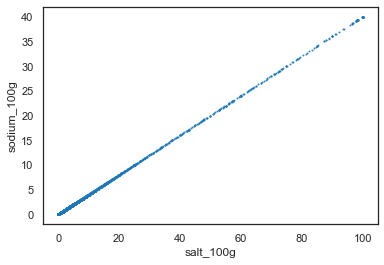

In [120]:
def test_salt_sodium(df):
    sns.regplot(data=df,x='salt_100g',y='sodium_100g',scatter_kws={'s':1}, fit_reg=False)
    # sns.scatterplot(data=df,x='salt_100g',y='sodium_100g',size=1)

net_data_df.pipe(test_salt_sodium);
to_png('8.1.3.1_test_salt_sodium_regplot')

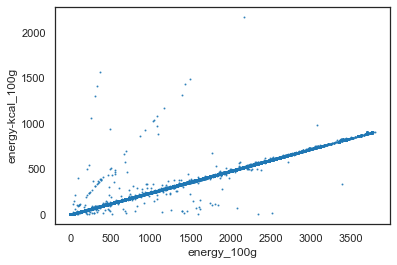

In [121]:
def test_energy_kcal(df):
    sns.regplot(data=df,x='energy_100g',y='energy-kcal_100g',scatter_kws={'s':1}, fit_reg=False)
    # sns.scatterplot(data=df,x='salt_100g',y='sodium_100g',size=1)

net_data_df.pipe(test_energy_kcal);
to_png('8.1.3.2_test_energy_kcal_regplot')

In [122]:
def drop_nutrition_cols_dupliques(df):
    cols=['salt_100g','energy-kcal_100g']
    for col in cols:
        if col in df.columns:
            print(f'drop_nutrition_cols_dupliques [{col}]')
            df=df.drop(col,axis=1)
    return df

net_data_df.pipe(drop_nutrition_cols_dupliques);

drop_nutrition_cols_dupliques [salt_100g]
drop_nutrition_cols_dupliques [energy-kcal_100g]


### 8.1.4 drop url colonne
- l'url est composé de `http://world-en.openfoodfacts.org/product/` + `[code]` + kebab_case(`[product_name]`)
- on peut le créer à partir des colonnes `code` et `product_name`

In [123]:
def drop_colonne_url(df):
    if 'url' in df.columns:
        print('drop_colonne_url')
        df = df.drop('url', axis=1)
    return df    

### 8.2 Elimination des colonnes en double, composées de listes de chaines, tags etc

- https://world.openfoodfacts.org/data/data-fields.txt
- inférence en regardant df_sample

In [124]:
def find_list_colonnes(df:pd.DataFrame)-> list:
    """Liste des colonnes du dataframe qui contient des listes """
    cols= df.select_dtypes('object').columns.tolist()
    ret=[]
    for col in cols:
        if col in ['product_name', 'abbreviated_product_name', 'generic_name']: continue 
        elif df[col].dropna().str.contains(',').any(): ret.append(col)
    return ret

tag_cols=find_list_colonnes(net_data_df)
print(tag_cols)


['quantity', 'brands', 'brands_tags', 'categories', 'categories_tags', 'categories_en', 'labels', 'labels_tags', 'labels_en', 'countries', 'countries_tags', 'countries_en', 'ingredients_text', 'serving_size', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_tags', 'states', 'states_tags', 'states_en']


In [125]:
def decrire_cat(df:pd.DataFrame):
    cat=df[['categories','categories_tags','categories_en']].dropna(how='all')
    print(cat.iloc[1,0])
    print(cat.iloc[1,1])
    print(cat.iloc[1,2])
    decrire_dataframe(cat, calc_max_len=False)

decrire_cat(net_data_df)

Biscuits and cakes, Cakes
en:biscuits-and-cakes,en:cakes
Biscuits and cakes,Cakes


In [126]:
states=net_data_df[['states', 'states_tags', 'states_en']].head(1).T
print(df_sample.loc[1,'states'])
print(df_sample.loc[1,'states_tags'])
print(df_sample.loc[1,'states_en'])


en:to-be-completed, en:nutrition-facts-completed, en:ingredients-to-be-completed, en:expiration-date-to-be-completed, en:packaging-code-completed, en:characteristics-to-be-completed, en:categories-to-be-completed, en:brands-to-be-completed, en:packaging-to-be-completed, en:quantity-to-be-completed, en:product-name-completed, en:photos-to-be-validated, en:photos-uploaded
en:to-be-completed,en:nutrition-facts-completed,en:ingredients-to-be-completed,en:expiration-date-to-be-completed,en:packaging-code-completed,en:characteristics-to-be-completed,en:categories-to-be-completed,en:brands-to-be-completed,en:packaging-to-be-completed,en:quantity-to-be-completed,en:product-name-completed,en:photos-to-be-validated,en:photos-uploaded
To be completed,Nutrition facts completed,Ingredients to be completed,Expiration date to be completed,Packaging code completed,Characteristics to be completed,Categories to be completed,Brands to be completed,Packaging to be completed,Quantity to be completed,Produc

On voit que la colonne de base est en plusieurs langues,
qui explique pourquoi il y a plus de categories que de tags
(qui sont en general avec prefix en:)

- la colonne `categories_en` fournie la traduction anglaise des catégories

Pour éliminer les données en duple ou triple :
- garder la colonne qui termine avec `_en` s'il reste dans la base
- sinon, garder la colonne qui termine avec `_tags`
- sinon, garder la colonne de base

On fera ça avec toutes les colonnes des tags : ['packaging', 'brands', 'categories','labels','countries','additives','states']

In [127]:
def drop_tag_cols_dupliques(df):
    cols=['packaging', 'brands', 'categories','labels','countries','states']
    df_cols= list(df.columns)
    cols_to_drop=[]
    for col in cols:
        dup_tag_cols=[]
        if f'{col}_en' in df_cols: dup_tag_cols.append(f'{col}_en')
        if f'{col}_tags' in df_cols: dup_tag_cols.append(f'{col}_tags')     
        if col in df_cols: dup_tag_cols.append(col)
        if len(dup_tag_cols)>1:
            print (f'keep [{dup_tag_cols[0]}], drop {dup_tag_cols[1:]}')
            cols_to_drop += dup_tag_cols[1:]
    return df.drop(columns=cols_to_drop)

drop_tag_cols_dupliques(net_data_df);


keep [brands_tags], drop ['brands']
keep [categories_en], drop ['categories_tags', 'categories']
keep [labels_en], drop ['labels_tags', 'labels']
keep [countries_en], drop ['countries_tags', 'countries']
keep [states_en], drop ['states_tags', 'states']


## 8.4 Pipeline pour éliminer les colonnes inutiles

In [128]:
def pipeline_eliminer_colonnes_inutiles(df):
    return (df
            .pipe(drop_epoch_time_cols)
            .pipe(drop_score_cols_dupliques)
            .pipe(drop_nutrition_cols_dupliques)
            .pipe(drop_colonne_url)
            .pipe(drop_tag_cols_dupliques)
            )


# 9. Enregistrement du dataframe nettoyé<a name="enregistrement"></a>

In [129]:
net_data_df = (raw_data_df
               .pipe(pipeline_corriger_types)
               .pipe(pipeline_eliminer_lignes_dupliquees)
               .pipe(pipeline_traiter_valeurs_manquantes)
               .pipe(pipeline_traiter_valeurs_aberrantes)
               .pipe(pipeline_imputer_valeurs_manquantes)
               .pipe(pipeline_eliminer_colonnes_inutiles)
               )


convertir to datetime [created_t]
convertir to datetime [last_modified_t]
convertir to datetime [created_datetime]
convertir to datetime [last_modified_datetime]
convertir_to_int : [additives_n]
convertir_to_int : [ingredients_from_palm_oil_n]
convertir_to_int : [ingredients_that_may_be_from_palm_oil_n]
convertir_to_int : [nova_group]
convertir_to_category, colonne [nutriscore_grade]
convertir_to_category, colonne [nova_group]
convertir_to_category, colonne [pnns_groups_1]
convertir_to_category, colonne [pnns_groups_2]
convertir_to_category, colonne [ecoscore_grade_fr]
remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_1]
remplace valeurs de categorie 'unknown' par NaN dans colonne [pnns_groups_2]
drop_lignes_dupliquées[['code']], nb. lignes supprimés = 4
drop_lignes_dupliquées[['product_name', 'brands']], nb. lignes supprimés = 6168
drop unnamed colonnes : drop ['Unnamed: 0']
drop colonnes vides: drop ['cities', 'allergens_en', 'no_nutriments', 'additives', 'ing

In [130]:

print(raw_data_df.shape)
print(net_data_df.shape)

print(list(net_data_df.columns))

(100000, 181)
(34643, 38)
['code', 'creator', 'created_datetime', 'last_modified_datetime', 'product_name', 'quantity', 'brands_tags', 'categories_en', 'labels_en', 'countries_en', 'ingredients_text', 'serving_size', 'serving_quantity', 'additives_n', 'additives_tags', 'additives_en', 'ingredients_from_palm_oil_n', 'ingredients_from_palm_oil_tags', 'ingredients_that_may_be_from_palm_oil_n', 'ingredients_that_may_be_from_palm_oil_tags', 'nutriscore_score', 'nutriscore_grade', 'nova_group', 'pnns_groups_1', 'pnns_groups_2', 'states_en', 'ecoscore_score_fr', 'ecoscore_grade_fr', 'main_category', 'main_category_en', 'energy_100g', 'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g', 'sodium_100g']


# 10. Enregistre les données et un dictionnaire de données

In [131]:
(net_data_df
.pipe(decrire_dataframe)
.to_csv(os_path_join(OUT_FOLDER,CLEAN_DATA_DICT), encoding='UTF-8', sep='\t')
)

In [132]:
net_data_df.to_csv(os_path_join(OUT_FOLDER,CLEAN_DATA_FILENAME), encoding='UTF-8', sep='\t')


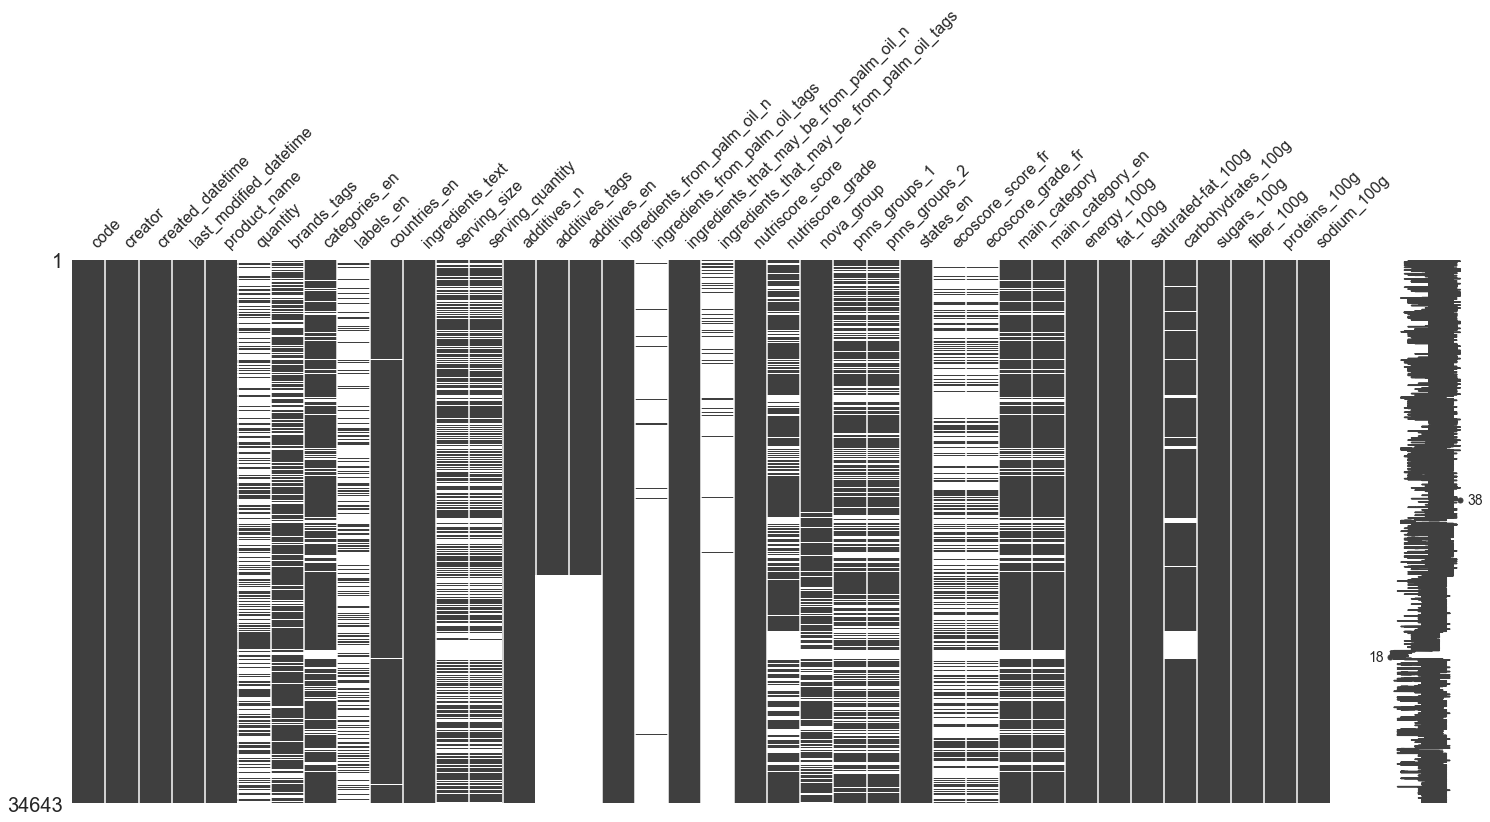

In [133]:
(net_data_df
 .pipe(sort_by_priority)
 .pipe(msno.matrix))
to_png('10_cleaned_data_taux_de_remplissage_matrix')

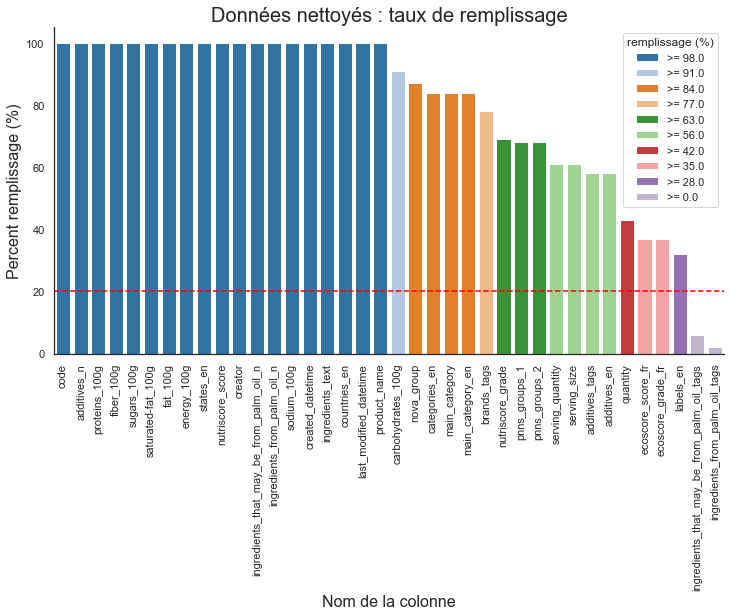

In [134]:
net_data_df.pipe(plot_colonne_remplissage,titre='Données nettoyés : taux de remplissage',
figsize=(12, 6))
to_png('10_cleaned_data_taux_de_remplissage_barplot')

# 10. Conversion des données supplémentaires des additives (du site Open Food Facts)
Nombre de produits qui contient des additives :
- https://world.openfoodfacts.org/additives
- https://world.openfoodfacts.org/additives.json

## 10.1 Télécharge le fichier json du site `openfoodfacts.org`

Les détails des propriétés des additives sont disponibles sur :
-  https://world.openfoodfacts.org/data/taxonomies/additives.json

In [135]:
def load_json(file):
    with open(file, encoding='UTF-8') as f:
        return json.load(f)

def save_json(obj,file):
    with open(file, 'w', encoding='UTF-8') as outfile:
        json.dump(obj, outfile)

def load_json_file_or_url(file,url):
    if os.path.exists(file):
        try:
            return load_json(file)
        except IOError:
            print(f'error loading json file : {file}')
    f=requests.get(url).json()
    save_json(f,file)
    return f

def get_file_or_url(file,url):
    if os.path.exists(file):
            return file
    else:
        response=requests.get(url)
        with open(file, "w",encoding='UTF-8') as f:
            f.write(response.text)
        return file

off_additives_detail_json_url='https://world.openfoodfacts.org/data/taxonomies/additives.json'
local_additives_detail_json=os_path_join(OUT_FOLDER,'additives_detail.json')

additives_detail_json = load_json_file_or_url(local_additives_detail_json,off_additives_detail_json_url)
print(list(additives_detail_json.values())[0])

{'vegan': {'en': 'yes'}, 'parents': ['en:e905c'], 'wikidata': {'en': 'Q579764'}, 'e_number': {'en': '905c'}, 'efsa_evaluation': {'en': 'Scientific Opinion on the re-evaluation of microcrystalline wax -E 905- as a food additive.'}, 'efsa_evaluation_date': {'en': '2013-04-04'}, 'efsa_evaluation_url': {'en': 'http://dx.doi.org/10.2903/j.efsa.2013.3146'}, 'vegetarian': {'en': 'yes'}, 'name': {'sv': 'E905ci - Mikrokristallint vax', 'sl': 'E905ci - Mikrokristalni vosek', 'sk': 'E905ci - Mikrokryštalický vosk', 'it': 'E905ci - Cera microcristallina', 'es': 'E905ci - Cera microcristalina', 'fi': 'E905ci - Mikrokiteinen vaha', 'cs': 'E905ci - Mikrokrystalický vosk', 'pl': 'E905ci - Wosk mikrokrystaliczny', 'hu': 'E905ci - Mikrokristályos viasz', 'bg': 'E905ci - Микрокристален восък', 'mt': "E905ci - Xama' mikrokristallina", 'et': 'E905ci - Mikrokristalne vaha', 'ro': 'E905ci - Ceară microcristalină', 'en': 'E905ci - Microcrystalline wax', 'nl': 'E905ci - Microkristallijne was', 'de': 'E905ci - 

## 10.2 Convertir additives json vers dataframe

In [136]:
pd.DataFrame.from_dict(additives_detail_json, orient='index').head(1)

,vegan,parents,wikidata,e_number,efsa_evaluation,efsa_evaluation_date,efsa_evaluation_url,vegetarian,name,additives_classes,from_palm_oil,efsa_evaluation_adi_established,children,efsa_evaluation_safety_assessed,efsa_evaluation_exposure_mean_greater_than_adi,efsa_evaluation_exposure_95th_greater_than_adi,organic_eu,efsa_evaluation_overexposure_risk,mandatory_additive_class,colour_index,description,efsa,carbon_footprint_fr_foodges_value,carbon_footprint_fr_foodges_ingredient,ciqual_food_name,ciqual_food_code,efsa_evaluation_adi,comment,default_additive_class,efsa_evaluation_exposure_mean_greater_than_noael,efsa_evaluation_exposure_95th_greater_than_noael
en:e905ci,{'en': 'yes'},[en:e905c],{'en': 'Q579764'},{'en': '905c'},{'en': 'Scientific Opinion on the re-evaluation of microcrystalline wax -E 905- as a food additi...,{'en': '2013-04-04'},{'en': 'http://dx.doi.org/10.2903/j.efsa.2013.3146'},{'en': 'yes'},"{'sv': 'E905ci - Mikrokristallint vax', 'sl': 'E905ci - Mikrokristalni vosek', 'sk': 'E905ci - M...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [137]:
def normalize_additive_json(data):
    """Extraire les champs en anglais du fichier additives.json"""
    data, index = list(data.values()), list(data.keys())
    df = pd.json_normalize(data)
    df.index = index
    df = df.rename_axis('id')
    filtre = df.columns.str.endswith('.en')  #seulement les colonnes en anglais
    df = df[df.columns[filtre]]
    # supprime '.en'
    df.columns = [str(col)[:-3] for col in df.columns]
    return df.reset_index()


additives_detail_df = normalize_additive_json(additives_detail_json)
print(additives_detail_df.shape)
additives_detail_df.head(1)


(655, 28)


,id,vegan,wikidata,e_number,efsa_evaluation,efsa_evaluation_date,efsa_evaluation_url,vegetarian,name,additives_classes,from_palm_oil,efsa_evaluation_adi_established,efsa_evaluation_safety_assessed,efsa_evaluation_exposure_mean_greater_than_adi,efsa_evaluation_exposure_95th_greater_than_adi,organic_eu,efsa_evaluation_overexposure_risk,mandatory_additive_class,colour_index,description,efsa,ciqual_food_name,ciqual_food_code,efsa_evaluation_adi,comment,default_additive_class,efsa_evaluation_exposure_mean_greater_than_noael,efsa_evaluation_exposure_95th_greater_than_noael
0,en:e905ci,yes,Q579764,905c,Scientific Opinion on the re-evaluation of microcrystalline wax -E 905- as a food additive.,2013-04-04,http://dx.doi.org/10.2903/j.efsa.2013.3146,yes,E905ci - Microcrystalline wax,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## 10.3 Enregistre le fichier 'additive_details.csv' pour l'analyse exploratoire

In [138]:
additives_detail_df.to_csv(os_path_join(OUT_FOLDER, ADDITIVES_DETAIL),encoding='UTF-8',sep='\t')
